In [2]:
# Cofiguration for the both networks
# Tip: Run on less epochs and then replace the models with the high epochs trainned model available in the directory

 #epochs for the network 1 - Image Noise Classification Model
network_1_epochs=1 #Ideal value is 30

#epochs for the network 2 - All for DAEs Models
network_2_epochs=1 #Ideal value is 40

# Network # 1:Image Noise Classfication

In [47]:
import os
import warnings
import random

from shutil import copyfile
warnings.filterwarnings('ignore')

In [48]:
# Get all the paths
data_dir_list = os.listdir('dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("dataset"))
file_count = len(files)
original_dataset_dir = 'dataset'
# print(file_count)

['gau_noise_imgs', 'po_noise_imgs', 'spk_noise_imgs', 'sp_noise_imgs']


gau =  Gaussian Noise | po = Poission Noise | spk = Speckle Noise | sp = Salt and Pepper Noise

Processing Dataset if dataset folder not exsist-this code is making direcotries and splitting the dataset into different folders 

In [49]:
#check if noise dataset is already processed - if exsist skip the dataset folder creation
isdir = os.path.isdir('imgsnoise-data')

if isdir:
    print('Dataset already processed - dataset directories already exsist and splitted into training and testing')
else:
    print('Creating Directories and splitting the training and validation - processing the dataset for model')
    # Creating new base directory
    base_dir = 'imgsnoise-data/'
    os.mkdir(base_dir)

    #creating two folders (train and validation)
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)

    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)

    #Under train folder create four folder
    # (gau_noise_imgs, po_noise_imgs, spk_noise_imgs, sp_noise_imgs)

    train_gau_dir = os.path.join(train_dir, 'gau_noise_imgs')
    os.mkdir(train_gau_dir)

    train_po_dir = os.path.join(train_dir, 'po_noise_imgs')
    os.mkdir(train_po_dir)

    train_sp_dir = os.path.join(train_dir, 'sp_noise_imgs')
    os.mkdir(train_sp_dir)

    train_spk_dir = os.path.join(train_dir, 'spk_noise_imgs')
    os.mkdir(train_spk_dir)


    #Under validation folder create four folders
    # (gau_noise_imgs, po_noise_imgs, spk_noise_imgs, sp_noise_imgs)

    validation_gau_dir = os.path.join(validation_dir, 'gau_noise_imgs')
    os.mkdir(validation_gau_dir)

    validation_po_dir = os.path.join(validation_dir, 'po_noise_imgs')
    os.mkdir(validation_po_dir)

    validation_sp_dir = os.path.join(validation_dir, 'sp_noise_imgs')
    os.mkdir(validation_sp_dir)

    validation_spk_dir = os.path.join(validation_dir, 'spk_noise_imgs')
    os.mkdir(validation_spk_dir)

    def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
        files = []
        for filename in os.listdir(SOURCE):
            file = SOURCE + filename
            if os.path.getsize(file) > 0:
                files.append(filename)
            else:
                print(filename + " is zero length, so ignoring.")

        training_length = int(len(files) * SPLIT_SIZE)
        valid_length = int(len(files) - training_length)
        shuffled_set = random.sample(files, len(files))
        training_set = shuffled_set[0:training_length]
        valid_set = shuffled_set[training_length:]

        for filename in training_set:
            this_file = SOURCE + filename
            destination = TRAINING + filename
            copyfile(this_file, destination)

        for filename in valid_set:
            this_file = SOURCE + filename
            destination = VALIDATION + filename
            copyfile(this_file, destination)

    GAU_SOURCE_DIR = 'dataset/gau_noise_imgs/'
    TRAINING_GAU_DIR = 'imgsnoise-data/train/gau_noise_imgs/'
    VALID_GAU_DIR = 'imgsnoise-data/validation/gau_noise_imgs/'

    PO_SOURCE_DIR = 'dataset/po_noise_imgs/'
    TRAINING_PO_DIR = 'imgsnoise-data/train/po_noise_imgs/'
    VALID_PO_DIR = 'imgsnoise-data/validation/po_noise_imgs/'

    SP_SOURCE_DIR = 'dataset/sp_noise_imgs/'
    TRAINING_SP_DIR = 'imgsnoise-data/train/sp_noise_imgs/'
    VALID_SP_DIR = 'imgsnoise-data/validation/sp_noise_imgs/'

    SPK_SOURCE_DIR = 'dataset/spk_noise_imgs/'
    TRAINING_SPK_DIR = 'imgsnoise-data/train/spk_noise_imgs/'
    VALID_SPK_DIR = 'imgsnoise-data/validation/spk_noise_imgs/'



    split_size = .80 # split the data into given ratio

    split_data(GAU_SOURCE_DIR, TRAINING_GAU_DIR, VALID_GAU_DIR, split_size)
    split_data(PO_SOURCE_DIR, TRAINING_PO_DIR, VALID_PO_DIR, split_size)
    split_data(SP_SOURCE_DIR, TRAINING_SP_DIR, VALID_SP_DIR, split_size)
    split_data(SPK_SOURCE_DIR, TRAINING_SPK_DIR, VALID_SPK_DIR, split_size)

Dataset already processed - dataset directories already exsist and splitted into training and testing


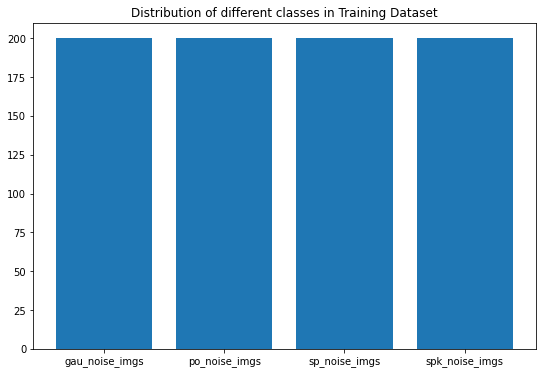

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('imgsnoise-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [51]:
for i in ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('imgsnoise-data/train/'+i+'/'))))

Training gau_noise_imgs images are: 200
Training po_noise_imgs images are: 200
Training sp_noise_imgs images are: 200
Training spk_noise_imgs images are: 200


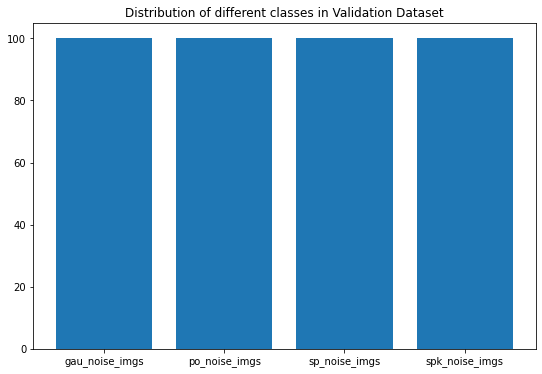

In [52]:
image_folder = ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('imgsnoise-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [53]:
for i in ['gau_noise_imgs', 'po_noise_imgs', 'sp_noise_imgs', 'spk_noise_imgs']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('imgsnoise-data/validation/'+i+'/'))))

Valid gau_noise_imgs images are: 100
Valid po_noise_imgs images are: 100
Valid sp_noise_imgs images are: 100
Valid spk_noise_imgs images are: 100


In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
img_width=32; img_height=32
batch_size=16

In [56]:
TRAINING_DIR = 'imgsnoise-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
#After deleting rotation_range and zoom_range we got good accuracy as an experiment. 

Found 800 images belonging to 4 classes.


In [57]:
VALIDATION_DIR = 'imgsnoise-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 400 images belonging to 4 classes.


In [58]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = 'Image_noie_classification_model-Newtwork1.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [59]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [60]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['acc'])

In [61]:
history = model.fit_generator(train_generator,
                              epochs=network_1_epochs,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

49/50 [============================>.] - ETA: 0s - loss: 1.5404 - acc: 0.2666- ETA: 5s - lo
Epoch 00001: val_acc improved from -inf to 0.31250, saving model to Image_noie_classification_model-Newtwork1.h5
50/50 [==============================] - 13s 259ms/step - loss: 1.5369 - acc: 0.2675 - val_loss: 1.3805 - val_acc: 0.3125


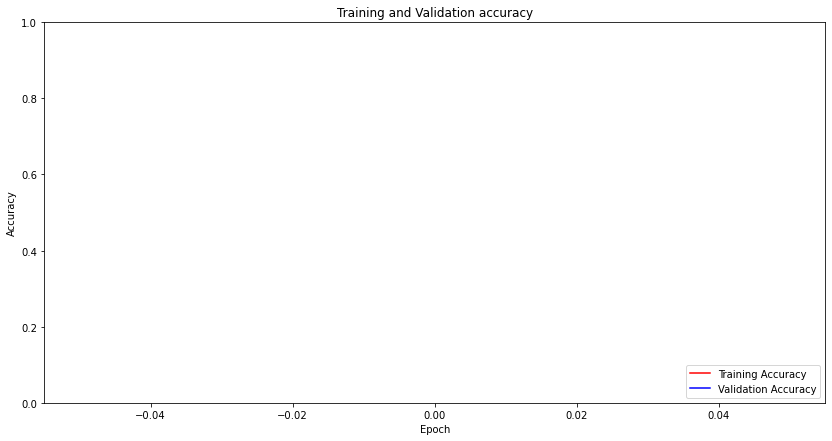

In [62]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and Validation loss')

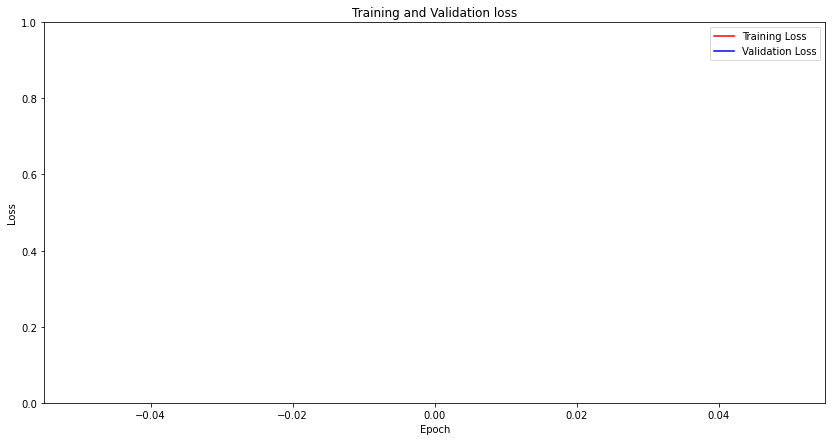

In [63]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.title('Training and Validation loss')

In [64]:
import visualkeras

model = 'Image_noie_classification_model-Newtwork1.h5'

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

ModuleNotFoundError: No module named 'visualkeras'

# Testing Network # 1  - Image Noise Classfication

In [65]:
# Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

Using TensorFlow backend.


In [66]:
#Croping all images available in data_test directory to 32x32 to test properly becaue our network is trainned on 32x32

from PIL import Image
import os
from os import listdir

# get the path/directory
folder_dir = "data_test/"
for images in os.listdir(folder_dir):

    # check if the image ends with png
    if (images.endswith(".png")):
        #print(images)
        # Opens a image in RGB mode
        im = Image.open(r"data_test/"+images)
        # Size of the image in pixels (size of original image)
        # (This is not mandatory)
        width, height = im.size
        #Setting the points for cropped image
        left = 0
        top = 0

        right = 32
        bottom = 32

        # Cropped image of above dimension
        # (It will not change original image)
        im1 = im.crop((left, top, right, bottom))

        # Shows the image in image viewer
        # im1.show()
        im1.save('data_test/'+images)

In [67]:
# Read Test Images from dir and their label correct lables from csv.
test_images_dir = 'data_test/'
test_df = pd.read_csv('test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('Image_noie_classification_model-Testing.npy', test_preprocessed_images)

KeyboardInterrupt: 

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

In [ ]:
test_df = pd.read_csv('test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

In [ ]:
train_dir = 'imgsnoise-data/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(10,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

#Function for True noise printing
def true_noise(img_path):
     #Prinitng True Noise
    if "gau_noise" in img_path:
        print("True Noise: Gaussian")
    elif "po_noise" in img_path:
        print("True Noise: Poisson")
    elif "sp_noise" in img_path:
        print("True Noise: Salt & Pepper")
    elif "spk_noise" in img_path:
        print("True Noise: Speckle")
    else:
        print("Image is not properly named with true label! - image name must contain 'gau_noise' 'po_noise' 'sp_noise' 'spk_noise'")


# load an image and predict the class
def predict_image_noise(img_path):
    
    # load the image
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    img = load_image(img_path)
    
    # load model
    model = tf.keras.models.load_model('Image_noie_classification_model-Newtwork1.h5')
    # predict the class
    predict_x=model.predict(img)
    
   #Prinitng True Noise from function "true_noise"
    true_noise(img_path)
    
    result=np.argmax(predict_x,axis=1)
    if result[0]==0:
        print("Predicted Noise: Gaussian")
        plt.title("Gaussian Noise")
    elif result[0]==1:
        print("Predicted Noise: Poission")
        plt.title("Poission Noise")
    elif result[0]==2:
        print("Predicted Noise: Salt & Pepper")
        plt.title("Salt & Pepper Noise")
    elif result[0]==3:
        print("Predicted Noise: Speckle")
        plt.title("Speckle Noise")
    plt.show()
    

In [ ]:
# Importing Image class from PIL module for image cropping purpose 
from PIL import Image

# A function which will crop an image from 4 corners and in middle of the image to exract 5 small images to predict
def img_random_crop(img_name):
    #set extension of image here in last
    im = Image.open(r"manual_test_images/"+img_name+".png")

    # Size of the image in pixels (size of original image)
    width, height = im.size

    #Crop size
    c_width=32
    c_height=32

    #Cropped top-left
    left = 0
    top = 0
    right = c_width
    bottom = c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_top_left.png')

    #Cropped top-right
    left = width-c_width
    top = 0
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_top_right.png')

    #Cropped bottom-left
    left = 0
    top = height-c_height
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_bottom_left.png')

    #Cropped bottom-right
    left = width-c_width
    top = height-c_height
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_bottom_right.png')

    # Cropped center
    left = width/2
    top = height/2
    right = left+c_width
    bottom = top+c_height
    im1 = im.crop((left, top, right, bottom))
    im1.save('manual_test_images/'+img_name+'cropped_center.png')

In [ ]:
#entry point, run the example to check how model is working on large resolution images vs cropped images of same image.
img_name="gau_noise8" # insert image name here 
img_random_crop(img_name) # this function will crop 5 small images from the large size resolution image
predict_image_noise("manual_test_images/"+img_name+".png")
predict_image_noise('manual_test_images/'+img_name+'cropped_top_left.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_top_right.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_bottom_left.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_bottom_right.png')
predict_image_noise('manual_test_images/'+img_name+'cropped_center.png')

In [32]:
import os
#load an image and extract 5 parts from it to predict the class for each part to predict the correct noise in large size images.
def predict_image_noise_cropping_method(img_path):
    
    #Crop parts from images
    img_random_crop(img_name)
    
    
    # load model
    model = tf.keras.models.load_model('Image_noie_classification_model-Newtwork1.h5')
    
    # Array for cropped images prediction
    img_parts_prediction=[9,9,9,9,9] #initilized with 9 because we have no 9th class
    
    # load the main image
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    img = load_image(img_path)
    # predict the class
    predict_x=model.predict(img)
    #Prinitng True Noise from function "true_noise" for the image
    true_noise(img_path)
    result=np.argmax(predict_x,axis=1)
    
    #c1=cropped_one #c2=cropped_two and so on for all 5 cropped images.
    # load the cropped image part c1 
    img_pathc1="manual_test_images/"+img_name+"cropped_top_left"+".png"
    imgc1=mpimg.imread(img_pathc1)
    #imgplotc1 = plt.imshow(imgc1)
    imgc1 = load_image(img_pathc1)
    # predict the class
    predict_x=model.predict(imgc1)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[0]=result[0]
    
    # load the cropped image part c2 
    img_pathc2="manual_test_images/"+img_name+"cropped_top_right"+".png"
    imgc2=mpimg.imread(img_pathc2)
    #imgplotc2 = plt.imshow(imgc2)
    imgc2 = load_image(img_pathc2)
    # predict the class
    predict_x=model.predict(imgc2)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[1]=result[0]
    
    # load the cropped image part c3 
    img_pathc3="manual_test_images/"+img_name+"cropped_bottom_left"+".png"
    imgc3=mpimg.imread(img_pathc2)
    #imgplotc3 = plt.imshow(imgc3)
    imgc3 = load_image(img_pathc3)
    # predict the class
    predict_x=model.predict(imgc3)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[2]=result[0]
    
    # load the cropped image part c4 
    img_pathc4="manual_test_images/"+img_name+"cropped_bottom_right"+".png"
    imgc4=mpimg.imread(img_pathc4)
    #imgplotc4 = plt.imshow(imgc4)
    imgc4 = load_image(img_pathc4)
    # predict the class
    predict_x=model.predict(imgc4)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[3]=result[0]
    
    # load the cropped image part c5 
    img_pathc5="manual_test_images/"+img_name+"cropped_center"+".png"
    imgc5=mpimg.imread(img_pathc5)
    #imgplotc5 = plt.imshow(imgc5)
    imgc5 = load_image(img_pathc5)
    # predict the class
    predict_x=model.predict(imgc5)
    result=np.argmax(predict_x,axis=1)
    img_parts_prediction[4]=result[0]
    
    # Program to find most frequent
    # element in a list
    
    def most_frequent(img_parts_prediction):
        counter = 0
        num = img_parts_prediction[0]
        for i in img_parts_prediction:
            curr_frequency = img_parts_prediction.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
        return num
    #print(most_frequent(img_parts_prediction))
    
    final_prediction=most_frequent(img_parts_prediction)
    
    if final_prediction==0:
        print("Predicted Noise: Gaussian")
        plt.title("Gaussian Noise")
    elif final_prediction==1:
        print("Predicted Noise: Poission")
        plt.title("Poission Noise")
    elif final_prediction==2:
        print("Predicted Noise: Salt & Pepper")
        plt.title("Salt & Pepper Noise")
    elif final_prediction==3:
        print("Predicted Noise: Speckle")
        plt.title("Speckle Noise")
    plt.show()
    
    # Printing array for the cropped images
    print("Predictation of the cropped images for large resolution images")
    print(img_parts_prediction)
    
    #Delete the cropped images - these were the temporary files. - After few seconds of prediction
    import time
    time.sleep(5)
    os.remove("manual_test_images/"+img_name+"cropped_top_left"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_top_right"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_bottom_left"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_bottom_right"+".png")
    os.remove("manual_test_images/"+img_name+"cropped_center"+".png")
    print("Cropped images deleted!!")

# Run Network # 1 here for large resolution images - Image Noise Classification

True Noise: Gaussian
Predicted Noise: Speckle


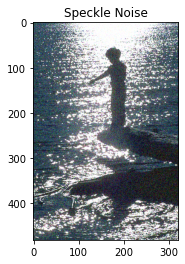

Predictation of the cropped images for large resolution images
[3, 3, 3, 3, 3]
Cropped images deleted!!


In [33]:
img_name="gau_noise26031" # Add image name here and run the code
predict_image_noise_cropping_method("manual_test_images/"+img_name+".png")

# ---------------------------------------------------------------------------------------------------------------

# Network # 2:Denoising the images through DAEs

In [1]:
#Link for reference: https://codahead.com/blog/a-denoising-autoencoder-for-cifar-datasets
# Gaussian Noise removal Autoencoder based model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, Reshape, Conv2DTranspose,\
   Activation, BatchNormalization, ReLU, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar100, cifar10
import tensorflow as tf

c:\users\waqar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\waqar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\waqar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\waqar\appd

In [3]:
#Global Variable for epochs in DAEs 
#set epochs here it will affect on all DAEs networks
dae_epochs_global_variable=network_2_epochs # this variable is from configuration section the top most code.

# GER-DAE = Generalized Denoising Autoencoder

In [138]:
# Loading the dataset
(train_data_clean_gaussian, _), (test_data_clean_gaussian, _) = cifar100.load_data(label_mode='fine')
train_data_clean_gaussian = train_data_clean_gaussian.astype('float32') / 255.
test_data_clean_gaussian = test_data_clean_gaussian.astype('float32') / 255.


#Adding Gaussian Noise to images
def add_gaussian_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian = add_gaussian_noise_and_clip_data(train_data_clean_gaussian)
test_data_noisy_gaussian = add_gaussian_noise_and_clip_data(test_data_clean_gaussian)

In [139]:
# Loading the dataset
(train_data_clean_poisson, _), (test_data_clean_poisson, _) = cifar100.load_data(label_mode='fine')
train_data_clean_poisson = train_data_clean_poisson.astype('float32') / 255.
test_data_clean_poisson = test_data_clean_poisson.astype('float32') / 255.

#Adding poission noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson = random_noise(train_data_clean_poisson, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson = random_noise(test_data_clean_poisson, mode="poisson", seed=42, clip=False)

In [140]:
# Loading the dataset
(train_data_clean_salt_pepper, _), (test_data_clean_salt_pepper, _) = cifar100.load_data(label_mode='fine')
train_data_clean_salt_pepper = train_data_clean_salt_pepper.astype('float32') / 255.
test_data_clean_salt_pepper = test_data_clean_salt_pepper.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper = random_noise(train_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper = random_noise(test_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)


In [141]:
# Loading the dataset
(train_data_clean_speckle, _), (test_data_clean_speckle, _) = cifar100.load_data(label_mode='fine')
train_data_clean_speckle = train_data_clean_speckle.astype('float32') / 255.
test_data_clean_speckle = test_data_clean_speckle.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Speckle Noise added to image dataset
train_data_noisy_speckle = random_noise(train_data_clean_speckle, mode="speckle", seed=42, clip=False)
test_data_noisy_speckle = random_noise(test_data_clean_speckle, mode="speckle", seed=42, clip=False)

In [142]:
#Putting all images nupay array to single array for general DAEs.
train_data_noisy=np.concatenate((train_data_noisy_gaussian, train_data_noisy_poisson, train_data_noisy_salt_pepper, train_data_noisy_speckle))
test_data_noisy=np.concatenate((test_data_noisy_gaussian, test_data_noisy_poisson, test_data_noisy_salt_pepper, test_data_noisy_speckle))

In [143]:
#Putting all images nupay array to single array for general DAEs.
train_data_clean=np.concatenate((train_data_clean_gaussian, train_data_clean_poisson, train_data_clean_salt_pepper, train_data_clean_speckle))
test_data_clean=np.concatenate((test_data_clean_gaussian, test_data_clean_poisson, test_data_clean_salt_pepper, test_data_clean_speckle))

In [144]:
#Testing total elements in image numpy array here
train_data_clean.shape

(200000, 32, 32, 3)

In [145]:
def conv_block(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [146]:
def denoising_autoencoder_gerneralized():
   dae_inputs = Input(shape=(32, 32, 3), name='dae_input')
   conv_block1 = conv_block(dae_inputs, 32, 3)
   conv_block2 = conv_block(conv_block1, 64, 3)
   conv_block3 = conv_block(conv_block2, 128, 3)
   conv_block4 = conv_block(conv_block3, 256, 3)
   conv_block5 = conv_block(conv_block4, 256, 3, 1)

   deconv_block1 = deconv_block(conv_block5, 256, 3)
   merge1 = Concatenate()([deconv_block1, conv_block3])
   deconv_block2 = deconv_block(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block2, conv_block2])
   deconv_block3 = deconv_block(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block3, conv_block1])
   deconv_block4 = deconv_block(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block4)

   dae_outputs = Activation('sigmoid', name='dae_output')(final_deconv)
  
   return Model(dae_inputs, dae_outputs, name='dae')

In [147]:
dae_generalized = denoising_autoencoder_gerneralized()
dae_generalized.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_generalized_all_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_generalized.fit(train_data_noisy,
       train_data_clean,
       validation_data=(test_data_noisy, test_data_clean),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Train on 200000 samples, validate on 40000 samples
199936/200000 [============================>.] - ETA: 0s - loss: 0.0034
Epoch 00001: val_loss improved from inf to 0.00217, saving model to denoising_generalized_all_noise_model.h5
200000/200000 [==============================] - 841s 4ms/sample - loss: 0.0034 - val_loss: 0.0022


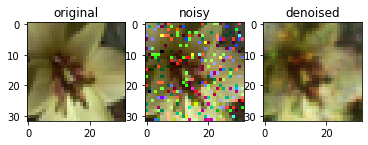

In [148]:
# There were total 10000 images for single noise for test. As we concatinated the all the noises so it beacme 40000
# 0 to 10000 for gaussian images
# 10000 to 20000 for poisson images
# 20000 to 30000 for salt and pepper images
# 30000 to 40000 for speckle images
# put value from these ranges to idx for testing
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')
test_data_denoised = dae_generalized.predict(test_data_noisy)
idx = 20005
plt.subplot(1,3,1)
plt.imshow(test_data_clean[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised[idx])
plt.title('denoised')
plt.show()

# GAU-DAE = Gaussian Denoising Autoencoder 

In [9]:
# Loading the dataset
(train_data_clean_gaussian, _), (test_data_clean_gaussian, _) = cifar100.load_data(label_mode='fine')
train_data_clean_gaussian = train_data_clean_gaussian.astype('float32') / 255.
test_data_clean_gaussian = test_data_clean_gaussian.astype('float32') / 255.


#Adding Gaussian Noise to images
def add_gaussian_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian = add_gaussian_noise_and_clip_data(train_data_clean_gaussian)
test_data_noisy_gaussian = add_gaussian_noise_and_clip_data(test_data_clean_gaussian)

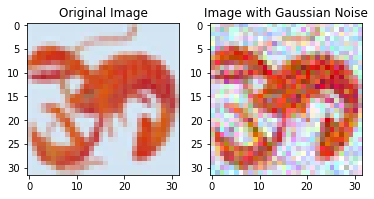

In [10]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_gaussian[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_gaussian[idx])
plt.title('Image with Gaussian Noise')
plt.show()

In [11]:
def conv_block_gaussian(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_gaussian(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [12]:
def denoising_autoencoder_gaussian():
   dae_inputs = Input(shape=(32, 32, 3), name='dae_input')
   conv_block_gaussian1 = conv_block_gaussian(dae_inputs, 32, 3)
   conv_block_gaussian2 = conv_block_gaussian(conv_block_gaussian1, 64, 3)
   conv_block_gaussian3 = conv_block_gaussian(conv_block_gaussian2, 128, 3)
   conv_block_gaussian4 = conv_block_gaussian(conv_block_gaussian3, 256, 3)
   conv_block_gaussian5 = conv_block_gaussian(conv_block_gaussian4, 256, 3, 1)

   deconv_block_gaussian1 = deconv_block_gaussian(conv_block_gaussian5, 256, 3)
   merge1 = Concatenate()([deconv_block_gaussian1, conv_block_gaussian3])
   deconv_block_gaussian2 = deconv_block_gaussian(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_gaussian2, conv_block_gaussian2])
   deconv_block_gaussian3 = deconv_block_gaussian(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_gaussian3, conv_block_gaussian1])
   deconv_block_gaussian4 = deconv_block_gaussian(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_gaussian4)

   dae_outputs = Activation('sigmoid', name='dae_output')(final_deconv)
  
   return Model(dae_inputs, dae_outputs, name='dae')

In [13]:
dae_gaussian = denoising_autoencoder_gaussian()
dae_gaussian.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_gaussian_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_gaussian.fit(train_data_noisy_gaussian,
       train_data_clean_gaussian,
       validation_data=(test_data_noisy_gaussian, test_data_clean_gaussian),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
49920/50000 [============================>.] - ETA: 0s - loss: 0.0052
Epoch 00001: val_loss improved from inf to 0.00467, saving model to denoising_gaussian_noise_model.h5
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.0052 - val_loss: 0.0047


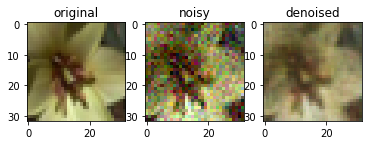

In [14]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian = dae_gaussian.predict(test_data_noisy_gaussian)
idx = 5
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian[idx])
plt.title('denoised')
plt.show()

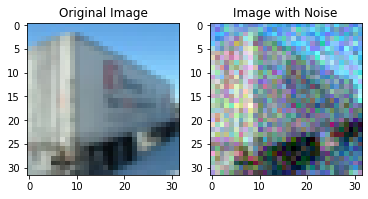

In [15]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_gaussian_cifar10, _), (test_data_clean_gaussian_cifar10, _) = cifar10.load_data()
train_data_clean_gaussian_cifar10 = train_data_clean_gaussian_cifar10.astype('float32') / 255.
test_data_clean_gaussian_cifar10 = test_data_clean_gaussian_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
def add_gaussian_cifar10_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_gaussian_cifar10 = add_gaussian_cifar10_noise_and_clip_data(train_data_clean_gaussian_cifar10)
test_data_noisy_gaussian_cifar10 = add_gaussian_cifar10_noise_and_clip_data(test_data_clean_gaussian_cifar10)
idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_gaussian_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_gaussian_cifar10[idx])
plt.title('Image with Noise')
plt.show()

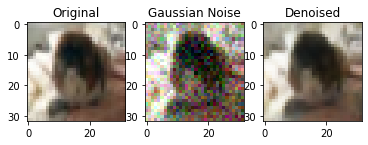

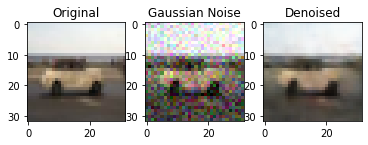

In [23]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)

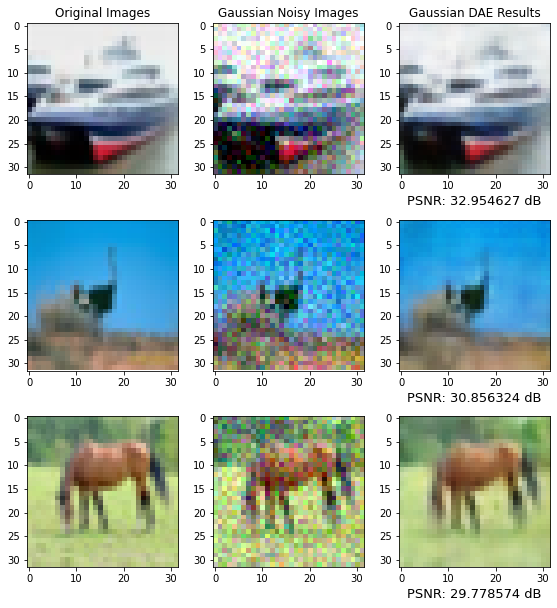

In [83]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 1
plt.subplot(3,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('Gaussian DAE Results')
plt.xlabel('PSNR: 32.954627 dB',fontsize=13)
idx = 655
plt.subplot(3,3,4)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.xlabel('PSNR: 30.856324 dB',fontsize=13)
idx = 60
plt.subplot(3,3,7)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 29.778574 dB',fontsize=13)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.savefig('figures/Gaussian DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

In [7]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('denoised')
plt.show()

NameError: name 'dae_gaussian' is not defined

# PO-DAE = Poisson Denoising Autoencoder 

In [120]:
# Loading the dataset
(train_data_clean_poisson, _), (test_data_clean_poisson, _) = cifar100.load_data(label_mode='fine')
train_data_clean_poisson = train_data_clean_poisson.astype('float32') / 255.
test_data_clean_poisson = test_data_clean_poisson.astype('float32') / 255.

#Adding poission noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson = random_noise(train_data_clean_poisson, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson = random_noise(test_data_clean_poisson, mode="poisson", seed=42, clip=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


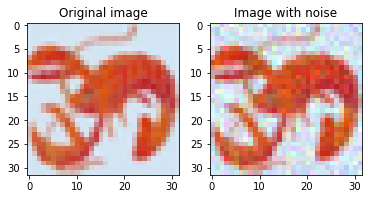

In [121]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_poisson[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_poisson[idx])
plt.title('Image with noise')
plt.show()

In [122]:
def conv_block_poisson(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_poisson(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [123]:
def denoising_autoencoder_poisson():
   dae_poisson_inputs = Input(shape=(32, 32, 3), name='dae_poisson_input')
   conv_block_poisson1 = conv_block_poisson(dae_poisson_inputs, 32, 3)
   conv_block_poisson2 = conv_block_poisson(conv_block_poisson1, 64, 3)
   conv_block_poisson3 = conv_block_poisson(conv_block_poisson2, 128, 3)
   conv_block_poisson4 = conv_block_poisson(conv_block_poisson3, 256, 3)
   conv_block_poisson5 = conv_block_poisson(conv_block_poisson4, 256, 3, 1)

   deconv_block_poisson1 = deconv_block_poisson(conv_block_poisson5, 256, 3)
   merge1 = Concatenate()([deconv_block_poisson1, conv_block_poisson3])
   deconv_block_poisson2 = deconv_block_poisson(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_poisson2, conv_block_poisson2])
   deconv_block_poisson3 = deconv_block_poisson(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_poisson3, conv_block_poisson1])
   deconv_block_poisson4 = deconv_block_poisson(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_poisson4)

   dae_poisson_outputs = Activation('sigmoid', name='dae_poisson_output')(final_deconv)
  
   return Model(dae_poisson_inputs, dae_poisson_outputs, name='dae_poisson')

In [124]:
dae_poisson = denoising_autoencoder_poisson()
dae_poisson.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_poisson_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_poisson.fit(train_data_noisy_poisson,
       train_data_clean_poisson,
       validation_data=(test_data_noisy_poisson, test_data_clean_poisson),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
49920/50000 [============================>.] - ETA: 0s - loss: 0.0034
Epoch 00001: val_loss improved from inf to 0.00675, saving model to denoising_poisson_noise_model.h5
50000/50000 [==============================] - 188s 4ms/sample - loss: 0.0034 - val_loss: 0.0067


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


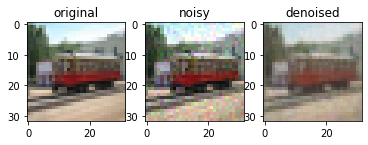

In [125]:
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson = dae_poisson.predict(test_data_noisy_poisson)
idx = 12
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


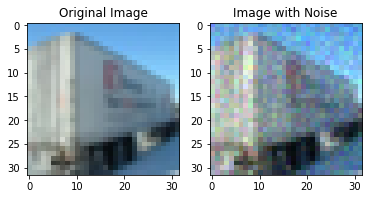

In [126]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_poisson_cifar10, _), (test_data_clean_poisson_cifar10, _) = cifar10.load_data()
train_data_clean_poisson_cifar10 = train_data_clean_poisson_cifar10.astype('float32') / 255.
test_data_clean_poisson_cifar10 = test_data_clean_poisson_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding poisson noise in data
noise_factor = 0.10

from skimage.util import random_noise

#Poisson Noise added to image dataset
train_data_noisy_poisson_cifar10 = random_noise(train_data_clean_poisson_cifar10, mode="poisson", seed=42, clip=False)
test_data_noisy_poisson_cifar10 = random_noise(test_data_clean_poisson_cifar10, mode="poisson", seed=42, clip=False)


idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_poisson_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_poisson_cifar10[idx])
plt.title('Image with Noise')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


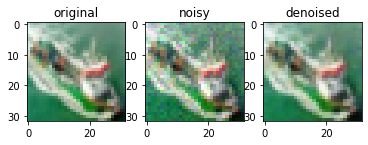

In [129]:
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


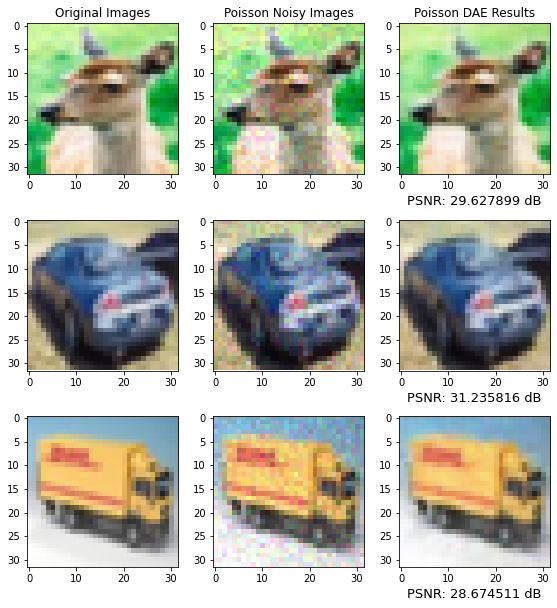

In [137]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 455
plt.subplot(3,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('Poisson DAE Results')
plt.xlabel('PSNR: 29.627899 dB',fontsize=13)
idx = 7555
plt.subplot(3,3,4)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.xlabel('PSNR: 31.235816 dB',fontsize=13)
idx = 9566
plt.subplot(3,3,7)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 28.674511 dB',fontsize=13)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.savefig('figures/Poisson DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# S&P-DAE = Salt & Pepper Denoising Autoencoder 

In [84]:
# Loading the dataset
(train_data_clean_salt_pepper, _), (test_data_clean_salt_pepper, _) = cifar100.load_data(label_mode='fine')
train_data_clean_salt_pepper = train_data_clean_salt_pepper.astype('float32') / 255.
test_data_clean_salt_pepper = test_data_clean_salt_pepper.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper = random_noise(train_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper = random_noise(test_data_clean_salt_pepper, mode="s&p",clip=True, amount=noise_factor)


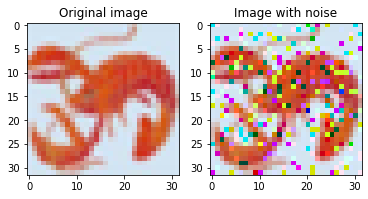

In [85]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_salt_pepper[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_salt_pepper[idx])
plt.title('Image with noise')
plt.show()

In [86]:
def conv_block_salt_pepper(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_salt_pepper(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [87]:
def denoising_autoencoder_salt_pepper():
   dae_salt_pepper_inputs = Input(shape=(32, 32, 3), name='dae_salt_pepper_input')
   conv_block_salt_pepper1 = conv_block_salt_pepper(dae_salt_pepper_inputs, 32, 3)
   conv_block_salt_pepper2 = conv_block_salt_pepper(conv_block_salt_pepper1, 64, 3)
   conv_block_salt_pepper3 = conv_block_salt_pepper(conv_block_salt_pepper2, 128, 3)
   conv_block_salt_pepper4 = conv_block_salt_pepper(conv_block_salt_pepper3, 256, 3)
   conv_block_salt_pepper5 = conv_block_salt_pepper(conv_block_salt_pepper4, 256, 3, 1)

   deconv_block_salt_pepper1 = deconv_block_salt_pepper(conv_block_salt_pepper5, 256, 3)
   merge1 = Concatenate()([deconv_block_salt_pepper1, conv_block_salt_pepper3])
   deconv_block_salt_pepper2 = deconv_block_salt_pepper(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_salt_pepper2, conv_block_salt_pepper2])
   deconv_block_salt_pepper3 = deconv_block_salt_pepper(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_salt_pepper3, conv_block_salt_pepper1])
   deconv_block_salt_pepper4 = deconv_block_salt_pepper(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_salt_pepper4)

   dae_salt_pepper_outputs = Activation('sigmoid', name='dae_salt_pepper_output')(final_deconv)
  
   return Model(dae_salt_pepper_inputs, dae_salt_pepper_outputs, name='dae_salt_pepper')

In [88]:
dae_salt_pepper = denoising_autoencoder_salt_pepper()
dae_salt_pepper.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_salt_pepper_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_salt_pepper.fit(train_data_noisy_salt_pepper,
       train_data_clean_salt_pepper,
       validation_data=(test_data_noisy_salt_pepper, test_data_clean_salt_pepper),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
49920/50000 [============================>.] - ETA: 0s - loss: 0.0067
Epoch 00001: val_loss improved from inf to 0.00620, saving model to denoising_salt_pepper_noise_model.h5
50000/50000 [==============================] - 235s 5ms/sample - loss: 0.0067 - val_loss: 0.0062


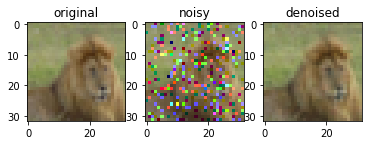

In [94]:
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper = dae_salt_pepper.predict(test_data_noisy_salt_pepper)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper[idx])
plt.title('denoised')
plt.show()

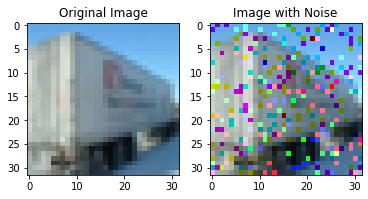

In [95]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_salt_pepper_cifar10, _), (test_data_clean_salt_pepper_cifar10, _) = cifar10.load_data()
train_data_clean_salt_pepper_cifar10 = train_data_clean_salt_pepper_cifar10.astype('float32') / 255.
test_data_clean_salt_pepper_cifar10 = test_data_clean_salt_pepper_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding salt_pepper noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="salt_pepper")
#Salt and Pepper Noise added to image dataset
train_data_noisy_salt_pepper_cifar10  = random_noise(train_data_clean_salt_pepper_cifar10 , mode="s&p",clip=True, amount=noise_factor)
test_data_noisy_salt_pepper_cifar10  = random_noise(test_data_clean_salt_pepper_cifar10 , mode="s&p",clip=True, amount=noise_factor)

idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_salt_pepper_cifar10[idx])
plt.title('Image with Noise')
plt.show()

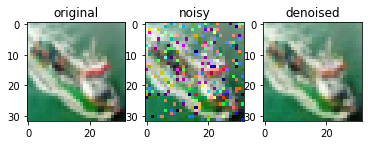

In [96]:
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('denoised')
plt.show()

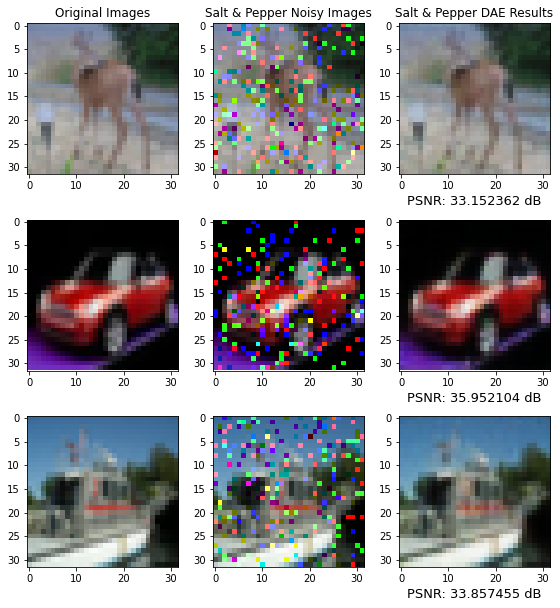

In [101]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 100
plt.subplot(3,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper DAE Results')
plt.xlabel('PSNR: 33.152362 dB',fontsize=13)
idx = 6555
plt.subplot(3,3,4)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.xlabel('PSNR: 35.952104 dB',fontsize=13)
idx = 600
plt.subplot(3,3,7)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 33.857455 dB',fontsize=13)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.savefig('figures/Salt & Pepper DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# SPK-DAE = Speckle Denoising Autoencoder 

In [102]:
# Loading the dataset
(train_data_clean_speckle, _), (test_data_clean_speckle, _) = cifar100.load_data(label_mode='fine')
train_data_clean_speckle = train_data_clean_speckle.astype('float32') / 255.
test_data_clean_speckle = test_data_clean_speckle.astype('float32') / 255.

#adding noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="poisson")
#just change the mode pf the noise to-->'gaussain',
#Speckle Noise added to image dataset
train_data_noisy_speckle = random_noise(train_data_clean_speckle, mode="speckle", seed=42, clip=False)
test_data_noisy_speckle = random_noise(test_data_clean_speckle, mode="speckle", seed=42, clip=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


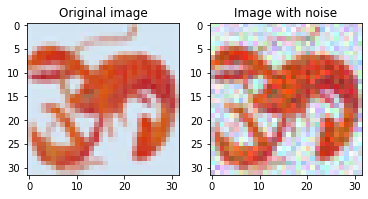

In [103]:
idx = 41
plt.subplot(1,2,1)
plt.imshow(train_data_clean_speckle[idx])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_speckle[idx])
plt.title('Image with noise')
plt.show()

In [104]:
def conv_block_speckle(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deconv_block_speckle(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

In [105]:
def denoising_autoencoder_speckle():
   dae_speckle_inputs = Input(shape=(32, 32, 3), name='dae_speckle_input')
   conv_block_speckle1 = conv_block_speckle(dae_speckle_inputs, 32, 3)
   conv_block_speckle2 = conv_block_speckle(conv_block_speckle1, 64, 3)
   conv_block_speckle3 = conv_block_speckle(conv_block_speckle2, 128, 3)
   conv_block_speckle4 = conv_block_speckle(conv_block_speckle3, 256, 3)
   conv_block_speckle5 = conv_block_speckle(conv_block_speckle4, 256, 3, 1)

   deconv_block_speckle1 = deconv_block_speckle(conv_block_speckle5, 256, 3)
   merge1 = Concatenate()([deconv_block_speckle1, conv_block_speckle3])
   deconv_block_speckle2 = deconv_block_speckle(merge1, 128, 3)
   merge2 = Concatenate()([deconv_block_speckle2, conv_block_speckle2])
   deconv_block_speckle3 = deconv_block_speckle(merge2, 64, 3)
   merge3 = Concatenate()([deconv_block_speckle3, conv_block_speckle1])
   deconv_block_speckle4 = deconv_block_speckle(merge3, 32, 3)

   final_deconv = Conv2DTranspose(filters=3,
                       kernel_size=3,
                       padding='same')(deconv_block_speckle4)

   dae_speckle_outputs = Activation('sigmoid', name='dae_speckle_output')(final_deconv)
  
   return Model(dae_speckle_inputs, dae_speckle_outputs, name='dae_speckle')

In [106]:
dae_speckle = denoising_autoencoder_speckle()
dae_speckle.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('denoising_speckle_noise_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

dae_speckle.fit(train_data_noisy_speckle,
       train_data_clean_speckle,
       validation_data=(test_data_noisy_speckle, test_data_clean_speckle),
       epochs=dae_epochs_global_variable, #40 epochs are recommended<<<---------------------------------- Must 40 ephocs
       batch_size=128,
       callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
49920/50000 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00001: val_loss improved from inf to 0.00533, saving model to denoising_speckle_noise_model.h5
50000/50000 [==============================] - 192s 4ms/sample - loss: 0.0037 - val_loss: 0.0053


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


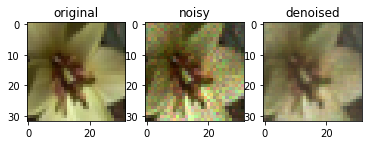

In [107]:
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle = dae_speckle.predict(test_data_noisy_speckle)
idx = 5
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


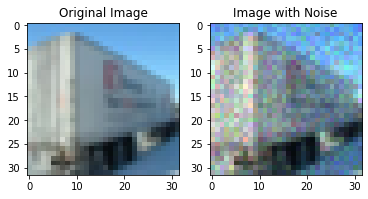

In [108]:
# Loading the dataset CIFAR-10 for testing DAEs
(train_data_clean_speckle_cifar10, _), (test_data_clean_speckle_cifar10, _) = cifar10.load_data()
train_data_clean_speckle_cifar10 = train_data_clean_speckle_cifar10.astype('float32') / 255.
test_data_clean_speckle_cifar10 = test_data_clean_speckle_cifar10.astype('float32') / 255.


#Adding Noise to CIFAR-10 images
#Adding speckle noise in data
noise_factor = 0.10

from skimage.util import random_noise

#noisy = random_noise(img, mode="speckle")
train_data_noisy_speckle_cifar10  = random_noise(train_data_clean_speckle_cifar10 , mode="speckle", seed=42, clip=False)
test_data_noisy_speckle_cifar10  = random_noise(test_data_clean_speckle_cifar10 , mode="speckle", seed=42, clip=False)

idx = 15
plt.subplot(1,2,1)
plt.imshow(train_data_clean_speckle_cifar10[idx])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(train_data_noisy_speckle_cifar10[idx])
plt.title('Image with Noise')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


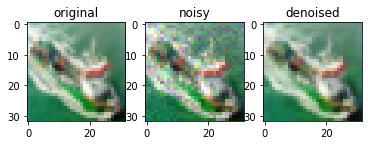

In [110]:
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
idx = 15
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('denoised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


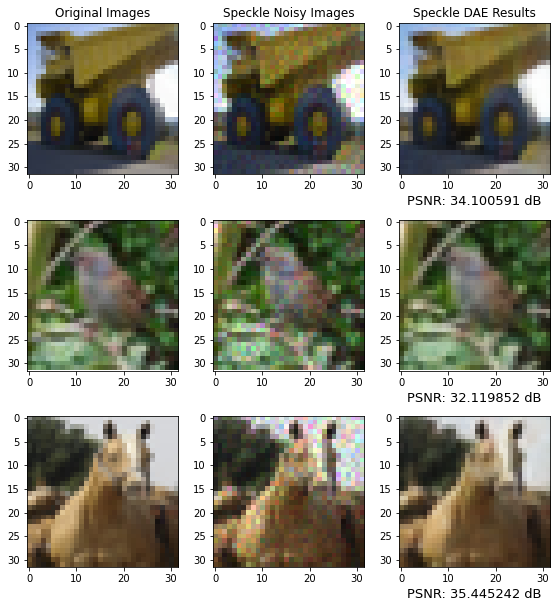

In [119]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0.3)
idx = 9777
plt.subplot(3,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original Images')
plt.subplot(3,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle Noisy Images')
plt.subplot(3,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('Speckle DAE Results')
plt.xlabel('PSNR: 34.100591 dB',fontsize=13)
idx = 65
plt.subplot(3,3,4)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.subplot(3,3,5)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.subplot(3,3,6)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.xlabel('PSNR: 32.119852 dB',fontsize=13)
idx = 7899
plt.subplot(3,3,7)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.subplot(3,3,8)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.subplot(3,3,9)
plt.xlabel('PSNR: 35.445242 dB',fontsize=13)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.savefig('figures/Speckle DAE Results.png', dpi=400) # always save image before showing it.
plt.show()

# Testing Network # 2  - Denoising Autoencoder models (4 DAEs)

# Custom Images Testing

In [ ]:
from PIL import Image
from numpy import asarray

# loading the original image to compare
img_name='0002.png' # add original image name here
img_original = Image.open('denoising_manual_test_images/'+img_name) 
numpydata_img_original = asarray(img_original)

#Gaussian Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/gau_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_gaussian_noise_model.h5')
cifar10_test_denoised = dae_gaussian.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Gassian')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('GAU-DAE')
plt.show()

#Poisson Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/po_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_poisson_noise_model.h5')
cifar10_test_denoised = dae_poisson.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Poisson')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('PO-DAE')
plt.show()

#Salt & Pepper Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/sp_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_salt_pepper_noise_model.h5')
cifar10_test_denoised = dae_salt_pepper.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Salt & Pepper')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('S&P-DAE')
plt.show()

#Speckle Denoising Autoencoder
# loading the image and convert into numpy array
img = Image.open('denoising_manual_test_images/spk_noise'+img_name)
numpydata = asarray(img)
numpydata = numpydata.astype('float32') / 255.
train_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = numpydata
test_data_noisy_custom_img = test_data_noisy_custom_img.reshape((-1, 32, 32, 3))
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
cifar10_test_denoised = dae_speckle.predict(test_data_noisy_custom_img)
idx = 0
plt.subplot(1,3,1)
plt.imshow(numpydata_img_original)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_custom_img[idx])
plt.title('Speckle')
plt.subplot(1,3,3)
plt.imshow(cifar10_test_denoised[idx])
plt.title('SPK-DAE')
plt.show()

# DAE Testing on CIFAR-10 Image dataset

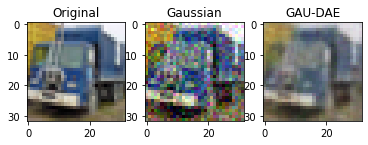

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


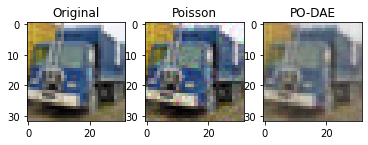

NameError: name 'test_data_noisy_salt_pepper_cifar10' is not defined

In [96]:
# Testing All DAEs on same image for differnet noises

idx = 14 #set the image id here

dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
test_data_denoised_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.show()

dae_poisson.load_weights('denoising_poisson_noise_model.h5')
test_data_denoised_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.show()

dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
test_data_denoised_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.show()

dae_speckle.load_weights('denoising_speckle_noise_model.h5')
test_data_denoised_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
plt.subplot(1,3,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle')
plt.subplot(1,3,3)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.show()

# Testing 4 DAEs on a each noise type

In [ ]:
dae_gaussian.load_weights('denoising_gaussian_noise_model.h5')
dae_poisson.load_weights('denoising_poisson_noise_model.h5')
dae_salt_pepper.load_weights('denoising_salt_pepper_noise_model.h5')
dae_speckle.load_weights('denoising_speckle_noise_model.h5')
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')

In [ ]:
idx = 1244 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_gaussian_cifar10)
print('All DAEs on Gaussian Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

All DAEs on Poisson Noise


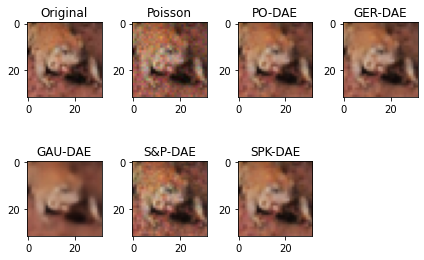

In [137]:
idx = 5 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_poisson_cifar10)
print('All DAEs on Poisson Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

All DAEs on Salt & Pepper Noise


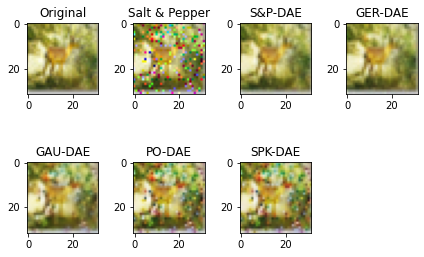

In [138]:
idx = 500 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)
print('All DAEs on Salt & Pepper Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All DAEs on Speckle Noise


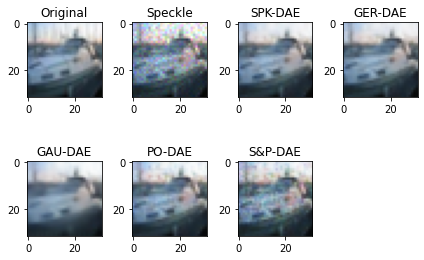

In [152]:
idx = 2 #set the image id here

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_speckle_cifar10)
print('All DAEs on Speckle Noise')
plt.subplot(2,4,1)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle')
plt.subplot(2,4,3)
plt.imshow(test_data_DAE_speckle_cifar10[idx])
plt.title('SPK-DAE')
plt.subplot(2,4,4)
plt.imshow(test_data_DAE_generalized_cifar10[idx])
plt.title('GER-DAE')
plt.subplot(2,4,5)
plt.imshow(test_data_DAE_gaussian_cifar10[idx])
plt.title('GAU-DAE')
plt.subplot(2,4,6)
plt.imshow(test_data_DAE_poisson_cifar10[idx])
plt.title('PO-DAE')
plt.subplot(2,4,7)
plt.imshow(test_data_DAE_salt_pepper_cifar10[idx])
plt.title('S&P-DAE')
plt.tight_layout()
plt.show()

# Testing of PSNR here - Rough

In [209]:
#Orignal Image saving as png
idx = 1
img_arr=test_data_clean_speckle_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/original_image.png")

#Denoised Specific DAE Image saving as png
img_arr=test_data_DAE_speckle_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/specfic_dae_denoised_image.png")

#Denoised Generalized DAE Image saving as png
img_arr=test_data_DAE_generalized_cifar10[idx]*255
img_arr=img_arr.astype(np.uint8)
from PIL import Image
import numpy as np
img = Image.fromarray(img_arr)
#img.show() # Image will be shown in a seperate window - close it when running code again.
img.save("denoised_images_test_psnr/generalized_dae_denoised_image.png")

In [210]:
# Calculating PSNR of the Image - An improved function
from math import log10, sqrt
import cv2
import numpy as np

def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    print(f"PSNR value is {psnr} dB")
    
# Invoke the function by passing the names of original and denoised images as parameters
print("PSNR of Specfic DAE")
PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image.png","denoised_images_test_psnr/specfic_dae_denoised_image.png")
print("PSNR of Generalized DAE")
PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image.png","denoised_images_test_psnr/generalized_dae_denoised_image.png") 

PSNR of Specfic DAE
PSNR value is 32.954627005843165 dB
PSNR of Generalized DAE
PSNR value is 32.79655708361612 dB


# Calculating the MEAN difference between Specfic DAE and Generalized DAE

In [229]:
#Gaussain DAE and Generalized DAE MEAN difference Calculating

from math import log10, sqrt
import cv2
import numpy as np

test_data_DAE_gaussian_cifar10 = dae_gaussian.predict(test_data_noisy_gaussian_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_gaussian_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=10000
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_gaussian_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_gaussian_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Gaussian - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

PSNR of Specfic DAE for image 1
30.352591035935845
PSNR of Generalized DAE for image 1
30.266903728279814
--------------------------------------------------------------
PSNR of Specfic DAE for image 2
30.90656940694671
PSNR of Generalized DAE for image 2
31.092406381226763
--------------------------------------------------------------
PSNR of Specfic DAE for image 3
30.899957815464127
PSNR of Generalized DAE for image 3
30.791238531741257
--------------------------------------------------------------
PSNR of Specfic DAE for image 4
30.57493304755217
PSNR of Generalized DAE for image 4
30.56187333825254
--------------------------------------------------------------
PSNR of Specfic DAE for image 5
29.691046470120774
PSNR of Generalized DAE for image 5
29.69945763164389
--------------------------------------------------------------
PSNR of Specfic DAE for image 6
30.568831976795984
PSNR of Generalized DAE for image 6
30.473938621901947
-----------------------------------------------------

PSNR of Specfic DAE for image 54
30.09379247189637
PSNR of Generalized DAE for image 54
30.200643477379103
--------------------------------------------------------------
PSNR of Specfic DAE for image 55
31.275689592178605
PSNR of Generalized DAE for image 55
31.447921413296758
--------------------------------------------------------------
PSNR of Specfic DAE for image 56
32.71844932946924
PSNR of Generalized DAE for image 56
32.56938896841212
--------------------------------------------------------------
PSNR of Specfic DAE for image 57
29.94675318546326
PSNR of Generalized DAE for image 57
30.043213955238045
--------------------------------------------------------------
PSNR of Specfic DAE for image 58
31.63413436866947
PSNR of Generalized DAE for image 58
31.668126027217568
--------------------------------------------------------------
PSNR of Specfic DAE for image 59
30.712806285246465
PSNR of Generalized DAE for image 59
30.502133421659817
------------------------------------------

--------------------------------------------------------------
PSNR of Specfic DAE for image 105
30.007285047534374
PSNR of Generalized DAE for image 105
29.92609928938751
--------------------------------------------------------------
PSNR of Specfic DAE for image 106
32.46267829243375
PSNR of Generalized DAE for image 106
32.139566718674814
--------------------------------------------------------------
PSNR of Specfic DAE for image 107
31.030225248469833
PSNR of Generalized DAE for image 107
30.876616839995012
--------------------------------------------------------------
PSNR of Specfic DAE for image 108
30.32736322523948
PSNR of Generalized DAE for image 108
30.408240913399037
--------------------------------------------------------------
PSNR of Specfic DAE for image 109
30.1073875834265
PSNR of Generalized DAE for image 109
29.96258852567689
--------------------------------------------------------------
PSNR of Specfic DAE for image 110
31.404354075443457
PSNR of Generalized DAE f

PSNR of Generalized DAE for image 152
30.773094581049495
--------------------------------------------------------------
PSNR of Specfic DAE for image 153
30.346441040210223
PSNR of Generalized DAE for image 153
30.294340244156786
--------------------------------------------------------------
PSNR of Specfic DAE for image 154
31.01418645731672
PSNR of Generalized DAE for image 154
30.8498561769861
--------------------------------------------------------------
PSNR of Specfic DAE for image 155
32.36748010558128
PSNR of Generalized DAE for image 155
32.058697529138975
--------------------------------------------------------------
PSNR of Specfic DAE for image 156
30.95671013982458
PSNR of Generalized DAE for image 156
30.827623905168807
--------------------------------------------------------------
PSNR of Specfic DAE for image 157
31.4958249421938
PSNR of Generalized DAE for image 157
31.294512137564716
--------------------------------------------------------------
PSNR of Specfic DAE fo

PSNR of Generalized DAE for image 202
31.803819136638033
--------------------------------------------------------------
PSNR of Specfic DAE for image 203
31.49355516379191
PSNR of Generalized DAE for image 203
31.386665801958532
--------------------------------------------------------------
PSNR of Specfic DAE for image 204
30.001365559597737
PSNR of Generalized DAE for image 204
30.05198427590233
--------------------------------------------------------------
PSNR of Specfic DAE for image 205
30.431206270317
PSNR of Generalized DAE for image 205
30.46928549225969
--------------------------------------------------------------
PSNR of Specfic DAE for image 206
30.306641958172396
PSNR of Generalized DAE for image 206
30.338865669486744
--------------------------------------------------------------
PSNR of Specfic DAE for image 207
31.90676758739485
PSNR of Generalized DAE for image 207
31.706828283784503
--------------------------------------------------------------
PSNR of Specfic DAE fo

31.0282688118322
--------------------------------------------------------------
PSNR of Specfic DAE for image 251
30.445347512577243
PSNR of Generalized DAE for image 251
30.48104911464874
--------------------------------------------------------------
PSNR of Specfic DAE for image 252
31.05385462767479
PSNR of Generalized DAE for image 252
30.88567158028851
--------------------------------------------------------------
PSNR of Specfic DAE for image 253
29.624397088141677
PSNR of Generalized DAE for image 253
29.651419756403314
--------------------------------------------------------------
PSNR of Specfic DAE for image 254
30.771977705437607
PSNR of Generalized DAE for image 254
30.675410195642026
--------------------------------------------------------------
PSNR of Specfic DAE for image 255
30.628975195948772
PSNR of Generalized DAE for image 255
30.658602945893968
--------------------------------------------------------------
PSNR of Specfic DAE for image 256
31.141442871137208
PSNR 

PSNR of Specfic DAE for image 302
30.039877533894334
PSNR of Generalized DAE for image 302
29.98965917980953
--------------------------------------------------------------
PSNR of Specfic DAE for image 303
30.44852841580626
PSNR of Generalized DAE for image 303
30.360615608831747
--------------------------------------------------------------
PSNR of Specfic DAE for image 304
31.10514644556869
PSNR of Generalized DAE for image 304
30.87036943187829
--------------------------------------------------------------
PSNR of Specfic DAE for image 305
31.28561679467826
PSNR of Generalized DAE for image 305
31.160884060872483
--------------------------------------------------------------
PSNR of Specfic DAE for image 306
32.12039441924401
PSNR of Generalized DAE for image 306
31.907206042138085
--------------------------------------------------------------
PSNR of Specfic DAE for image 307
30.410510485108855
PSNR of Generalized DAE for image 307
30.31642897233248
--------------------------------

30.175080777839383
PSNR of Generalized DAE for image 351
30.024173753169308
--------------------------------------------------------------
PSNR of Specfic DAE for image 352
30.091793509871287
PSNR of Generalized DAE for image 352
30.047300171742663
--------------------------------------------------------------
PSNR of Specfic DAE for image 353
31.51797141578486
PSNR of Generalized DAE for image 353
31.213693420889452
--------------------------------------------------------------
PSNR of Specfic DAE for image 354
32.23435415612834
PSNR of Generalized DAE for image 354
32.2092963692985
--------------------------------------------------------------
PSNR of Specfic DAE for image 355
30.61843369705526
PSNR of Generalized DAE for image 355
30.544710210368002
--------------------------------------------------------------
PSNR of Specfic DAE for image 356
29.81320533292888
PSNR of Generalized DAE for image 356
29.83942077047791
--------------------------------------------------------------
PSN

30.4664524341051
--------------------------------------------------------------
PSNR of Specfic DAE for image 401
30.481656351361668
PSNR of Generalized DAE for image 401
30.379318390098348
--------------------------------------------------------------
PSNR of Specfic DAE for image 402
31.05424261330115
PSNR of Generalized DAE for image 402
31.035409932825413
--------------------------------------------------------------
PSNR of Specfic DAE for image 403
30.45699807843427
PSNR of Generalized DAE for image 403
30.328957663450524
--------------------------------------------------------------
PSNR of Specfic DAE for image 404
31.346194828017705
PSNR of Generalized DAE for image 404
31.326114648074235
--------------------------------------------------------------
PSNR of Specfic DAE for image 405
31.849909098423865
PSNR of Generalized DAE for image 405
32.03525551474541
--------------------------------------------------------------
PSNR of Specfic DAE for image 406
30.625533846721133
PSNR 

PSNR of Generalized DAE for image 452
30.481777808893483
--------------------------------------------------------------
PSNR of Specfic DAE for image 453
30.61572715655487
PSNR of Generalized DAE for image 453
30.37675679639175
--------------------------------------------------------------
PSNR of Specfic DAE for image 454
30.82073734973629
PSNR of Generalized DAE for image 454
30.96549911297639
--------------------------------------------------------------
PSNR of Specfic DAE for image 455
32.125924395273756
PSNR of Generalized DAE for image 455
32.35127290399666
--------------------------------------------------------------
PSNR of Specfic DAE for image 456
29.776788208056413
PSNR of Generalized DAE for image 456
29.996909506733907
--------------------------------------------------------------
PSNR of Specfic DAE for image 457
30.377112482957287
PSNR of Generalized DAE for image 457
30.35702631997125
--------------------------------------------------------------
PSNR of Specfic DAE f

PSNR of Specfic DAE for image 504
30.124648495930586
PSNR of Generalized DAE for image 504
30.206772705594894
--------------------------------------------------------------
PSNR of Specfic DAE for image 505
30.71872832632947
PSNR of Generalized DAE for image 505
30.689453354384547
--------------------------------------------------------------
PSNR of Specfic DAE for image 506
30.588629632391196
PSNR of Generalized DAE for image 506
30.566329545383862
--------------------------------------------------------------
PSNR of Specfic DAE for image 507
30.484086147616676
PSNR of Generalized DAE for image 507
30.29555023088023
--------------------------------------------------------------
PSNR of Specfic DAE for image 508
31.12420014957908
PSNR of Generalized DAE for image 508
30.896882974842605
--------------------------------------------------------------
PSNR of Specfic DAE for image 509
32.52137466947499
PSNR of Generalized DAE for image 509
32.61448523634272
------------------------------

31.229333310036623
--------------------------------------------------------------
PSNR of Specfic DAE for image 555
29.993456494222045
PSNR of Generalized DAE for image 555
29.92436831303366
--------------------------------------------------------------
PSNR of Specfic DAE for image 556
31.259010511886917
PSNR of Generalized DAE for image 556
31.15220128959885
--------------------------------------------------------------
PSNR of Specfic DAE for image 557
30.360497492922228
PSNR of Generalized DAE for image 557
30.259765759501537
--------------------------------------------------------------
PSNR of Specfic DAE for image 558
30.999246454725366
PSNR of Generalized DAE for image 558
30.90544445823803
--------------------------------------------------------------
PSNR of Specfic DAE for image 559
30.276925904176863
PSNR of Generalized DAE for image 559
30.179338345192818
--------------------------------------------------------------
PSNR of Specfic DAE for image 560
31.451533868348275
PSN

PSNR of Specfic DAE for image 604
31.62347349188476
PSNR of Generalized DAE for image 604
31.500368060902805
--------------------------------------------------------------
PSNR of Specfic DAE for image 605
30.244650793073905
PSNR of Generalized DAE for image 605
30.270326720922593
--------------------------------------------------------------
PSNR of Specfic DAE for image 606
30.39495786656311
PSNR of Generalized DAE for image 606
30.675359397103904
--------------------------------------------------------------
PSNR of Specfic DAE for image 607
30.47874238916026
PSNR of Generalized DAE for image 607
30.306945281249615
--------------------------------------------------------------
PSNR of Specfic DAE for image 608
30.58273306608289
PSNR of Generalized DAE for image 608
30.59665385046802
--------------------------------------------------------------
PSNR of Specfic DAE for image 609
30.761964639759594
PSNR of Generalized DAE for image 609
30.63830818452284
-------------------------------

30.143303843655346
--------------------------------------------------------------
PSNR of Specfic DAE for image 656
31.75095135243186
PSNR of Generalized DAE for image 656
31.816947299859176
--------------------------------------------------------------
PSNR of Specfic DAE for image 657
30.870821070616476
PSNR of Generalized DAE for image 657
30.692282742435054
--------------------------------------------------------------
PSNR of Specfic DAE for image 658
29.822649716302372
PSNR of Generalized DAE for image 658
30.007415715469307
--------------------------------------------------------------
PSNR of Specfic DAE for image 659
30.788761073638256
PSNR of Generalized DAE for image 659
30.90914181302301
--------------------------------------------------------------
PSNR of Specfic DAE for image 660
30.813730587990552
PSNR of Generalized DAE for image 660
30.60569260420209
--------------------------------------------------------------
PSNR of Specfic DAE for image 661
30.194909435059017
PSN

PSNR of Specfic DAE for image 707
32.42812651343465
PSNR of Generalized DAE for image 707
31.961203160231648
--------------------------------------------------------------
PSNR of Specfic DAE for image 708
30.504135172490123
PSNR of Generalized DAE for image 708
30.460477595759382
--------------------------------------------------------------
PSNR of Specfic DAE for image 709
31.19725029856562
PSNR of Generalized DAE for image 709
31.72910895219427
--------------------------------------------------------------
PSNR of Specfic DAE for image 710
32.476153369710026
PSNR of Generalized DAE for image 710
32.2619722822595
--------------------------------------------------------------
PSNR of Specfic DAE for image 711
30.020087385998508
PSNR of Generalized DAE for image 711
30.012253194958074
--------------------------------------------------------------
PSNR of Specfic DAE for image 712
31.60156970309282
PSNR of Generalized DAE for image 712
31.46339411197492
--------------------------------

PSNR of Specfic DAE for image 755
31.75088627886439
PSNR of Generalized DAE for image 755
31.69370720595809
--------------------------------------------------------------
PSNR of Specfic DAE for image 756
31.921192341244616
PSNR of Generalized DAE for image 756
31.74870687761745
--------------------------------------------------------------
PSNR of Specfic DAE for image 757
30.735873361302893
PSNR of Generalized DAE for image 757
30.57230307991667
--------------------------------------------------------------
PSNR of Specfic DAE for image 758
32.66904937610184
PSNR of Generalized DAE for image 758
32.810612403110035
--------------------------------------------------------------
PSNR of Specfic DAE for image 759
32.18546101987848
PSNR of Generalized DAE for image 759
31.806224096072214
--------------------------------------------------------------
PSNR of Specfic DAE for image 760
30.38694094713302
PSNR of Generalized DAE for image 760
30.244535789305207
--------------------------------

PSNR of Generalized DAE for image 804
30.496864928978077
--------------------------------------------------------------
PSNR of Specfic DAE for image 805
30.437333298273188
PSNR of Generalized DAE for image 805
30.41337900887168
--------------------------------------------------------------
PSNR of Specfic DAE for image 806
31.629670698604343
PSNR of Generalized DAE for image 806
31.770190751402907
--------------------------------------------------------------
PSNR of Specfic DAE for image 807
31.270355800234192
PSNR of Generalized DAE for image 807
31.092713942351423
--------------------------------------------------------------
PSNR of Specfic DAE for image 808
30.079088315969784
PSNR of Generalized DAE for image 808
30.116578910033844
--------------------------------------------------------------
PSNR of Specfic DAE for image 809
29.78913497023356
PSNR of Generalized DAE for image 809
30.00434605789861
--------------------------------------------------------------
PSNR of Specfic DA

30.267250530373694
--------------------------------------------------------------
PSNR of Specfic DAE for image 853
30.692486733525648
PSNR of Generalized DAE for image 853
30.572848791300093
--------------------------------------------------------------
PSNR of Specfic DAE for image 854
30.604817869599955
PSNR of Generalized DAE for image 854
30.511564358740557
--------------------------------------------------------------
PSNR of Specfic DAE for image 855
30.767383355846523
PSNR of Generalized DAE for image 855
31.09134406489828
--------------------------------------------------------------
PSNR of Specfic DAE for image 856
31.37907297784963
PSNR of Generalized DAE for image 856
31.30756622462217
--------------------------------------------------------------
PSNR of Specfic DAE for image 857
30.383234855829713
PSNR of Generalized DAE for image 857
30.438415436374374
--------------------------------------------------------------
PSNR of Specfic DAE for image 858
34.91076543430351
PSNR

31.325672097065297
--------------------------------------------------------------
PSNR of Specfic DAE for image 903
30.062360056016555
PSNR of Generalized DAE for image 903
29.955481299740207
--------------------------------------------------------------
PSNR of Specfic DAE for image 904
30.91646543124989
PSNR of Generalized DAE for image 904
30.71388241952061
--------------------------------------------------------------
PSNR of Specfic DAE for image 905
31.370926960712822
PSNR of Generalized DAE for image 905
31.179499759777684
--------------------------------------------------------------
PSNR of Specfic DAE for image 906
30.891914357782188
PSNR of Generalized DAE for image 906
30.801842360590207
--------------------------------------------------------------
PSNR of Specfic DAE for image 907
30.448865921024147
PSNR of Generalized DAE for image 907
30.363829594217687
--------------------------------------------------------------
PSNR of Specfic DAE for image 908
31.33497515171696
PSN

31.425373659827965
--------------------------------------------------------------
PSNR of Specfic DAE for image 953
30.953053310699502
PSNR of Generalized DAE for image 953
30.821315190328008
--------------------------------------------------------------
PSNR of Specfic DAE for image 954
30.773406318536416
PSNR of Generalized DAE for image 954
30.72103780284222
--------------------------------------------------------------
PSNR of Specfic DAE for image 955
29.668064880673903
PSNR of Generalized DAE for image 955
29.844661923698347
--------------------------------------------------------------
PSNR of Specfic DAE for image 956
30.430582039073037
PSNR of Generalized DAE for image 956
30.48160776930002
--------------------------------------------------------------
PSNR of Specfic DAE for image 957
31.3605651301941
PSNR of Generalized DAE for image 957
31.465069319431507
--------------------------------------------------------------
PSNR of Specfic DAE for image 958
30.92729910865917
PSNR 

32.06379976386823
PSNR of Generalized DAE for image 1000
31.931864346193493
--------------------------------------------------------------
PSNR of Specfic DAE for image 1001
30.527639193160354
PSNR of Generalized DAE for image 1001
30.548162079941488
--------------------------------------------------------------
PSNR of Specfic DAE for image 1002
31.464642841677236
PSNR of Generalized DAE for image 1002
31.344861159036096
--------------------------------------------------------------
PSNR of Specfic DAE for image 1003
30.785216854782043
PSNR of Generalized DAE for image 1003
30.88015659365685
--------------------------------------------------------------
PSNR of Specfic DAE for image 1004
30.28406894527845
PSNR of Generalized DAE for image 1004
30.410916744133722
--------------------------------------------------------------
PSNR of Specfic DAE for image 1005
32.5609509954609
PSNR of Generalized DAE for image 1005
31.958198914130108
-----------------------------------------------------

29.410835165700707
--------------------------------------------------------------
PSNR of Specfic DAE for image 1050
30.343004607328915
PSNR of Generalized DAE for image 1050
30.34837228468435
--------------------------------------------------------------
PSNR of Specfic DAE for image 1051
30.869917840102783
PSNR of Generalized DAE for image 1051
30.885138425597475
--------------------------------------------------------------
PSNR of Specfic DAE for image 1052
29.612250765160493
PSNR of Generalized DAE for image 1052
29.56650046736074
--------------------------------------------------------------
PSNR of Specfic DAE for image 1053
32.2764166390295
PSNR of Generalized DAE for image 1053
31.588825040156546
--------------------------------------------------------------
PSNR of Specfic DAE for image 1054
31.110674088263572
PSNR of Generalized DAE for image 1054
30.872973641636644
--------------------------------------------------------------
PSNR of Specfic DAE for image 1055
31.450349623

PSNR of Specfic DAE for image 1098
30.020131070125156
PSNR of Generalized DAE for image 1098
30.05797320929435
--------------------------------------------------------------
PSNR of Specfic DAE for image 1099
30.195705377244888
PSNR of Generalized DAE for image 1099
30.25220170062005
--------------------------------------------------------------
PSNR of Specfic DAE for image 1100
31.95444652661115
PSNR of Generalized DAE for image 1100
31.812885864991625
--------------------------------------------------------------
PSNR of Specfic DAE for image 1101
30.57982505204537
PSNR of Generalized DAE for image 1101
30.419385137560518
--------------------------------------------------------------
PSNR of Specfic DAE for image 1102
32.27546197619206
PSNR of Generalized DAE for image 1102
31.875615961433045
--------------------------------------------------------------
PSNR of Specfic DAE for image 1103
30.863149592358727
PSNR of Generalized DAE for image 1103
30.840084223489697
------------------

31.144639301750495
--------------------------------------------------------------
PSNR of Specfic DAE for image 1148
31.409043042399762
PSNR of Generalized DAE for image 1148
31.397690031130956
--------------------------------------------------------------
PSNR of Specfic DAE for image 1149
30.861903261815414
PSNR of Generalized DAE for image 1149
30.581490086773144
--------------------------------------------------------------
PSNR of Specfic DAE for image 1150
30.446889477734228
PSNR of Generalized DAE for image 1150
30.38235631081088
--------------------------------------------------------------
PSNR of Specfic DAE for image 1151
29.921506236406593
PSNR of Generalized DAE for image 1151
29.976102760513186
--------------------------------------------------------------
PSNR of Specfic DAE for image 1152
30.65114546546556
PSNR of Generalized DAE for image 1152
30.631488852482903
--------------------------------------------------------------
PSNR of Specfic DAE for image 1153
31.6446944

32.1388551221372
--------------------------------------------------------------
PSNR of Specfic DAE for image 1196
30.488146940588933
PSNR of Generalized DAE for image 1196
30.449541010156196
--------------------------------------------------------------
PSNR of Specfic DAE for image 1197
30.84045357311643
PSNR of Generalized DAE for image 1197
30.780764621577532
--------------------------------------------------------------
PSNR of Specfic DAE for image 1198
32.61623214936359
PSNR of Generalized DAE for image 1198
32.72088939179656
--------------------------------------------------------------
PSNR of Specfic DAE for image 1199
30.258219591051954
PSNR of Generalized DAE for image 1199
30.15719033177277
--------------------------------------------------------------
PSNR of Specfic DAE for image 1200
29.94177355589278
PSNR of Generalized DAE for image 1200
29.825071452209414
--------------------------------------------------------------
PSNR of Specfic DAE for image 1201
30.598524976067

31.262062098209668
--------------------------------------------------------------
PSNR of Specfic DAE for image 1245
30.94407329541803
PSNR of Generalized DAE for image 1245
30.962513207662326
--------------------------------------------------------------
PSNR of Specfic DAE for image 1246
30.493136943171905
PSNR of Generalized DAE for image 1246
30.6437511982668
--------------------------------------------------------------
PSNR of Specfic DAE for image 1247
30.449058792925456
PSNR of Generalized DAE for image 1247
30.292456128436427
--------------------------------------------------------------
PSNR of Specfic DAE for image 1248
31.447860725434214
PSNR of Generalized DAE for image 1248
31.14328123848616
--------------------------------------------------------------
PSNR of Specfic DAE for image 1249
31.95192401612762
PSNR of Generalized DAE for image 1249
31.71727627677531
--------------------------------------------------------------
PSNR of Specfic DAE for image 1250
29.99252313209

PSNR of Specfic DAE for image 1294
29.85600444736253
PSNR of Generalized DAE for image 1294
29.973206397537165
--------------------------------------------------------------
PSNR of Specfic DAE for image 1295
31.518865796851244
PSNR of Generalized DAE for image 1295
31.40723899440136
--------------------------------------------------------------
PSNR of Specfic DAE for image 1296
32.018682280758114
PSNR of Generalized DAE for image 1296
31.816385737083493
--------------------------------------------------------------
PSNR of Specfic DAE for image 1297
31.419129439739912
PSNR of Generalized DAE for image 1297
31.652543967480074
--------------------------------------------------------------
PSNR of Specfic DAE for image 1298
31.865415166078442
PSNR of Generalized DAE for image 1298
31.58913849928083
--------------------------------------------------------------
PSNR of Specfic DAE for image 1299
29.875059230265393
PSNR of Generalized DAE for image 1299
29.81526758417855
-----------------

29.952254583445086
--------------------------------------------------------------
PSNR of Specfic DAE for image 1344
30.94655987417413
PSNR of Generalized DAE for image 1344
31.03725916309333
--------------------------------------------------------------
PSNR of Specfic DAE for image 1345
30.422954461585576
PSNR of Generalized DAE for image 1345
30.547224872598818
--------------------------------------------------------------
PSNR of Specfic DAE for image 1346
31.622841620788293
PSNR of Generalized DAE for image 1346
31.401771295219238
--------------------------------------------------------------
PSNR of Specfic DAE for image 1347
30.128946469082912
PSNR of Generalized DAE for image 1347
30.28806303456974
--------------------------------------------------------------
PSNR of Specfic DAE for image 1348
30.380481093095494
PSNR of Generalized DAE for image 1348
30.41034321302629
--------------------------------------------------------------
PSNR of Specfic DAE for image 1349
30.793717403

29.547358791128964
--------------------------------------------------------------
PSNR of Specfic DAE for image 1392
30.559251264954437
PSNR of Generalized DAE for image 1392
30.606042547380635
--------------------------------------------------------------
PSNR of Specfic DAE for image 1393
30.844492085669764
PSNR of Generalized DAE for image 1393
30.808463283029475
--------------------------------------------------------------
PSNR of Specfic DAE for image 1394
30.097126121250263
PSNR of Generalized DAE for image 1394
30.126752180504116
--------------------------------------------------------------
PSNR of Specfic DAE for image 1395
30.533264722406244
PSNR of Generalized DAE for image 1395
30.43281527984852
--------------------------------------------------------------
PSNR of Specfic DAE for image 1396
30.68451271962747
PSNR of Generalized DAE for image 1396
30.558781437950344
--------------------------------------------------------------
PSNR of Specfic DAE for image 1397
30.0669058

--------------------------------------------------------------
PSNR of Specfic DAE for image 1440
30.274261868962213
PSNR of Generalized DAE for image 1440
30.03253327403829
--------------------------------------------------------------
PSNR of Specfic DAE for image 1441
31.548266799747214
PSNR of Generalized DAE for image 1441
31.217260001819742
--------------------------------------------------------------
PSNR of Specfic DAE for image 1442
30.179995469341346
PSNR of Generalized DAE for image 1442
30.17632591089114
--------------------------------------------------------------
PSNR of Specfic DAE for image 1443
29.752363777057305
PSNR of Generalized DAE for image 1443
29.6905605394282
--------------------------------------------------------------
PSNR of Specfic DAE for image 1444
30.384327348872166
PSNR of Generalized DAE for image 1444
30.347265246827718
--------------------------------------------------------------
PSNR of Specfic DAE for image 1445
30.998726536562557
PSNR of Gene

30.06258061755009
--------------------------------------------------------------
PSNR of Specfic DAE for image 1491
31.29861481248075
PSNR of Generalized DAE for image 1491
31.212457306307808
--------------------------------------------------------------
PSNR of Specfic DAE for image 1492
30.191204538994278
PSNR of Generalized DAE for image 1492
30.242328307298706
--------------------------------------------------------------
PSNR of Specfic DAE for image 1493
30.484134757410608
PSNR of Generalized DAE for image 1493
30.38164410745747
--------------------------------------------------------------
PSNR of Specfic DAE for image 1494
30.40017561939058
PSNR of Generalized DAE for image 1494
30.450843264188883
--------------------------------------------------------------
PSNR of Specfic DAE for image 1495
31.72503176825986
PSNR of Generalized DAE for image 1495
31.499600308532987
--------------------------------------------------------------
PSNR of Specfic DAE for image 1496
32.5467025787

PSNR of Specfic DAE for image 1542
30.917270978118264
PSNR of Generalized DAE for image 1542
30.94707358416562
--------------------------------------------------------------
PSNR of Specfic DAE for image 1543
30.88849839338918
PSNR of Generalized DAE for image 1543
30.65109494995398
--------------------------------------------------------------
PSNR of Specfic DAE for image 1544
31.580464037003203
PSNR of Generalized DAE for image 1544
31.350762041198507
--------------------------------------------------------------
PSNR of Specfic DAE for image 1545
30.856709650669547
PSNR of Generalized DAE for image 1545
30.740202443112402
--------------------------------------------------------------
PSNR of Specfic DAE for image 1546
30.53469068620824
PSNR of Generalized DAE for image 1546
30.564719831973633
--------------------------------------------------------------
PSNR of Specfic DAE for image 1547
30.24540989433474
PSNR of Generalized DAE for image 1547
30.193317988176492
------------------

31.11992124719118
PSNR of Generalized DAE for image 1643
30.896375167183542
--------------------------------------------------------------
PSNR of Specfic DAE for image 1644
30.28650676068702
PSNR of Generalized DAE for image 1644
30.24501882559996
--------------------------------------------------------------
PSNR of Specfic DAE for image 1645
29.87106851341165
PSNR of Generalized DAE for image 1645
29.832972354106467
--------------------------------------------------------------
PSNR of Specfic DAE for image 1646
31.029591376706517
PSNR of Generalized DAE for image 1646
30.870794502331698
--------------------------------------------------------------
PSNR of Specfic DAE for image 1647
32.780690767074276
PSNR of Generalized DAE for image 1647
32.43653868661493
--------------------------------------------------------------
PSNR of Specfic DAE for image 1648
30.488998486472898
PSNR of Generalized DAE for image 1648
30.306688621882323
-----------------------------------------------------

30.33700913266539
--------------------------------------------------------------
PSNR of Specfic DAE for image 1700
30.281284545104622
PSNR of Generalized DAE for image 1700
30.172523714999677
--------------------------------------------------------------
PSNR of Specfic DAE for image 1701
30.934383826951347
PSNR of Generalized DAE for image 1701
30.816327282267174
--------------------------------------------------------------
PSNR of Specfic DAE for image 1702
30.42098977264954
PSNR of Generalized DAE for image 1702
30.34714749344815
--------------------------------------------------------------
PSNR of Specfic DAE for image 1703
31.12662297622302
PSNR of Generalized DAE for image 1703
31.092713942351423
--------------------------------------------------------------
PSNR of Specfic DAE for image 1704
31.50408590174695
PSNR of Generalized DAE for image 1704
31.093524889736873
--------------------------------------------------------------
PSNR of Specfic DAE for image 1705
31.0192695408

30.06988753311964
--------------------------------------------------------------
PSNR of Specfic DAE for image 1753
31.81750893525691
PSNR of Generalized DAE for image 1753
31.79680952868408
--------------------------------------------------------------
PSNR of Specfic DAE for image 1754
30.012711073453456
PSNR of Generalized DAE for image 1754
30.047915634191288
--------------------------------------------------------------
PSNR of Specfic DAE for image 1755
30.19190890778473
PSNR of Generalized DAE for image 1755
30.24867784476371
--------------------------------------------------------------
PSNR of Specfic DAE for image 1756
30.9985076422715
PSNR of Generalized DAE for image 1756
31.116040102100428
--------------------------------------------------------------
PSNR of Specfic DAE for image 1757
31.164151686974503
PSNR of Generalized DAE for image 1757
31.159464120359132
--------------------------------------------------------------
PSNR of Specfic DAE for image 1758
30.591867439221

29.76400282267306
--------------------------------------------------------------
PSNR of Specfic DAE for image 1806
31.996005468594294
PSNR of Generalized DAE for image 1806
31.860674105271315
--------------------------------------------------------------
PSNR of Specfic DAE for image 1807
31.06420353209938
PSNR of Generalized DAE for image 1807
31.075412573415136
--------------------------------------------------------------
PSNR of Specfic DAE for image 1808
30.244696795434102
PSNR of Generalized DAE for image 1808
30.07247328372629
--------------------------------------------------------------
PSNR of Specfic DAE for image 1809
30.188320091196665
PSNR of Generalized DAE for image 1809
30.291200505243484
--------------------------------------------------------------
PSNR of Specfic DAE for image 1810
30.862274471810434
PSNR of Generalized DAE for image 1810
30.953459473025173
--------------------------------------------------------------
PSNR of Specfic DAE for image 1811
30.84507309

PSNR of Specfic DAE for image 1860
31.233577018813993
PSNR of Generalized DAE for image 1860
31.07544042342728
--------------------------------------------------------------
PSNR of Specfic DAE for image 1861
31.11972429398451
PSNR of Generalized DAE for image 1861
31.02042436725435
--------------------------------------------------------------
PSNR of Specfic DAE for image 1862
31.17930008612101
PSNR of Generalized DAE for image 1862
31.07382541786588
--------------------------------------------------------------
PSNR of Specfic DAE for image 1863
31.784692836289707
PSNR of Generalized DAE for image 1863
31.57952560356319
--------------------------------------------------------------
PSNR of Specfic DAE for image 1864
30.982121934293986
PSNR of Generalized DAE for image 1864
31.16548785960805
--------------------------------------------------------------
PSNR of Specfic DAE for image 1865
30.837025105797196
PSNR of Generalized DAE for image 1865
30.794761563031173
--------------------

31.14744164915691
--------------------------------------------------------------
PSNR of Specfic DAE for image 1918
30.429381846496284
PSNR of Generalized DAE for image 1918
30.434280717588486
--------------------------------------------------------------
PSNR of Specfic DAE for image 1919
29.44102802830585
PSNR of Generalized DAE for image 1919
29.564592332307285
--------------------------------------------------------------
PSNR of Specfic DAE for image 1920
30.625558956181496
PSNR of Generalized DAE for image 1920
30.517952861228387
--------------------------------------------------------------
PSNR of Specfic DAE for image 1921
30.599648038505865
PSNR of Generalized DAE for image 1921
30.713062483507404
--------------------------------------------------------------
PSNR of Specfic DAE for image 1922
31.768001643559977
PSNR of Generalized DAE for image 1922
31.176306082384762
--------------------------------------------------------------
PSNR of Specfic DAE for image 1923
30.2397773

PSNR of Specfic DAE for image 1972
30.60681752192206
PSNR of Generalized DAE for image 1972
30.50936360402038
--------------------------------------------------------------
PSNR of Specfic DAE for image 1973
30.629025454824262
PSNR of Generalized DAE for image 1973
30.372325014105467
--------------------------------------------------------------
PSNR of Specfic DAE for image 1974
32.39358336438768
PSNR of Generalized DAE for image 1974
32.39407383043761
--------------------------------------------------------------
PSNR of Specfic DAE for image 1975
30.164409924190977
PSNR of Generalized DAE for image 1975
30.123127316514218
--------------------------------------------------------------
PSNR of Specfic DAE for image 1976
30.374030833410526
PSNR of Generalized DAE for image 1976
30.529529933617635
--------------------------------------------------------------
PSNR of Specfic DAE for image 1977
30.55519758913768
PSNR of Generalized DAE for image 1977
30.464153446481333
------------------

PSNR of Specfic DAE for image 2028
31.01981941986217
PSNR of Generalized DAE for image 2028
31.11561844741999
--------------------------------------------------------------
PSNR of Specfic DAE for image 2029
30.23605690574822
PSNR of Generalized DAE for image 2029
30.28000895805283
--------------------------------------------------------------
PSNR of Specfic DAE for image 2030
31.57952560356319
PSNR of Generalized DAE for image 2030
31.558526537141084
--------------------------------------------------------------
PSNR of Specfic DAE for image 2031
30.05748850317207
PSNR of Generalized DAE for image 2031
29.98957242285257
--------------------------------------------------------------
PSNR of Specfic DAE for image 2032
30.471223690440453
PSNR of Generalized DAE for image 2032
30.281818083534333
--------------------------------------------------------------
PSNR of Specfic DAE for image 2033
30.300160576131702
PSNR of Generalized DAE for image 2033
30.101997849217103
--------------------

30.696619615992006
--------------------------------------------------------------
PSNR of Specfic DAE for image 2083
32.50419697932742
PSNR of Generalized DAE for image 2083
32.29267809739483
--------------------------------------------------------------
PSNR of Specfic DAE for image 2084
30.544513043522244
PSNR of Generalized DAE for image 2084
30.481267710084502
--------------------------------------------------------------
PSNR of Specfic DAE for image 2085
30.10021758896712
PSNR of Generalized DAE for image 2085
30.342745808119723
--------------------------------------------------------------
PSNR of Specfic DAE for image 2086
30.903596960576003
PSNR of Generalized DAE for image 2086
30.72088379952715
--------------------------------------------------------------
PSNR of Specfic DAE for image 2087
31.774604994801244
PSNR of Generalized DAE for image 2087
31.54876368286994
--------------------------------------------------------------
PSNR of Specfic DAE for image 2088
31.0908130041

29.495890490995492
--------------------------------------------------------------
PSNR of Specfic DAE for image 2130
30.039548420698484
PSNR of Generalized DAE for image 2130
30.18598214199769
--------------------------------------------------------------
PSNR of Specfic DAE for image 2131
31.135452367619724
PSNR of Generalized DAE for image 2131
31.087125321227727
--------------------------------------------------------------
PSNR of Specfic DAE for image 2132
30.194090903824993
PSNR of Generalized DAE for image 2132
29.993738712964056
--------------------------------------------------------------
PSNR of Specfic DAE for image 2133
30.532797698124877
PSNR of Generalized DAE for image 2133
30.326566225594306
--------------------------------------------------------------
PSNR of Specfic DAE for image 2134
30.33656274217554
PSNR of Generalized DAE for image 2134
30.389817723053977
--------------------------------------------------------------
PSNR of Specfic DAE for image 2135
30.1777752

31.22382556255154
PSNR of Generalized DAE for image 2184
31.238287481275698
--------------------------------------------------------------
PSNR of Specfic DAE for image 2185
30.618107820462267
PSNR of Generalized DAE for image 2185
30.572625537446037
--------------------------------------------------------------
PSNR of Specfic DAE for image 2186
30.90785541952443
PSNR of Generalized DAE for image 2186
30.848481492712448
--------------------------------------------------------------
PSNR of Specfic DAE for image 2187
30.51195572080436
PSNR of Generalized DAE for image 2187
30.33242993612722
--------------------------------------------------------------
PSNR of Specfic DAE for image 2188
29.941408893663333
PSNR of Generalized DAE for image 2188
30.004520164820363
--------------------------------------------------------------
PSNR of Specfic DAE for image 2189
31.203326713398106
PSNR of Generalized DAE for image 2189
31.014241377771704
----------------------------------------------------

30.278177406508103
PSNR of Generalized DAE for image 2240
30.295945876594473
--------------------------------------------------------------
PSNR of Specfic DAE for image 2241
30.93198504272892
PSNR of Generalized DAE for image 2241
30.866970365173223
--------------------------------------------------------------
PSNR of Specfic DAE for image 2242
30.739119768036907
PSNR of Generalized DAE for image 2242
30.779697805097385
--------------------------------------------------------------
PSNR of Specfic DAE for image 2243
30.591917270493223
PSNR of Generalized DAE for image 2243
30.569996966381193
--------------------------------------------------------------
PSNR of Specfic DAE for image 2244
31.02361548413326
PSNR of Generalized DAE for image 2244
30.850543682332088
--------------------------------------------------------------
PSNR of Specfic DAE for image 2245
30.586339719146878
PSNR of Generalized DAE for image 2245
30.4549937890743
----------------------------------------------------

PSNR of Specfic DAE for image 2297
30.278965574519443
PSNR of Generalized DAE for image 2297
30.146091082353166
--------------------------------------------------------------
PSNR of Specfic DAE for image 2298
30.280936620568966
PSNR of Generalized DAE for image 2298
30.179746203649415
--------------------------------------------------------------
PSNR of Specfic DAE for image 2299
31.066370767331236
PSNR of Generalized DAE for image 2299
31.236350660454264
--------------------------------------------------------------
PSNR of Specfic DAE for image 2300
32.23573635603551
PSNR of Generalized DAE for image 2300
31.98490016527913
--------------------------------------------------------------
PSNR of Specfic DAE for image 2301
31.770288796971894
PSNR of Generalized DAE for image 2301
31.466653746428022
--------------------------------------------------------------
PSNR of Specfic DAE for image 2302
30.184779609851272
PSNR of Generalized DAE for image 2302
30.217228286376205
---------------

PSNR of Specfic DAE for image 2350
30.5903478600337
PSNR of Generalized DAE for image 2350
30.389246971352044
--------------------------------------------------------------
PSNR of Specfic DAE for image 2351
32.18240543059397
PSNR of Generalized DAE for image 2351
32.20412875600009
--------------------------------------------------------------
PSNR of Specfic DAE for image 2352
30.321904364552786
PSNR of Generalized DAE for image 2352
30.288783290343947
--------------------------------------------------------------
PSNR of Specfic DAE for image 2353
30.267111806212895
PSNR of Generalized DAE for image 2353
30.170035984084222
--------------------------------------------------------------
PSNR of Specfic DAE for image 2354
30.23467978880264
PSNR of Generalized DAE for image 2354
30.31720072504261
--------------------------------------------------------------
PSNR of Specfic DAE for image 2355
31.091288160709997
PSNR of Generalized DAE for image 2355
31.274552333024893
-------------------

PSNR of Specfic DAE for image 2406
30.37706505639874
PSNR of Generalized DAE for image 2406
30.547372839260277
--------------------------------------------------------------
PSNR of Specfic DAE for image 2407
30.704411349105207
PSNR of Generalized DAE for image 2407
30.722963305198036
--------------------------------------------------------------
PSNR of Specfic DAE for image 2408
30.990334370049656
PSNR of Generalized DAE for image 2408
30.86185023440615
--------------------------------------------------------------
PSNR of Specfic DAE for image 2409
31.92210605764963
PSNR of Generalized DAE for image 2409
31.80859741610859
--------------------------------------------------------------
PSNR of Specfic DAE for image 2410
30.030781256498553
PSNR of Generalized DAE for image 2410
30.015852112831467
--------------------------------------------------------------
PSNR of Specfic DAE for image 2411
31.192469667969757
PSNR of Generalized DAE for image 2411
31.169612686739544
-----------------

32.90591977420282
PSNR of Generalized DAE for image 2460
32.57823699624913
--------------------------------------------------------------
PSNR of Specfic DAE for image 2461
30.626387649826896
PSNR of Generalized DAE for image 2461
30.64022254122957
--------------------------------------------------------------
PSNR of Specfic DAE for image 2462
34.55912575389749
PSNR of Generalized DAE for image 2462
34.5396653621041
--------------------------------------------------------------
PSNR of Specfic DAE for image 2463
30.88167451458205
PSNR of Generalized DAE for image 2463
30.711269412985413
--------------------------------------------------------------
PSNR of Specfic DAE for image 2464
32.45999594836835
PSNR of Generalized DAE for image 2464
32.382807101336574
--------------------------------------------------------------
PSNR of Specfic DAE for image 2465
30.657919864205446
PSNR of Generalized DAE for image 2465
30.585120584053453
--------------------------------------------------------

PSNR of Specfic DAE for image 2509
29.993369661375517
PSNR of Generalized DAE for image 2509
30.042928503156535
--------------------------------------------------------------
PSNR of Specfic DAE for image 2510
30.519104280390593
PSNR of Generalized DAE for image 2510
30.406688731639015
--------------------------------------------------------------
PSNR of Specfic DAE for image 2511
30.239179988435186
PSNR of Generalized DAE for image 2511
30.282630115625558
--------------------------------------------------------------
PSNR of Specfic DAE for image 2512
30.961156656321897
PSNR of Generalized DAE for image 2512
30.62663880033523
--------------------------------------------------------------
PSNR of Specfic DAE for image 2513
30.620339311246116
PSNR of Generalized DAE for image 2513
30.613422914679393
--------------------------------------------------------------
PSNR of Specfic DAE for image 2514
30.62759330474701
PSNR of Generalized DAE for image 2514
30.55846000665127
----------------

PSNR of Specfic DAE for image 2565
29.936799629437353
PSNR of Generalized DAE for image 2565
29.97430851696921
--------------------------------------------------------------
PSNR of Specfic DAE for image 2566
31.016713517348876
PSNR of Generalized DAE for image 2566
30.73896512219974
--------------------------------------------------------------
PSNR of Specfic DAE for image 2567
31.29275503405966
PSNR of Generalized DAE for image 2567
31.506299682003952
--------------------------------------------------------------
PSNR of Specfic DAE for image 2568
30.55038258863189
PSNR of Generalized DAE for image 2568
30.40027097913103
--------------------------------------------------------------
PSNR of Specfic DAE for image 2569
30.351600793303124
PSNR of Generalized DAE for image 2569
30.225258260041613
--------------------------------------------------------------
PSNR of Specfic DAE for image 2570
31.998347050063124
PSNR of Generalized DAE for image 2570
31.80230436646932
-------------------

31.19702116627367
--------------------------------------------------------------
PSNR of Specfic DAE for image 2621
30.85538574356899
PSNR of Generalized DAE for image 2621
30.67216028647642
--------------------------------------------------------------
PSNR of Specfic DAE for image 2622
31.22373910912174
PSNR of Generalized DAE for image 2622
31.04712582191511
--------------------------------------------------------------
PSNR of Specfic DAE for image 2623
33.27692626318252
PSNR of Generalized DAE for image 2623
33.43267929531216
--------------------------------------------------------------
PSNR of Specfic DAE for image 2624
31.75974524709209
PSNR of Generalized DAE for image 2624
31.613626756831096
--------------------------------------------------------------
PSNR of Specfic DAE for image 2625
30.329286002818566
PSNR of Generalized DAE for image 2625
30.143708331851798
--------------------------------------------------------------
PSNR of Specfic DAE for image 2626
30.7319602878986

PSNR of Specfic DAE for image 2669
34.57113049289297
PSNR of Generalized DAE for image 2669
33.95537311802188
--------------------------------------------------------------
PSNR of Specfic DAE for image 2670
30.29897259491952
PSNR of Generalized DAE for image 2670
30.285670784096197
--------------------------------------------------------------
PSNR of Specfic DAE for image 2671
31.19255550115952
PSNR of Generalized DAE for image 2671
31.155575860420424
--------------------------------------------------------------
PSNR of Specfic DAE for image 2672
30.316686207998103
PSNR of Generalized DAE for image 2672
30.235414196831577
--------------------------------------------------------------
PSNR of Specfic DAE for image 2673
32.48712551191496
PSNR of Generalized DAE for image 2673
32.75076906797979
--------------------------------------------------------------
PSNR of Specfic DAE for image 2674
30.761912818661955
PSNR of Generalized DAE for image 2674
30.64423030846491
--------------------

30.80972056638846
--------------------------------------------------------------
PSNR of Specfic DAE for image 2728
30.569203748031075
PSNR of Generalized DAE for image 2728
30.500230173064114
--------------------------------------------------------------
PSNR of Specfic DAE for image 2729
31.034306290010136
PSNR of Generalized DAE for image 2729
30.91724412414859
--------------------------------------------------------------
PSNR of Specfic DAE for image 2730
34.27518304600852
PSNR of Generalized DAE for image 2730
34.09343381842806
--------------------------------------------------------------
PSNR of Specfic DAE for image 2731
30.187729810499153
PSNR of Generalized DAE for image 2731
30.223678545311788
--------------------------------------------------------------
PSNR of Specfic DAE for image 2732
30.47942213881609
PSNR of Generalized DAE for image 2732
30.450915623085898
--------------------------------------------------------------
PSNR of Specfic DAE for image 2733
30.6330732034

31.380925120063164
PSNR of Generalized DAE for image 2785
30.90544445823803
--------------------------------------------------------------
PSNR of Specfic DAE for image 2786
30.031569576926906
PSNR of Generalized DAE for image 2786
30.01770726539323
--------------------------------------------------------------
PSNR of Specfic DAE for image 2787
29.55449515146913
PSNR of Generalized DAE for image 2787
29.487516337645108
--------------------------------------------------------------
PSNR of Specfic DAE for image 2788
30.027541886157778
PSNR of Generalized DAE for image 2788
29.98545346243951
--------------------------------------------------------------
PSNR of Specfic DAE for image 2789
30.153832799829125
PSNR of Generalized DAE for image 2789
30.11937139124474
--------------------------------------------------------------
PSNR of Specfic DAE for image 2790
30.47003644140796
PSNR of Generalized DAE for image 2790
30.609368414683523
------------------------------------------------------

33.5581660545176
--------------------------------------------------------------
PSNR of Specfic DAE for image 2842
29.40523876990335
PSNR of Generalized DAE for image 2842
29.443418122704852
--------------------------------------------------------------
PSNR of Specfic DAE for image 2843
30.286274528825444
PSNR of Generalized DAE for image 2843
30.24964489306294
--------------------------------------------------------------
PSNR of Specfic DAE for image 2844
30.15935494960411
PSNR of Generalized DAE for image 2844
30.021441798288812
--------------------------------------------------------------
PSNR of Specfic DAE for image 2845
31.22711206879467
PSNR of Generalized DAE for image 2845
31.110140658705223
--------------------------------------------------------------
PSNR of Specfic DAE for image 2846
30.219766074903674
PSNR of Generalized DAE for image 2846
30.22301477870056
--------------------------------------------------------------
PSNR of Specfic DAE for image 2847
30.444600819974

31.9773866851482
PSNR of Generalized DAE for image 2893
31.419913245084842
--------------------------------------------------------------
PSNR of Specfic DAE for image 2894
31.73925379016381
PSNR of Generalized DAE for image 2894
31.608396873720125
--------------------------------------------------------------
PSNR of Specfic DAE for image 2895
29.938321217624374
PSNR of Generalized DAE for image 2895
29.888282220012172
--------------------------------------------------------------
PSNR of Specfic DAE for image 2896
30.579849898617802
PSNR of Generalized DAE for image 2896
30.90552480205435
--------------------------------------------------------------
PSNR of Specfic DAE for image 2897
30.95243060223325
PSNR of Generalized DAE for image 2897
30.93314384046357
--------------------------------------------------------------
PSNR of Specfic DAE for image 2898
30.570393629891957
PSNR of Generalized DAE for image 2898
30.57123666016424
-------------------------------------------------------

32.00710472802055
--------------------------------------------------------------
PSNR of Specfic DAE for image 2941
32.37100653270018
PSNR of Generalized DAE for image 2941
32.22559832590007
--------------------------------------------------------------
PSNR of Specfic DAE for image 2942
31.10349232681047
PSNR of Generalized DAE for image 2942
30.969546933929138
--------------------------------------------------------------
PSNR of Specfic DAE for image 2943
31.20955525736195
PSNR of Generalized DAE for image 2943
31.0663985594211
--------------------------------------------------------------
PSNR of Specfic DAE for image 2944
30.48997188626271
PSNR of Generalized DAE for image 2944
30.559152349782295
--------------------------------------------------------------
PSNR of Specfic DAE for image 2945
30.132441706931278
PSNR of Generalized DAE for image 2945
30.1570776208148
--------------------------------------------------------------
PSNR of Specfic DAE for image 2946
29.937528210783167

PSNR of Specfic DAE for image 2995
30.71526641266442
PSNR of Generalized DAE for image 2995
30.710168322321604
--------------------------------------------------------------
PSNR of Specfic DAE for image 2996
33.04138776519062
PSNR of Generalized DAE for image 2996
32.97118599629095
--------------------------------------------------------------
PSNR of Specfic DAE for image 2997
30.239432688910057
PSNR of Generalized DAE for image 2997
30.224594251964632
--------------------------------------------------------------
PSNR of Specfic DAE for image 2998
31.31753719699593
PSNR of Generalized DAE for image 2998
31.158669156411108
--------------------------------------------------------------
PSNR of Specfic DAE for image 2999
30.478985144681165
PSNR of Generalized DAE for image 2999
30.366454537463007
--------------------------------------------------------------
PSNR of Specfic DAE for image 3000
29.565890559846657
PSNR of Generalized DAE for image 3000
29.716247518651983
-----------------

31.315270393682173
PSNR of Generalized DAE for image 3047
31.314446394825328
--------------------------------------------------------------
PSNR of Specfic DAE for image 3048
31.39337286900588
PSNR of Generalized DAE for image 3048
31.107418381051374
--------------------------------------------------------------
PSNR of Specfic DAE for image 3049
31.440644918107466
PSNR of Generalized DAE for image 3049
31.621830818216186
--------------------------------------------------------------
PSNR of Specfic DAE for image 3050
30.786884362187227
PSNR of Generalized DAE for image 3050
30.64544092760764
--------------------------------------------------------------
PSNR of Specfic DAE for image 3051
31.84428724872197
PSNR of Generalized DAE for image 3051
31.345750226182886
--------------------------------------------------------------
PSNR of Specfic DAE for image 3052
31.597139360753786
PSNR of Generalized DAE for image 3052
31.541998534906817
---------------------------------------------------

29.835232397236737
--------------------------------------------------------------
PSNR of Specfic DAE for image 3105
30.52582289325647
PSNR of Generalized DAE for image 3105
30.723451234687516
--------------------------------------------------------------
PSNR of Specfic DAE for image 3106
31.489693133420964
PSNR of Generalized DAE for image 3106
31.447496616066857
--------------------------------------------------------------
PSNR of Specfic DAE for image 3107
31.285587563726445
PSNR of Generalized DAE for image 3107
31.340181739865255
--------------------------------------------------------------
PSNR of Specfic DAE for image 3108
30.770731299741083
PSNR of Generalized DAE for image 3108
30.85906720431156
--------------------------------------------------------------
PSNR of Specfic DAE for image 3109
32.67604919604794
PSNR of Generalized DAE for image 3109
32.27289277266118
--------------------------------------------------------------
PSNR of Specfic DAE for image 3110
30.937485342

31.135508843212143
--------------------------------------------------------------
PSNR of Specfic DAE for image 3161
30.664223472450143
PSNR of Generalized DAE for image 3161
30.65359617335858
--------------------------------------------------------------
PSNR of Specfic DAE for image 3162
30.88508511372805
PSNR of Generalized DAE for image 3162
30.973924998810336
--------------------------------------------------------------
PSNR of Specfic DAE for image 3163
29.916918035858995
PSNR of Generalized DAE for image 3163
30.052468368065327
--------------------------------------------------------------
PSNR of Specfic DAE for image 3164
30.848005741826526
PSNR of Generalized DAE for image 3164
30.711653580066326
--------------------------------------------------------------
PSNR of Specfic DAE for image 3165
31.08598054161192
PSNR of Generalized DAE for image 3165
30.839741284103155
--------------------------------------------------------------
PSNR of Specfic DAE for image 3166
30.47837828

30.324035549415115
PSNR of Generalized DAE for image 3212
30.36624164511219
--------------------------------------------------------------
PSNR of Specfic DAE for image 3213
29.948471623843005
PSNR of Generalized DAE for image 3213
30.18443933101016
--------------------------------------------------------------
PSNR of Specfic DAE for image 3214
30.11760633433098
PSNR of Generalized DAE for image 3214
29.973055148068962
--------------------------------------------------------------
PSNR of Specfic DAE for image 3215
31.00171007102611
PSNR of Generalized DAE for image 3215
31.142602366073557
--------------------------------------------------------------
PSNR of Specfic DAE for image 3216
30.67480065239691
PSNR of Generalized DAE for image 3216
30.622070132817214
--------------------------------------------------------------
PSNR of Specfic DAE for image 3217
30.411466449193505
PSNR of Generalized DAE for image 3217
30.45637012925515
------------------------------------------------------

30.266626306542705
PSNR of Generalized DAE for image 3260
30.279591574558502
--------------------------------------------------------------
PSNR of Specfic DAE for image 3261
30.92189233311746
PSNR of Generalized DAE for image 3261
31.022349760668316
--------------------------------------------------------------
PSNR of Specfic DAE for image 3262
31.51328663570336
PSNR of Generalized DAE for image 3262
31.206368111963343
--------------------------------------------------------------
PSNR of Specfic DAE for image 3263
30.046179374919497
PSNR of Generalized DAE for image 3263
30.014324934936596
--------------------------------------------------------------
PSNR of Specfic DAE for image 3264
30.33649226366066
PSNR of Generalized DAE for image 3264
30.37998275369442
--------------------------------------------------------------
PSNR of Specfic DAE for image 3265
31.27992047724392
PSNR of Generalized DAE for image 3265
31.321396427346944
-----------------------------------------------------

30.449179342213593
--------------------------------------------------------------
PSNR of Specfic DAE for image 3319
31.02245980893558
PSNR of Generalized DAE for image 3319
30.99077134647473
--------------------------------------------------------------
PSNR of Specfic DAE for image 3320
30.032511369456223
PSNR of Generalized DAE for image 3320
29.978265484748047
--------------------------------------------------------------
PSNR of Specfic DAE for image 3321
29.839735061365623
PSNR of Generalized DAE for image 3321
29.579604636040806
--------------------------------------------------------------
PSNR of Specfic DAE for image 3322
31.081348661960817
PSNR of Generalized DAE for image 3322
31.00952075528028
--------------------------------------------------------------
PSNR of Specfic DAE for image 3323
31.280504371195917
PSNR of Generalized DAE for image 3323
31.06814981972895
--------------------------------------------------------------
PSNR of Specfic DAE for image 3324
31.608585795

PSNR of Specfic DAE for image 3367
31.344683367445327
PSNR of Generalized DAE for image 3367
31.135508843212143
--------------------------------------------------------------
PSNR of Specfic DAE for image 3368
30.238766510280918
PSNR of Generalized DAE for image 3368
30.241707655096096
--------------------------------------------------------------
PSNR of Specfic DAE for image 3369
30.57426299895061
PSNR of Generalized DAE for image 3369
30.60961858287496
--------------------------------------------------------------
PSNR of Specfic DAE for image 3370
30.89690970320635
PSNR of Generalized DAE for image 3370
30.89154060578435
--------------------------------------------------------------
PSNR of Specfic DAE for image 3371
30.927487525670514
PSNR of Generalized DAE for image 3371
30.997933097243813
--------------------------------------------------------------
PSNR of Specfic DAE for image 3372
30.52582289325647
PSNR of Generalized DAE for image 3372
30.598949209967135
------------------

31.53481048431166
--------------------------------------------------------------
PSNR of Specfic DAE for image 3416
30.19611477574918
PSNR of Generalized DAE for image 3416
30.073025994221545
--------------------------------------------------------------
PSNR of Specfic DAE for image 3417
31.154583067368996
PSNR of Generalized DAE for image 3417
31.19853939300735
--------------------------------------------------------------
PSNR of Specfic DAE for image 3418
29.95935652650582
PSNR of Generalized DAE for image 3418
30.070771377235893
--------------------------------------------------------------
PSNR of Specfic DAE for image 3419
30.14209060505342
PSNR of Generalized DAE for image 3419
30.044377915626846
--------------------------------------------------------------
PSNR of Specfic DAE for image 3420
30.543527343539797
PSNR of Generalized DAE for image 3420
30.41847530943668
--------------------------------------------------------------
PSNR of Specfic DAE for image 3421
31.06934553000

32.22538056348024
--------------------------------------------------------------
PSNR of Specfic DAE for image 3473
29.822002756859423
PSNR of Generalized DAE for image 3473
29.9478486113602
--------------------------------------------------------------
PSNR of Specfic DAE for image 3474
31.65684017941456
PSNR of Generalized DAE for image 3474
31.510761417054354
--------------------------------------------------------------
PSNR of Specfic DAE for image 3475
30.277505258571434
PSNR of Generalized DAE for image 3475
30.26165883449064
--------------------------------------------------------------
PSNR of Specfic DAE for image 3476
33.56626349942553
PSNR of Generalized DAE for image 3476
33.19467123508102
--------------------------------------------------------------
PSNR of Specfic DAE for image 3477
31.17604954950878
PSNR of Generalized DAE for image 3477
30.88692475150753
--------------------------------------------------------------
PSNR of Specfic DAE for image 3478
30.32019548840094

30.700347685033137
--------------------------------------------------------------
PSNR of Specfic DAE for image 3522
33.234688157773085
PSNR of Generalized DAE for image 3522
33.04783036180969
--------------------------------------------------------------
PSNR of Specfic DAE for image 3523
30.62342517015503
PSNR of Generalized DAE for image 3523
30.556309501621428
--------------------------------------------------------------
PSNR of Specfic DAE for image 3524
30.26771297624865
PSNR of Generalized DAE for image 3524
30.31093711967372
--------------------------------------------------------------
PSNR of Specfic DAE for image 3525
30.71352367846682
PSNR of Generalized DAE for image 3525
30.509241372562354
--------------------------------------------------------------
PSNR of Specfic DAE for image 3526
30.29301429973602
PSNR of Generalized DAE for image 3526
30.30319023424844
--------------------------------------------------------------
PSNR of Specfic DAE for image 3527
30.292804977091

30.768395252770105
PSNR of Generalized DAE for image 3569
30.667188571424365
--------------------------------------------------------------
PSNR of Specfic DAE for image 3570
30.299834431281813
PSNR of Generalized DAE for image 3570
30.34808960989333
--------------------------------------------------------------
PSNR of Specfic DAE for image 3571
32.04959132023162
PSNR of Generalized DAE for image 3571
31.799737050003245
--------------------------------------------------------------
PSNR of Specfic DAE for image 3572
30.272340145339946
PSNR of Generalized DAE for image 3572
30.166871840693354
--------------------------------------------------------------
PSNR of Specfic DAE for image 3573
30.526730948257136
PSNR of Generalized DAE for image 3573
30.501450108245656
--------------------------------------------------------------
PSNR of Specfic DAE for image 3574
31.319569493922575
PSNR of Generalized DAE for image 3574
31.137768469334755
--------------------------------------------------

30.55267830762557
PSNR of Generalized DAE for image 3625
30.60299398990263
--------------------------------------------------------------
PSNR of Specfic DAE for image 3626
31.101754778930136
PSNR of Generalized DAE for image 3626
31.111909650428643
--------------------------------------------------------------
PSNR of Specfic DAE for image 3627
30.619511770793814
PSNR of Generalized DAE for image 3627
30.42127723259266
--------------------------------------------------------------
PSNR of Specfic DAE for image 3628
30.983948608371485
PSNR of Generalized DAE for image 3628
30.787770485980154
--------------------------------------------------------------
PSNR of Specfic DAE for image 3629
30.916680229138972
PSNR of Generalized DAE for image 3629
30.959285311047516
--------------------------------------------------------------
PSNR of Specfic DAE for image 3630
32.04913825308642
PSNR of Generalized DAE for image 3630
31.849343257599298
----------------------------------------------------

30.555518779059504
PSNR of Generalized DAE for image 3673
30.834732180789338
--------------------------------------------------------------
PSNR of Specfic DAE for image 3674
31.34219504910814
PSNR of Generalized DAE for image 3674
31.155121984007643
--------------------------------------------------------------
PSNR of Specfic DAE for image 3675
30.74314249387505
PSNR of Generalized DAE for image 3675
30.354548608231063
--------------------------------------------------------------
PSNR of Specfic DAE for image 3676
30.318417098605536
PSNR of Generalized DAE for image 3676
30.154328379495098
--------------------------------------------------------------
PSNR of Specfic DAE for image 3677
30.734096594936382
PSNR of Generalized DAE for image 3677
30.835786248842357
--------------------------------------------------------------
PSNR of Specfic DAE for image 3678
30.670257172179202
PSNR of Generalized DAE for image 3678
30.60676751939117
---------------------------------------------------

30.56011686882435
PSNR of Generalized DAE for image 3722
30.43435280105598
--------------------------------------------------------------
PSNR of Specfic DAE for image 3723
30.411394744587557
PSNR of Generalized DAE for image 3723
30.411370843315325
--------------------------------------------------------------
PSNR of Specfic DAE for image 3724
31.264184941555765
PSNR of Generalized DAE for image 3724
31.408652101733804
--------------------------------------------------------------
PSNR of Specfic DAE for image 3725
31.69926596016151
PSNR of Generalized DAE for image 3725
31.345394577483194
--------------------------------------------------------------
PSNR of Specfic DAE for image 3726
30.215331629264565
PSNR of Generalized DAE for image 3726
30.267412380828688
--------------------------------------------------------------
PSNR of Specfic DAE for image 3727
31.26677447014343
PSNR of Generalized DAE for image 3727
31.22601629035145
-----------------------------------------------------

30.28297817586337
--------------------------------------------------------------
PSNR of Specfic DAE for image 3771
30.228969415304043
PSNR of Generalized DAE for image 3771
30.090461379492904
--------------------------------------------------------------
PSNR of Specfic DAE for image 3772
31.112948918034643
PSNR of Generalized DAE for image 3772
31.17841592740442
--------------------------------------------------------------
PSNR of Specfic DAE for image 3773
30.685683702089218
PSNR of Generalized DAE for image 3773
30.63526206729349
--------------------------------------------------------------
PSNR of Specfic DAE for image 3774
30.72360532907384
PSNR of Generalized DAE for image 3774
30.733787666278193
--------------------------------------------------------------
PSNR of Specfic DAE for image 3775
30.261150855320636
PSNR of Generalized DAE for image 3775
30.204835025634672
--------------------------------------------------------------
PSNR of Specfic DAE for image 3776
30.020589779

32.021867197109984
--------------------------------------------------------------
PSNR of Specfic DAE for image 3830
33.26893488215572
PSNR of Generalized DAE for image 3830
33.02652303659259
--------------------------------------------------------------
PSNR of Specfic DAE for image 3831
30.73412233998319
PSNR of Generalized DAE for image 3831
30.641230436432792
--------------------------------------------------------------
PSNR of Specfic DAE for image 3832
30.380837084823735
PSNR of Generalized DAE for image 3832
30.20492619119199
--------------------------------------------------------------
PSNR of Specfic DAE for image 3833
31.334620384270686
PSNR of Generalized DAE for image 3833
31.164947655210206
--------------------------------------------------------------
PSNR of Specfic DAE for image 3834
30.764141684412202
PSNR of Generalized DAE for image 3834
30.601895035013094
--------------------------------------------------------------
PSNR of Specfic DAE for image 3835
30.970280835

PSNR of Specfic DAE for image 3885
31.62151499065303
PSNR of Generalized DAE for image 3885
31.522229084173286
--------------------------------------------------------------
PSNR of Specfic DAE for image 3886
30.175669341701273
PSNR of Generalized DAE for image 3886
30.117047921408112
--------------------------------------------------------------
PSNR of Specfic DAE for image 3887
33.78113510986071
PSNR of Generalized DAE for image 3887
33.607327967740346
--------------------------------------------------------------
PSNR of Specfic DAE for image 3888
30.89300910227128
PSNR of Generalized DAE for image 3888
30.849089472474404
--------------------------------------------------------------
PSNR of Specfic DAE for image 3889
30.091926745385443
PSNR of Generalized DAE for image 3889
29.926997104369732
--------------------------------------------------------------
PSNR of Specfic DAE for image 3890
29.897127043741683
PSNR of Generalized DAE for image 3890
29.946774661746915
----------------

30.50735944240566
--------------------------------------------------------------
PSNR of Specfic DAE for image 3937
29.77982510972973
PSNR of Generalized DAE for image 3937
29.923919653984136
--------------------------------------------------------------
PSNR of Specfic DAE for image 3938
31.113595074619248
PSNR of Generalized DAE for image 3938
31.09668623354174
--------------------------------------------------------------
PSNR of Specfic DAE for image 3939
30.58897820332222
PSNR of Generalized DAE for image 3939
30.410534381646585
--------------------------------------------------------------
PSNR of Specfic DAE for image 3940
31.199714234498536
PSNR of Generalized DAE for image 3940
31.240080533034398
--------------------------------------------------------------
PSNR of Specfic DAE for image 3941
29.75834391329771
PSNR of Generalized DAE for image 3941
29.804508829822453
--------------------------------------------------------------
PSNR of Specfic DAE for image 3942
30.5105372010

30.80545252148038
--------------------------------------------------------------
PSNR of Specfic DAE for image 3993
31.460989034991375
PSNR of Generalized DAE for image 3993
31.27073448741661
--------------------------------------------------------------
PSNR of Specfic DAE for image 3994
30.831308225377803
PSNR of Generalized DAE for image 3994
30.8838058251516
--------------------------------------------------------------
PSNR of Specfic DAE for image 3995
30.75378456603638
PSNR of Generalized DAE for image 3995
30.703184181869286
--------------------------------------------------------------
PSNR of Specfic DAE for image 3996
29.52717005592266
PSNR of Generalized DAE for image 3996
29.49525170735011
--------------------------------------------------------------
PSNR of Specfic DAE for image 3997
29.264354391797298
PSNR of Generalized DAE for image 3997
29.193557940320176
--------------------------------------------------------------
PSNR of Specfic DAE for image 3998
30.476849361647

30.235666678277067
--------------------------------------------------------------
PSNR of Specfic DAE for image 4049
30.095481201094
PSNR of Generalized DAE for image 4049
30.221779069757233
--------------------------------------------------------------
PSNR of Specfic DAE for image 4050
31.053577516304305
PSNR of Generalized DAE for image 4050
31.049090773770377
--------------------------------------------------------------
PSNR of Specfic DAE for image 4051
32.05457818082446
PSNR of Generalized DAE for image 4051
31.820020664403668
--------------------------------------------------------------
PSNR of Specfic DAE for image 4052
29.810165818960357
PSNR of Generalized DAE for image 4052
29.85533147146105
--------------------------------------------------------------
PSNR of Specfic DAE for image 4053
30.259719597247937
PSNR of Generalized DAE for image 4053
30.228465245126763
--------------------------------------------------------------
PSNR of Specfic DAE for image 4054
30.5244489007

32.428582864904676
--------------------------------------------------------------
PSNR of Specfic DAE for image 4104
30.647736986493722
PSNR of Generalized DAE for image 4104
30.65372253599513
--------------------------------------------------------------
PSNR of Specfic DAE for image 4105
30.617581456075918
PSNR of Generalized DAE for image 4105
30.54658374198123
--------------------------------------------------------------
PSNR of Specfic DAE for image 4106
30.778293129480623
PSNR of Generalized DAE for image 4106
30.865563717568833
--------------------------------------------------------------
PSNR of Specfic DAE for image 4107
30.44411915093351
PSNR of Generalized DAE for image 4107
30.456684092495262
--------------------------------------------------------------
PSNR of Specfic DAE for image 4108
30.129887217969472
PSNR of Generalized DAE for image 4108
30.2410870915785
--------------------------------------------------------------
PSNR of Specfic DAE for image 4109
31.6395539187

PSNR of Specfic DAE for image 4152
31.070875406853343
PSNR of Generalized DAE for image 4152
30.919366099511436
--------------------------------------------------------------
PSNR of Specfic DAE for image 4153
30.344581262911557
PSNR of Generalized DAE for image 4153
30.25187913742178
--------------------------------------------------------------
PSNR of Specfic DAE for image 4154
30.42875787741117
PSNR of Generalized DAE for image 4154
30.271182890798073
--------------------------------------------------------------
PSNR of Specfic DAE for image 4155
30.494452337489083
PSNR of Generalized DAE for image 4155
30.375618795100646
--------------------------------------------------------------
PSNR of Specfic DAE for image 4156
30.69121194637929
PSNR of Generalized DAE for image 4156
30.737676620994918
--------------------------------------------------------------
PSNR of Specfic DAE for image 4157
30.01709606878322
PSNR of Generalized DAE for image 4157
30.084649193190526
-----------------

30.372964617830558
PSNR of Generalized DAE for image 4206
30.15063541813229
--------------------------------------------------------------
PSNR of Specfic DAE for image 4207
30.93257787736009
PSNR of Generalized DAE for image 4207
30.679348890868358
--------------------------------------------------------------
PSNR of Specfic DAE for image 4208
30.19061386614728
PSNR of Generalized DAE for image 4208
30.3294736364604
--------------------------------------------------------------
PSNR of Specfic DAE for image 4209
30.95516576971348
PSNR of Generalized DAE for image 4209
30.936568142372312
--------------------------------------------------------------
PSNR of Specfic DAE for image 4210
29.89755170894055
PSNR of Generalized DAE for image 4210
29.878588473439795
--------------------------------------------------------------
PSNR of Specfic DAE for image 4211
29.95335139802048
PSNR of Generalized DAE for image 4211
29.934785952167346
--------------------------------------------------------

PSNR of Specfic DAE for image 4254
30.034921536057414
PSNR of Generalized DAE for image 4254
29.988509790758062
--------------------------------------------------------------
PSNR of Specfic DAE for image 4255
30.67167808530798
PSNR of Generalized DAE for image 4255
30.57629828123071
--------------------------------------------------------------
PSNR of Specfic DAE for image 4256
30.086511795217447
PSNR of Generalized DAE for image 4256
30.190182271403717
--------------------------------------------------------------
PSNR of Specfic DAE for image 4257
32.8078724009347
PSNR of Generalized DAE for image 4257
32.67870725427529
--------------------------------------------------------------
PSNR of Specfic DAE for image 4258
30.341640203368392
PSNR of Generalized DAE for image 4258
30.07315865520787
--------------------------------------------------------------
PSNR of Specfic DAE for image 4259
31.045078789662533
PSNR of Generalized DAE for image 4259
31.046544809295952
-------------------

30.427174358391703
--------------------------------------------------------------
PSNR of Specfic DAE for image 4303
30.319657214639943
PSNR of Generalized DAE for image 4303
30.347618526124037
--------------------------------------------------------------
PSNR of Specfic DAE for image 4304
30.931688655757455
PSNR of Generalized DAE for image 4304
30.974659640778285
--------------------------------------------------------------
PSNR of Specfic DAE for image 4305
29.681560410727343
PSNR of Generalized DAE for image 4305
29.547574278626488
--------------------------------------------------------------
PSNR of Specfic DAE for image 4306
31.50046020030853
PSNR of Generalized DAE for image 4306
31.466440424506207
--------------------------------------------------------------
PSNR of Specfic DAE for image 4307
30.278409205781152
PSNR of Generalized DAE for image 4307
30.249944261182232
--------------------------------------------------------------
PSNR of Specfic DAE for image 4308
32.297583

PSNR of Specfic DAE for image 4352
31.721443131921085
PSNR of Generalized DAE for image 4352
31.818632423993655
--------------------------------------------------------------
PSNR of Specfic DAE for image 4353
30.448407884584604
PSNR of Generalized DAE for image 4353
30.247342751020234
--------------------------------------------------------------
PSNR of Specfic DAE for image 4354
30.246031075889466
PSNR of Generalized DAE for image 4354
30.286901583353732
--------------------------------------------------------------
PSNR of Specfic DAE for image 4355
30.93036863219991
PSNR of Generalized DAE for image 4355
30.98337598606333
--------------------------------------------------------------
PSNR of Specfic DAE for image 4356
31.66420134764873
PSNR of Generalized DAE for image 4356
31.815725167945313
--------------------------------------------------------------
PSNR of Specfic DAE for image 4357
32.081599604576645
PSNR of Generalized DAE for image 4357
31.944365263672097
----------------

PSNR of Specfic DAE for image 4400
29.870519812725774
PSNR of Generalized DAE for image 4400
29.983135555677165
--------------------------------------------------------------
PSNR of Specfic DAE for image 4401
30.875925195080008
PSNR of Generalized DAE for image 4401
31.032403165076843
--------------------------------------------------------------
PSNR of Specfic DAE for image 4402
30.70464148157057
PSNR of Generalized DAE for image 4402
30.648544680388454
--------------------------------------------------------------
PSNR of Specfic DAE for image 4403
30.542467965517144
PSNR of Generalized DAE for image 4403
30.610519307702102
--------------------------------------------------------------
PSNR of Specfic DAE for image 4404
31.534315194943613
PSNR of Generalized DAE for image 4404
31.31912760933605
--------------------------------------------------------------
PSNR of Specfic DAE for image 4405
29.77094762863809
PSNR of Generalized DAE for image 4405
29.699234474893025
----------------

31.44968173031181
--------------------------------------------------------------
PSNR of Specfic DAE for image 4449
29.852262341516777
PSNR of Generalized DAE for image 4449
29.835399854634698
--------------------------------------------------------------
PSNR of Specfic DAE for image 4450
30.752258979224493
PSNR of Generalized DAE for image 4450
30.732243352528734
--------------------------------------------------------------
PSNR of Specfic DAE for image 4451
31.392923411319437
PSNR of Generalized DAE for image 4451
31.53286060900427
--------------------------------------------------------------
PSNR of Specfic DAE for image 4452
31.519945467625426
PSNR of Generalized DAE for image 4452
31.752806359108202
--------------------------------------------------------------
PSNR of Specfic DAE for image 4453
31.190753360320546
PSNR of Generalized DAE for image 4453
30.864184053133116
--------------------------------------------------------------
PSNR of Specfic DAE for image 4454
32.2828109

30.797634295673646
--------------------------------------------------------------
PSNR of Specfic DAE for image 4496
30.58091843572924
PSNR of Generalized DAE for image 4496
30.408623074008574
--------------------------------------------------------------
PSNR of Specfic DAE for image 4497
30.69963246482382
PSNR of Generalized DAE for image 4497
30.640323320224653
--------------------------------------------------------------
PSNR of Specfic DAE for image 4498
31.20768862716776
PSNR of Generalized DAE for image 4498
31.024138390624994
--------------------------------------------------------------
PSNR of Specfic DAE for image 4499
31.09948580355729
PSNR of Generalized DAE for image 4499
30.98746780277278
--------------------------------------------------------------
PSNR of Specfic DAE for image 4500
30.151445799225538
PSNR of Generalized DAE for image 4500
30.213961067466457
--------------------------------------------------------------
PSNR of Specfic DAE for image 4501
30.9502924137

PSNR of Specfic DAE for image 4551
32.97170313666058
PSNR of Generalized DAE for image 4551
32.382581312009066
--------------------------------------------------------------
PSNR of Specfic DAE for image 4552
30.022162867433003
PSNR of Generalized DAE for image 4552
29.968908643570625
--------------------------------------------------------------
PSNR of Specfic DAE for image 4553
30.75582814047438
PSNR of Generalized DAE for image 4553
30.7374189666216
--------------------------------------------------------------
PSNR of Specfic DAE for image 4554
30.945073161382073
PSNR of Generalized DAE for image 4554
30.817193192161124
--------------------------------------------------------------
PSNR of Specfic DAE for image 4555
29.75774758514687
PSNR of Generalized DAE for image 4555
29.612986542363974
--------------------------------------------------------------
PSNR of Specfic DAE for image 4556
30.711448686727575
PSNR of Generalized DAE for image 4556
30.583553627349684
------------------

PSNR of Specfic DAE for image 4609
29.841642247116468
PSNR of Generalized DAE for image 4609
29.805111613881735
--------------------------------------------------------------
PSNR of Specfic DAE for image 4610
31.33151740468531
PSNR of Generalized DAE for image 4610
31.567282006098893
--------------------------------------------------------------
PSNR of Specfic DAE for image 4611
30.01620125748023
PSNR of Generalized DAE for image 4611
30.169968156835548
--------------------------------------------------------------
PSNR of Specfic DAE for image 4612
30.111467737648383
PSNR of Generalized DAE for image 4612
30.004084910602543
--------------------------------------------------------------
PSNR of Specfic DAE for image 4613
30.70254516957342
PSNR of Generalized DAE for image 4613
30.68262962747827
--------------------------------------------------------------
PSNR of Specfic DAE for image 4614
30.53282227709818
PSNR of Generalized DAE for image 4614
30.464153446481333
------------------

30.68402914508116
--------------------------------------------------------------
PSNR of Specfic DAE for image 4657
30.683062157492508
PSNR of Generalized DAE for image 4657
30.701880696510262
--------------------------------------------------------------
PSNR of Specfic DAE for image 4658
30.29427044751484
PSNR of Generalized DAE for image 4658
30.21969746652271
--------------------------------------------------------------
PSNR of Specfic DAE for image 4659
30.366927668942864
PSNR of Generalized DAE for image 4659
30.400318659786457
--------------------------------------------------------------
PSNR of Specfic DAE for image 4660
30.41670408569237
PSNR of Generalized DAE for image 4660
30.451542784032615
--------------------------------------------------------------
PSNR of Specfic DAE for image 4661
30.05227032384021
PSNR of Generalized DAE for image 4661
30.07291544649504
--------------------------------------------------------------
PSNR of Specfic DAE for image 4662
30.55991900130

30.143933063795913
--------------------------------------------------------------
PSNR of Specfic DAE for image 4705
29.63525794969111
PSNR of Generalized DAE for image 4705
29.64023826538835
--------------------------------------------------------------
PSNR of Specfic DAE for image 4706
30.80618538425955
PSNR of Generalized DAE for image 4706
30.925253964241982
--------------------------------------------------------------
PSNR of Specfic DAE for image 4707
31.830347223272312
PSNR of Generalized DAE for image 4707
31.790402186814
--------------------------------------------------------------
PSNR of Specfic DAE for image 4708
30.74771125732656
PSNR of Generalized DAE for image 4708
30.723810796760993
--------------------------------------------------------------
PSNR of Specfic DAE for image 4709
30.443709774246955
PSNR of Generalized DAE for image 4709
30.572253473190962
--------------------------------------------------------------
PSNR of Specfic DAE for image 4710
31.003736758560

30.7862589718783
PSNR of Generalized DAE for image 4761
30.707173743867507
--------------------------------------------------------------
PSNR of Specfic DAE for image 4762
30.391435260332603
PSNR of Generalized DAE for image 4762
30.26967892076087
--------------------------------------------------------------
PSNR of Specfic DAE for image 4763
30.69922382043884
PSNR of Generalized DAE for image 4763
30.767590905225898
--------------------------------------------------------------
PSNR of Specfic DAE for image 4764
31.118655275257908
PSNR of Generalized DAE for image 4764
31.213032199558107
--------------------------------------------------------------
PSNR of Specfic DAE for image 4765
31.260521505683702
PSNR of Generalized DAE for image 4765
31.27318218552958
--------------------------------------------------------------
PSNR of Specfic DAE for image 4766
29.899718147611125
PSNR of Generalized DAE for image 4766
29.979347250876728
-----------------------------------------------------

30.170872607261895
PSNR of Generalized DAE for image 4819
30.32642559377976
--------------------------------------------------------------
PSNR of Specfic DAE for image 4820
30.608542961879543
PSNR of Generalized DAE for image 4820
30.538109989007932
--------------------------------------------------------------
PSNR of Specfic DAE for image 4821
30.451711650532104
PSNR of Generalized DAE for image 4821
30.369081068224332
--------------------------------------------------------------
PSNR of Specfic DAE for image 4822
30.76520468600001
PSNR of Generalized DAE for image 4822
30.786545597924302
--------------------------------------------------------------
PSNR of Specfic DAE for image 4823
30.81289158438856
PSNR of Generalized DAE for image 4823
30.730030793363095
--------------------------------------------------------------
PSNR of Specfic DAE for image 4824
31.148489455485805
PSNR of Generalized DAE for image 4824
31.116518026899985
---------------------------------------------------

PSNR of Specfic DAE for image 4871
30.61392373283775
PSNR of Generalized DAE for image 4871
30.632519872343046
--------------------------------------------------------------
PSNR of Specfic DAE for image 4872
30.836814211570033
PSNR of Generalized DAE for image 4872
30.686294774820816
--------------------------------------------------------------
PSNR of Specfic DAE for image 4873
30.43331971899653
PSNR of Generalized DAE for image 4873
30.517438496000878
--------------------------------------------------------------
PSNR of Specfic DAE for image 4874
30.89073981694022
PSNR of Generalized DAE for image 4874
30.580098372160734
--------------------------------------------------------------
PSNR of Specfic DAE for image 4875
30.090572374752462
PSNR of Generalized DAE for image 4875
30.106407134104543
--------------------------------------------------------------
PSNR of Specfic DAE for image 4876
30.564596032574553
PSNR of Generalized DAE for image 4876
30.496304308397704
----------------

PSNR of Specfic DAE for image 4919
30.68596376641828
PSNR of Generalized DAE for image 4919
30.663868809854037
--------------------------------------------------------------
PSNR of Specfic DAE for image 4920
31.164379091584703
PSNR of Generalized DAE for image 4920
30.8694131754463
--------------------------------------------------------------
PSNR of Specfic DAE for image 4921
30.39498167767722
PSNR of Generalized DAE for image 4921
30.537273364036665
--------------------------------------------------------------
PSNR of Specfic DAE for image 4922
31.485834534368706
PSNR of Generalized DAE for image 4922
31.441099342055935
--------------------------------------------------------------
PSNR of Specfic DAE for image 4923
31.2305742379983
PSNR of Generalized DAE for image 4923
31.193328076214605
--------------------------------------------------------------
PSNR of Specfic DAE for image 4924
30.151918591371178
PSNR of Generalized DAE for image 4924
30.104803239775894
-------------------

30.887484795974448
PSNR of Generalized DAE for image 4977
30.676629538845095
--------------------------------------------------------------
PSNR of Specfic DAE for image 4978
30.86474117254989
PSNR of Generalized DAE for image 4978
30.73932597105283
--------------------------------------------------------------
PSNR of Specfic DAE for image 4979
30.161971969761055
PSNR of Generalized DAE for image 4979
30.105894714582227
--------------------------------------------------------------
PSNR of Specfic DAE for image 4980
30.153990478134205
PSNR of Generalized DAE for image 4980
30.070263144890987
--------------------------------------------------------------
PSNR of Specfic DAE for image 4981
30.303982955160325
PSNR of Generalized DAE for image 4981
30.127110355981532
--------------------------------------------------------------
PSNR of Specfic DAE for image 4982
29.96291185792151
PSNR of Generalized DAE for image 4982
30.02310262205045
----------------------------------------------------

31.003134131036028
PSNR of Generalized DAE for image 5034
30.41936119227303
--------------------------------------------------------------
PSNR of Specfic DAE for image 5035
32.18104009752138
PSNR of Generalized DAE for image 5035
32.051229726673206
--------------------------------------------------------------
PSNR of Specfic DAE for image 5036
30.47357491656411
PSNR of Generalized DAE for image 5036
30.501059691702682
--------------------------------------------------------------
PSNR of Specfic DAE for image 5037
31.245956516923457
PSNR of Generalized DAE for image 5037
31.053965477174053
--------------------------------------------------------------
PSNR of Specfic DAE for image 5038
30.977762833191882
PSNR of Generalized DAE for image 5038
30.665008899855867
--------------------------------------------------------------
PSNR of Specfic DAE for image 5039
29.832010100178504
PSNR of Generalized DAE for image 5039
30.02382396702068
----------------------------------------------------

30.506113417977495
PSNR of Generalized DAE for image 5082
30.236906345585915
--------------------------------------------------------------
PSNR of Specfic DAE for image 5083
30.728127865223698
PSNR of Generalized DAE for image 5083
30.471999211975373
--------------------------------------------------------------
PSNR of Specfic DAE for image 5084
29.81370518271007
PSNR of Generalized DAE for image 5084
29.748689360292065
--------------------------------------------------------------
PSNR of Specfic DAE for image 5085
30.865802550144267
PSNR of Generalized DAE for image 5085
30.781675525956814
--------------------------------------------------------------
PSNR of Specfic DAE for image 5086
31.08796315606995
PSNR of Generalized DAE for image 5086
30.842221609907185
--------------------------------------------------------------
PSNR of Specfic DAE for image 5087
30.99538959680951
PSNR of Generalized DAE for image 5087
31.06076040852505
----------------------------------------------------

30.054713500683054
PSNR of Generalized DAE for image 5130
30.150140259672305
--------------------------------------------------------------
PSNR of Specfic DAE for image 5131
31.60506060159106
PSNR of Generalized DAE for image 5131
31.585347162372738
--------------------------------------------------------------
PSNR of Specfic DAE for image 5132
30.326659982667337
PSNR of Generalized DAE for image 5132
30.353770190682038
--------------------------------------------------------------
PSNR of Specfic DAE for image 5133
30.869227261144108
PSNR of Generalized DAE for image 5133
30.928214353582085
--------------------------------------------------------------
PSNR of Specfic DAE for image 5134
31.387922588286244
PSNR of Generalized DAE for image 5134
31.264359467987685
--------------------------------------------------------------
PSNR of Specfic DAE for image 5135
30.298250647456612
PSNR of Generalized DAE for image 5135
30.08848613837366
--------------------------------------------------

30.373793873992586
--------------------------------------------------------------
PSNR of Specfic DAE for image 5178
30.49747438126761
PSNR of Generalized DAE for image 5178
30.365295583129157
--------------------------------------------------------------
PSNR of Specfic DAE for image 5179
31.302780059961975
PSNR of Generalized DAE for image 5179
31.40799058999693
--------------------------------------------------------------
PSNR of Specfic DAE for image 5180
30.2881791967768
PSNR of Generalized DAE for image 5180
30.304659213828682
--------------------------------------------------------------
PSNR of Specfic DAE for image 5181
30.194022699851967
PSNR of Generalized DAE for image 5181
30.316031456270196
--------------------------------------------------------------
PSNR of Specfic DAE for image 5182
30.78045235548138
PSNR of Generalized DAE for image 5182
30.73571883102021
--------------------------------------------------------------
PSNR of Specfic DAE for image 5183
29.68536043715

PSNR of Specfic DAE for image 5231
30.409889221275588
PSNR of Generalized DAE for image 5231
30.374504791036813
--------------------------------------------------------------
PSNR of Specfic DAE for image 5232
30.567518639922227
PSNR of Generalized DAE for image 5232
30.477067745792304
--------------------------------------------------------------
PSNR of Specfic DAE for image 5233
30.19900440690471
PSNR of Generalized DAE for image 5233
30.18387225884951
--------------------------------------------------------------
PSNR of Specfic DAE for image 5234
30.065117880619084
PSNR of Generalized DAE for image 5234
29.959119607865862
--------------------------------------------------------------
PSNR of Specfic DAE for image 5235
31.41147969653772
PSNR of Generalized DAE for image 5235
31.13248842992812
--------------------------------------------------------------
PSNR of Specfic DAE for image 5236
31.0393025120413
PSNR of Generalized DAE for image 5236
30.8076776657255
---------------------

PSNR of Specfic DAE for image 5283
30.53481363604586
PSNR of Generalized DAE for image 5283
30.585070830706044
--------------------------------------------------------------
PSNR of Specfic DAE for image 5284
29.944219729347093
PSNR of Generalized DAE for image 5284
29.84600467642001
--------------------------------------------------------------
PSNR of Specfic DAE for image 5285
31.149225903091335
PSNR of Generalized DAE for image 5285
31.35797853081895
--------------------------------------------------------------
PSNR of Specfic DAE for image 5286
29.827578118135772
PSNR of Generalized DAE for image 5286
29.96625436809532
--------------------------------------------------------------
PSNR of Specfic DAE for image 5287
29.753308542905657
PSNR of Generalized DAE for image 5287
29.77429003790111
--------------------------------------------------------------
PSNR of Specfic DAE for image 5288
31.244769100981568
PSNR of Generalized DAE for image 5288
31.049589071876117
------------------

30.929883826332947
PSNR of Generalized DAE for image 5341
30.927379857805946
--------------------------------------------------------------
PSNR of Specfic DAE for image 5342
30.37521582447345
PSNR of Generalized DAE for image 5342
30.38242753757036
--------------------------------------------------------------
PSNR of Specfic DAE for image 5343
31.219476208553203
PSNR of Generalized DAE for image 5343
31.285879882098424
--------------------------------------------------------------
PSNR of Specfic DAE for image 5344
31.461354277360055
PSNR of Generalized DAE for image 5344
31.321366954580117
--------------------------------------------------------------
PSNR of Specfic DAE for image 5345
31.406156925203273
PSNR of Generalized DAE for image 5345
31.16071364349622
--------------------------------------------------------------
PSNR of Specfic DAE for image 5346
31.27090927725373
PSNR of Generalized DAE for image 5346
31.026946649598358
----------------------------------------------------

29.790170632187966
--------------------------------------------------------------
PSNR of Specfic DAE for image 5389
30.449999166124748
PSNR of Generalized DAE for image 5389
30.453883376354884
--------------------------------------------------------------
PSNR of Specfic DAE for image 5390
31.172886889331334
PSNR of Generalized DAE for image 5390
31.076638142930758
--------------------------------------------------------------
PSNR of Specfic DAE for image 5391
30.96142793269378
PSNR of Generalized DAE for image 5391
30.873212882066824
--------------------------------------------------------------
PSNR of Specfic DAE for image 5392
30.419864071037594
PSNR of Generalized DAE for image 5392
30.38675081421473
--------------------------------------------------------------
PSNR of Specfic DAE for image 5393
30.368252711367077
PSNR of Generalized DAE for image 5393
30.410056475872864
--------------------------------------------------------------
PSNR of Specfic DAE for image 5394
30.3074119

PSNR of Specfic DAE for image 5436
30.16264904205699
PSNR of Generalized DAE for image 5436
30.12814027505548
--------------------------------------------------------------
PSNR of Specfic DAE for image 5437
29.938749930268006
PSNR of Generalized DAE for image 5437
30.060397551692077
--------------------------------------------------------------
PSNR of Specfic DAE for image 5438
33.08752885096382
PSNR of Generalized DAE for image 5438
32.8691867616041
--------------------------------------------------------------
PSNR of Specfic DAE for image 5439
30.13362983206823
PSNR of Generalized DAE for image 5439
30.132038266664157
--------------------------------------------------------------
PSNR of Specfic DAE for image 5440
29.823902169720245
PSNR of Generalized DAE for image 5440
29.851400852480495
--------------------------------------------------------------
PSNR of Specfic DAE for image 5441
30.843541509508583
PSNR of Generalized DAE for image 5441
30.95966493909138
--------------------

PSNR of Specfic DAE for image 5484
29.87550286969538
PSNR of Generalized DAE for image 5484
29.885443818486216
--------------------------------------------------------------
PSNR of Specfic DAE for image 5485
30.224617147104922
PSNR of Generalized DAE for image 5485
30.398364182040304
--------------------------------------------------------------
PSNR of Specfic DAE for image 5486
31.772675254976505
PSNR of Generalized DAE for image 5486
31.706055357347136
--------------------------------------------------------------
PSNR of Specfic DAE for image 5487
31.373372144688382
PSNR of Generalized DAE for image 5487
31.073380004758913
--------------------------------------------------------------
PSNR of Specfic DAE for image 5488
30.124626121784466
PSNR of Generalized DAE for image 5488
30.026010592792666
--------------------------------------------------------------
PSNR of Specfic DAE for image 5489
30.695037430934903
PSNR of Generalized DAE for image 5489
30.52275654332563
---------------

29.729199274323598
PSNR of Generalized DAE for image 5531
29.892161543559133
--------------------------------------------------------------
PSNR of Specfic DAE for image 5532
31.34972361636569
PSNR of Generalized DAE for image 5532
30.989897437587643
--------------------------------------------------------------
PSNR of Specfic DAE for image 5533
30.63599193380358
PSNR of Generalized DAE for image 5533
30.657009255715586
--------------------------------------------------------------
PSNR of Specfic DAE for image 5534
30.837657849932015
PSNR of Generalized DAE for image 5534
30.761886908345012
--------------------------------------------------------------
PSNR of Specfic DAE for image 5535
31.088549736646538
PSNR of Generalized DAE for image 5535
30.87050226192583
--------------------------------------------------------------
PSNR of Specfic DAE for image 5536
30.819135557379674
PSNR of Generalized DAE for image 5536
30.71336994137182
----------------------------------------------------

31.45502775369087
PSNR of Generalized DAE for image 5589
31.410577072632048
--------------------------------------------------------------
PSNR of Specfic DAE for image 5590
31.71563001752874
PSNR of Generalized DAE for image 5590
31.648696897039287
--------------------------------------------------------------
PSNR of Specfic DAE for image 5591
30.98460312632998
PSNR of Generalized DAE for image 5591
30.869067912362155
--------------------------------------------------------------
PSNR of Specfic DAE for image 5592
30.512200340004654
PSNR of Generalized DAE for image 5592
31.021304441185933
--------------------------------------------------------------
PSNR of Specfic DAE for image 5593
31.520901971655057
PSNR of Generalized DAE for image 5593
31.50015307655788
--------------------------------------------------------------
PSNR of Specfic DAE for image 5594
31.183952013514325
PSNR of Generalized DAE for image 5594
31.07711175106732
-----------------------------------------------------

PSNR of Specfic DAE for image 5643
29.96621122254485
PSNR of Generalized DAE for image 5643
29.8523463983777
--------------------------------------------------------------
PSNR of Specfic DAE for image 5644
30.369010060016738
PSNR of Generalized DAE for image 5644
30.294037800142664
--------------------------------------------------------------
PSNR of Specfic DAE for image 5645
30.265031475367667
PSNR of Generalized DAE for image 5645
30.028242085849985
--------------------------------------------------------------
PSNR of Specfic DAE for image 5646
32.105576231806914
PSNR of Generalized DAE for image 5646
32.11802152526915
--------------------------------------------------------------
PSNR of Specfic DAE for image 5647
31.59578916226038
PSNR of Generalized DAE for image 5647
31.524699210332248
--------------------------------------------------------------
PSNR of Specfic DAE for image 5648
31.144978883932275
PSNR of Generalized DAE for image 5648
30.7025707282601
--------------------

PSNR of Specfic DAE for image 5694
31.064064643642674
PSNR of Generalized DAE for image 5694
30.90394497976312
--------------------------------------------------------------
PSNR of Specfic DAE for image 5695
32.03011729031884
PSNR of Generalized DAE for image 5695
31.801283841013202
--------------------------------------------------------------
PSNR of Specfic DAE for image 5696
30.14962265436526
PSNR of Generalized DAE for image 5696
30.20189596199166
--------------------------------------------------------------
PSNR of Specfic DAE for image 5697
30.237503348665516
PSNR of Generalized DAE for image 5697
30.257850438204187
--------------------------------------------------------------
PSNR of Specfic DAE for image 5698
30.635740241840654
PSNR of Generalized DAE for image 5698
30.34985662926811
--------------------------------------------------------------
PSNR of Specfic DAE for image 5699
30.337244093458963
PSNR of Generalized DAE for image 5699
30.27922060068019
-------------------

PSNR of Specfic DAE for image 5741
31.241556017836906
PSNR of Generalized DAE for image 5741
31.087209097438798
--------------------------------------------------------------
PSNR of Specfic DAE for image 5742
30.93462647441916
PSNR of Generalized DAE for image 5742
31.146252553649575
--------------------------------------------------------------
PSNR of Specfic DAE for image 5743
30.02491714228887
PSNR of Generalized DAE for image 5743
29.855163243778684
--------------------------------------------------------------
PSNR of Specfic DAE for image 5744
31.920515638195624
PSNR of Generalized DAE for image 5744
31.948926179839038
--------------------------------------------------------------
PSNR of Specfic DAE for image 5745
31.652130482428234
PSNR of Generalized DAE for image 5745
31.245145563570425
--------------------------------------------------------------
PSNR of Specfic DAE for image 5746
32.782505844865845
PSNR of Generalized DAE for image 5746
32.74000993372945
----------------

30.55492583160229
PSNR of Generalized DAE for image 5797
30.511760035364034
--------------------------------------------------------------
PSNR of Specfic DAE for image 5798
30.606892526797857
PSNR of Generalized DAE for image 5798
30.72550627619229
--------------------------------------------------------------
PSNR of Specfic DAE for image 5799
30.949210188054828
PSNR of Generalized DAE for image 5799
30.917029298368675
--------------------------------------------------------------
PSNR of Specfic DAE for image 5800
30.110330260150953
PSNR of Generalized DAE for image 5800
30.1522563315618
--------------------------------------------------------------
PSNR of Specfic DAE for image 5801
30.220040519266558
PSNR of Generalized DAE for image 5801
30.394529288831595
--------------------------------------------------------------
PSNR of Specfic DAE for image 5802
31.627140158276788
PSNR of Generalized DAE for image 5802
31.572243999016173
----------------------------------------------------

30.162175080366612
--------------------------------------------------------------
PSNR of Specfic DAE for image 5852
30.17650705089561
PSNR of Generalized DAE for image 5852
30.0912828115963
--------------------------------------------------------------
PSNR of Specfic DAE for image 5853
30.67805253874002
PSNR of Generalized DAE for image 5853
30.659362051577585
--------------------------------------------------------------
PSNR of Specfic DAE for image 5854
30.276184443310598
PSNR of Generalized DAE for image 5854
30.109973465850747
--------------------------------------------------------------
PSNR of Specfic DAE for image 5855
30.210422450128146
PSNR of Generalized DAE for image 5855
30.186594880758616
--------------------------------------------------------------
PSNR of Specfic DAE for image 5856
30.11374358679697
PSNR of Generalized DAE for image 5856
30.25187913742178
--------------------------------------------------------------
PSNR of Specfic DAE for image 5857
30.16644259883

30.79844422730134
--------------------------------------------------------------
PSNR of Specfic DAE for image 5909
31.369049278478993
PSNR of Generalized DAE for image 5909
31.428695501061963
--------------------------------------------------------------
PSNR of Specfic DAE for image 5910
30.37694649226821
PSNR of Generalized DAE for image 5910
30.12863293139988
--------------------------------------------------------------
PSNR of Specfic DAE for image 5911
30.333204537749246
PSNR of Generalized DAE for image 5911
30.30629199632879
--------------------------------------------------------------
PSNR of Specfic DAE for image 5912
30.617280705066886
PSNR of Generalized DAE for image 5912
30.361655167378515
--------------------------------------------------------------
PSNR of Specfic DAE for image 5913
31.203384078566707
PSNR of Generalized DAE for image 5913
30.932011988002074
--------------------------------------------------------------
PSNR of Specfic DAE for image 5914
30.776628916

30.256604778951544
--------------------------------------------------------------
PSNR of Specfic DAE for image 5966
30.559820070918697
PSNR of Generalized DAE for image 5966
30.397268152684525
--------------------------------------------------------------
PSNR of Specfic DAE for image 5967
30.084272335192466
PSNR of Generalized DAE for image 5967
30.03327809557186
--------------------------------------------------------------
PSNR of Specfic DAE for image 5968
30.277389381509426
PSNR of Generalized DAE for image 5968
30.09503673500528
--------------------------------------------------------------
PSNR of Specfic DAE for image 5969
31.891886403090396
PSNR of Generalized DAE for image 5969
32.556287714148205
--------------------------------------------------------------
PSNR of Specfic DAE for image 5970
30.41957670461347
PSNR of Generalized DAE for image 5970
30.325581898510855
--------------------------------------------------------------
PSNR of Specfic DAE for image 5971
30.79611934

31.733578835607524
--------------------------------------------------------------
PSNR of Specfic DAE for image 6023
32.528140290877744
PSNR of Generalized DAE for image 6023
32.73894773942197
--------------------------------------------------------------
PSNR of Specfic DAE for image 6024
31.66847718765784
PSNR of Generalized DAE for image 6024
31.26712373822233
--------------------------------------------------------------
PSNR of Specfic DAE for image 6025
30.609643600486702
PSNR of Generalized DAE for image 6025
30.39533886005568
--------------------------------------------------------------
PSNR of Specfic DAE for image 6026
30.481656351361668
PSNR of Generalized DAE for image 6026
30.237158913796392
--------------------------------------------------------------
PSNR of Specfic DAE for image 6027
31.064953606527634
PSNR of Generalized DAE for image 6027
31.37408806880279
--------------------------------------------------------------
PSNR of Specfic DAE for image 6028
30.2844635463

PSNR of Specfic DAE for image 6070
31.200430757269647
PSNR of Generalized DAE for image 6070
31.10231520229518
--------------------------------------------------------------
PSNR of Specfic DAE for image 6071
30.757924449881664
PSNR of Generalized DAE for image 6071
30.76598265691407
--------------------------------------------------------------
PSNR of Specfic DAE for image 6072
30.642314184721172
PSNR of Generalized DAE for image 6072
30.58564302861679
--------------------------------------------------------------
PSNR of Specfic DAE for image 6073
30.52820387357913
PSNR of Generalized DAE for image 6073
30.576397587695983
--------------------------------------------------------------
PSNR of Specfic DAE for image 6074
32.02242133410847
PSNR of Generalized DAE for image 6074
31.837278452514852
--------------------------------------------------------------
PSNR of Specfic DAE for image 6075
30.322489750716525
PSNR of Generalized DAE for image 6075
30.380267512064435
------------------

30.184711551950095
--------------------------------------------------------------
PSNR of Specfic DAE for image 6118
31.056072155410646
PSNR of Generalized DAE for image 6118
30.61830835701031
--------------------------------------------------------------
PSNR of Specfic DAE for image 6119
33.22617993175404
PSNR of Generalized DAE for image 6119
32.80604669273097
--------------------------------------------------------------
PSNR of Specfic DAE for image 6120
30.610519307702102
PSNR of Generalized DAE for image 6120
30.544858091376803
--------------------------------------------------------------
PSNR of Specfic DAE for image 6121
30.363853235274163
PSNR of Generalized DAE for image 6121
30.37097504883416
--------------------------------------------------------------
PSNR of Specfic DAE for image 6122
31.19301330682398
PSNR of Generalized DAE for image 6122
30.951212517759764
--------------------------------------------------------------
PSNR of Specfic DAE for image 6123
31.1201463475

PSNR of Specfic DAE for image 6174
29.70522310652212
PSNR of Generalized DAE for image 6174
29.801641554896747
--------------------------------------------------------------
PSNR of Specfic DAE for image 6175
31.488682216547623
PSNR of Generalized DAE for image 6175
31.292140215745242
--------------------------------------------------------------
PSNR of Specfic DAE for image 6176
31.071042335117202
PSNR of Generalized DAE for image 6176
30.913539867987293
--------------------------------------------------------------
PSNR of Specfic DAE for image 6177
30.309045791464694
PSNR of Generalized DAE for image 6177
30.35839556705675
--------------------------------------------------------------
PSNR of Specfic DAE for image 6178
31.091092501717824
PSNR of Generalized DAE for image 6178
30.90681050529996
--------------------------------------------------------------
PSNR of Specfic DAE for image 6179
30.030058755121736
PSNR of Generalized DAE for image 6179
29.95124403874865
-----------------

30.253584385748983
PSNR of Generalized DAE for image 6232
30.16201710463028
--------------------------------------------------------------
PSNR of Specfic DAE for image 6233
30.36931777063499
PSNR of Generalized DAE for image 6233
30.552332637918255
--------------------------------------------------------------
PSNR of Specfic DAE for image 6234
31.182438876862722
PSNR of Generalized DAE for image 6234
31.30609751503996
--------------------------------------------------------------
PSNR of Specfic DAE for image 6235
33.96533028148721
PSNR of Generalized DAE for image 6235
34.036447994901806
--------------------------------------------------------------
PSNR of Specfic DAE for image 6236
30.180108776658262
PSNR of Generalized DAE for image 6236
30.175556150148417
--------------------------------------------------------------
PSNR of Specfic DAE for image 6237
30.551863558746504
PSNR of Generalized DAE for image 6237
30.563481996759595
----------------------------------------------------

30.228052785783856
PSNR of Generalized DAE for image 6283
30.07176591691906
--------------------------------------------------------------
PSNR of Specfic DAE for image 6284
31.111600726931204
PSNR of Generalized DAE for image 6284
31.004777857647433
--------------------------------------------------------------
PSNR of Specfic DAE for image 6285
30.62972914015827
PSNR of Generalized DAE for image 6285
30.628171133031593
--------------------------------------------------------------
PSNR of Specfic DAE for image 6286
31.190238600261587
PSNR of Generalized DAE for image 6286
31.14161253398786
--------------------------------------------------------------
PSNR of Specfic DAE for image 6287
30.25293907790644
PSNR of Generalized DAE for image 6287
30.157551026496545
--------------------------------------------------------------
PSNR of Specfic DAE for image 6288
30.68573462153299
PSNR of Generalized DAE for image 6288
30.554678794053004
-----------------------------------------------------

33.751843228666544
--------------------------------------------------------------
PSNR of Specfic DAE for image 6333
30.219285838996267
PSNR of Generalized DAE for image 6333
30.244535789305207
--------------------------------------------------------------
PSNR of Specfic DAE for image 6334
30.51550404847269
PSNR of Generalized DAE for image 6334
30.50455028510671
--------------------------------------------------------------
PSNR of Specfic DAE for image 6335
30.84784716977861
PSNR of Generalized DAE for image 6335
31.15906662019563
--------------------------------------------------------------
PSNR of Specfic DAE for image 6336
30.264384464512588
PSNR of Generalized DAE for image 6336
30.261312478611657
--------------------------------------------------------------
PSNR of Specfic DAE for image 6337
30.27122917505951
PSNR of Generalized DAE for image 6337
30.185936757380176
--------------------------------------------------------------
PSNR of Specfic DAE for image 6338
30.6383585515

29.944391442390096
--------------------------------------------------------------
PSNR of Specfic DAE for image 6390
31.32269342713964
PSNR of Generalized DAE for image 6390
31.198224245696192
--------------------------------------------------------------
PSNR of Specfic DAE for image 6391
30.210399629697115
PSNR of Generalized DAE for image 6391
30.184462015436782
--------------------------------------------------------------
PSNR of Specfic DAE for image 6392
30.023780245732894
PSNR of Generalized DAE for image 6392
29.967915797795975
--------------------------------------------------------------
PSNR of Specfic DAE for image 6393
30.876164598162585
PSNR of Generalized DAE for image 6393
30.913083765078557
--------------------------------------------------------------
PSNR of Specfic DAE for image 6394
31.162986425199726
PSNR of Generalized DAE for image 6394
31.000040134047687
--------------------------------------------------------------
PSNR of Specfic DAE for image 6395
30.792438

PSNR of Specfic DAE for image 6438
31.926880813542798
PSNR of Generalized DAE for image 6438
31.31047573575681
--------------------------------------------------------------
PSNR of Specfic DAE for image 6439
31.203584862624105
PSNR of Generalized DAE for image 6439
31.12425647903626
--------------------------------------------------------------
PSNR of Specfic DAE for image 6440
29.8884729254188
PSNR of Generalized DAE for image 6440
29.841914770606603
--------------------------------------------------------------
PSNR of Specfic DAE for image 6441
30.62272250542683
PSNR of Generalized DAE for image 6441
30.71824092714018
--------------------------------------------------------------
PSNR of Specfic DAE for image 6442
30.759762788228468
PSNR of Generalized DAE for image 6442
30.576645863794184
--------------------------------------------------------------
PSNR of Specfic DAE for image 6443
31.67732941916597
PSNR of Generalized DAE for image 6443
31.64253596985479
---------------------

31.307683742848667
PSNR of Generalized DAE for image 6485
31.281146745226543
--------------------------------------------------------------
PSNR of Specfic DAE for image 6486
31.19584705297963
PSNR of Generalized DAE for image 6486
30.91241311251163
--------------------------------------------------------------
PSNR of Specfic DAE for image 6487
30.690498228989192
PSNR of Generalized DAE for image 6487
30.659792270369465
--------------------------------------------------------------
PSNR of Specfic DAE for image 6488
30.067413726092607
PSNR of Generalized DAE for image 6488
30.009463359890212
--------------------------------------------------------------
PSNR of Specfic DAE for image 6489
30.841535420612782
PSNR of Generalized DAE for image 6489
31.08933196734373
--------------------------------------------------------------
PSNR of Specfic DAE for image 6490
31.523556602353132
PSNR of Generalized DAE for image 6490
31.322457580183066
---------------------------------------------------

PSNR of Specfic DAE for image 6580
29.888515305535304
PSNR of Generalized DAE for image 6580
30.044070424072622
--------------------------------------------------------------
PSNR of Specfic DAE for image 6581
30.914479054243685
PSNR of Generalized DAE for image 6581
30.893756891266413
--------------------------------------------------------------
PSNR of Specfic DAE for image 6582
29.98963749040781
PSNR of Generalized DAE for image 6582
29.991828667183253
--------------------------------------------------------------
PSNR of Specfic DAE for image 6583
30.340652454225694
PSNR of Generalized DAE for image 6583
30.30172175137526
--------------------------------------------------------------
PSNR of Specfic DAE for image 6584
31.40817099229625
PSNR of Generalized DAE for image 6584
31.264795814754244
--------------------------------------------------------------
PSNR of Specfic DAE for image 6585
29.999669546919865
PSNR of Generalized DAE for image 6585
29.82486262867452
-----------------

31.112724190451356
--------------------------------------------------------------
PSNR of Specfic DAE for image 6637
31.36568340485464
PSNR of Generalized DAE for image 6637
31.432594354658555
--------------------------------------------------------------
PSNR of Specfic DAE for image 6638
30.16985511377506
PSNR of Generalized DAE for image 6638
30.234656840552745
--------------------------------------------------------------
PSNR of Specfic DAE for image 6639
30.935812946123132
PSNR of Generalized DAE for image 6639
30.954515672877243
--------------------------------------------------------------
PSNR of Specfic DAE for image 6640
30.674470518856147
PSNR of Generalized DAE for image 6640
30.517071129561245
--------------------------------------------------------------
PSNR of Specfic DAE for image 6641
32.33732259172062
PSNR of Generalized DAE for image 6641
32.382581312009066
--------------------------------------------------------------
PSNR of Specfic DAE for image 6642
31.20685608

PSNR of Specfic DAE for image 6685
30.252639503284197
PSNR of Generalized DAE for image 6685
30.127065582431364
--------------------------------------------------------------
PSNR of Specfic DAE for image 6686
30.573245715380164
PSNR of Generalized DAE for image 6686
30.52538120541042
--------------------------------------------------------------
PSNR of Specfic DAE for image 6687
31.012621516236493
PSNR of Generalized DAE for image 6687
30.674597490325045
--------------------------------------------------------------
PSNR of Specfic DAE for image 6688
30.088619272459326
PSNR of Generalized DAE for image 6688
29.978871240583214
--------------------------------------------------------------
PSNR of Specfic DAE for image 6689
30.107677303999637
PSNR of Generalized DAE for image 6689
30.175035506999794
--------------------------------------------------------------
PSNR of Specfic DAE for image 6690
31.332196915371004
PSNR of Generalized DAE for image 6690
31.21829600965362
---------------

30.29406106431907
--------------------------------------------------------------
PSNR of Specfic DAE for image 6741
31.711726681594566
PSNR of Generalized DAE for image 6741
31.50839151113741
--------------------------------------------------------------
PSNR of Specfic DAE for image 6742
30.359080352520028
PSNR of Generalized DAE for image 6742
30.41196841458667
--------------------------------------------------------------
PSNR of Specfic DAE for image 6743
32.64831737575704
PSNR of Generalized DAE for image 6743
32.67935187709853
--------------------------------------------------------------
PSNR of Specfic DAE for image 6744
30.9957723941168
PSNR of Generalized DAE for image 6744
30.88708475684306
--------------------------------------------------------------
PSNR of Specfic DAE for image 6745
31.369198271223766
PSNR of Generalized DAE for image 6745
31.05787473079826
--------------------------------------------------------------
PSNR of Specfic DAE for image 6746
29.75043380745698

31.008780193064535
--------------------------------------------------------------
PSNR of Specfic DAE for image 6789
29.94374755348293
PSNR of Generalized DAE for image 6789
29.865900813762515
--------------------------------------------------------------
PSNR of Specfic DAE for image 6790
31.104024940350858
PSNR of Generalized DAE for image 6790
31.12428464403883
--------------------------------------------------------------
PSNR of Specfic DAE for image 6791
30.430918152439894
PSNR of Generalized DAE for image 6791
30.443493061034363
--------------------------------------------------------------
PSNR of Specfic DAE for image 6792
31.06762158748188
PSNR of Generalized DAE for image 6792
30.85062301687589
--------------------------------------------------------------
PSNR of Specfic DAE for image 6793
30.184257859862594
PSNR of Generalized DAE for image 6793
30.04086502315174
--------------------------------------------------------------
PSNR of Specfic DAE for image 6794
31.9295583277

30.452676727938588
PSNR of Generalized DAE for image 6847
30.271645755610965
--------------------------------------------------------------
PSNR of Specfic DAE for image 6848
31.169043512095826
PSNR of Generalized DAE for image 6848
31.270617964766597
--------------------------------------------------------------
PSNR of Specfic DAE for image 6849
31.744091460250313
PSNR of Generalized DAE for image 6849
31.235772672348823
--------------------------------------------------------------
PSNR of Specfic DAE for image 6850
30.601770171369505
PSNR of Generalized DAE for image 6850
30.402798775501548
--------------------------------------------------------------
PSNR of Specfic DAE for image 6851
30.573890794392188
PSNR of Generalized DAE for image 6851
30.603243791164605
--------------------------------------------------------------
PSNR of Specfic DAE for image 6852
30.44956512242329
PSNR of Generalized DAE for image 6852
30.400437863715304
-------------------------------------------------

30.369885909061924
--------------------------------------------------------------
PSNR of Specfic DAE for image 6896
31.05014280350156
PSNR of Generalized DAE for image 6896
30.926653169529082
--------------------------------------------------------------
PSNR of Specfic DAE for image 6897
30.237641130262233
PSNR of Generalized DAE for image 6897
30.23796263765461
--------------------------------------------------------------
PSNR of Specfic DAE for image 6898
30.16129500300536
PSNR of Generalized DAE for image 6898
30.106451695181278
--------------------------------------------------------------
PSNR of Specfic DAE for image 6899
30.2821196777302
PSNR of Generalized DAE for image 6899
30.113207985575063
--------------------------------------------------------------
PSNR of Specfic DAE for image 6900
30.372964617830558
PSNR of Generalized DAE for image 6900
30.247664977451247
--------------------------------------------------------------
PSNR of Specfic DAE for image 6901
30.0175981168

30.292409617399482
PSNR of Generalized DAE for image 6944
30.27303464611206
--------------------------------------------------------------
PSNR of Specfic DAE for image 6945
30.314324888994083
PSNR of Generalized DAE for image 6945
30.25791965197305
--------------------------------------------------------------
PSNR of Specfic DAE for image 6946
31.34755855752728
PSNR of Generalized DAE for image 6946
31.136384308820034
--------------------------------------------------------------
PSNR of Specfic DAE for image 6947
30.83586531426047
PSNR of Generalized DAE for image 6947
30.781649497465835
--------------------------------------------------------------
PSNR of Specfic DAE for image 6948
32.900786394459196
PSNR of Generalized DAE for image 6948
32.818593161900125
--------------------------------------------------------------
PSNR of Specfic DAE for image 6949
29.726279208156186
PSNR of Generalized DAE for image 6949
29.728484391329197
----------------------------------------------------

31.942698661234555
PSNR of Generalized DAE for image 6998
32.13213628567621
--------------------------------------------------------------
PSNR of Specfic DAE for image 6999
31.381492870189103
PSNR of Generalized DAE for image 6999
31.30932933200624
--------------------------------------------------------------
PSNR of Specfic DAE for image 7000
32.00493090058598
PSNR of Generalized DAE for image 7000
31.975261939954592
--------------------------------------------------------------
PSNR of Specfic DAE for image 7001
32.09615992234166
PSNR of Generalized DAE for image 7001
32.08268818074184
--------------------------------------------------------------
PSNR of Specfic DAE for image 7002
30.10284372854958
PSNR of Generalized DAE for image 7002
30.106429414585758
--------------------------------------------------------------
PSNR of Specfic DAE for image 7003
29.54301214542471
PSNR of Generalized DAE for image 7003
29.464430990361755
-------------------------------------------------------

30.14350608304448
PSNR of Generalized DAE for image 7056
30.084494012407355
--------------------------------------------------------------
PSNR of Specfic DAE for image 7057
32.65488315947338
PSNR of Generalized DAE for image 7057
32.15468006783433
--------------------------------------------------------------
PSNR of Specfic DAE for image 7058
29.86255036938963
PSNR of Generalized DAE for image 7058
29.807669180082527
--------------------------------------------------------------
PSNR of Specfic DAE for image 7059
29.624496788664846
PSNR of Generalized DAE for image 7059
29.731038085408976
--------------------------------------------------------------
PSNR of Specfic DAE for image 7060
30.401916264324647
PSNR of Generalized DAE for image 7060
30.438102791003576
--------------------------------------------------------------
PSNR of Specfic DAE for image 7061
31.77755031832369
PSNR of Generalized DAE for image 7061
31.563945991780614
-----------------------------------------------------

31.233779203654684
PSNR of Generalized DAE for image 7158
31.195274429952413
--------------------------------------------------------------
PSNR of Specfic DAE for image 7159
30.234220846842355
PSNR of Generalized DAE for image 7159
30.201212743788844
--------------------------------------------------------------
PSNR of Specfic DAE for image 7160
30.59969795913323
PSNR of Generalized DAE for image 7160
30.48073338510917
--------------------------------------------------------------
PSNR of Specfic DAE for image 7161
30.15723541697502
PSNR of Generalized DAE for image 7161
30.360379380225034
--------------------------------------------------------------
PSNR of Specfic DAE for image 7162
30.448118623300083
PSNR of Generalized DAE for image 7162
30.39464833395911
--------------------------------------------------------------
PSNR of Specfic DAE for image 7163
30.39150663614898
PSNR of Generalized DAE for image 7163
30.303982955160325
-----------------------------------------------------

29.614398788361
--------------------------------------------------------------
PSNR of Specfic DAE for image 7207
31.744318865923674
PSNR of Generalized DAE for image 7207
31.642155168449957
--------------------------------------------------------------
PSNR of Specfic DAE for image 7208
30.852739139496084
PSNR of Generalized DAE for image 7208
30.812603214331023
--------------------------------------------------------------
PSNR of Specfic DAE for image 7209
30.000713168644822
PSNR of Generalized DAE for image 7209
29.992306099879883
--------------------------------------------------------------
PSNR of Specfic DAE for image 7210
33.52132625012117
PSNR of Generalized DAE for image 7210
33.679009877269024
--------------------------------------------------------------
PSNR of Specfic DAE for image 7211
30.21092452995098
PSNR of Generalized DAE for image 7211
30.206339502101432
--------------------------------------------------------------
PSNR of Specfic DAE for image 7212
30.8356808305

30.083430064954378
PSNR of Generalized DAE for image 7266
29.96828269261988
--------------------------------------------------------------
PSNR of Specfic DAE for image 7267
30.54074394919986
PSNR of Generalized DAE for image 7267
30.604867849688446
--------------------------------------------------------------
PSNR of Specfic DAE for image 7268
30.63048321527676
PSNR of Generalized DAE for image 7268
30.58631483541766
--------------------------------------------------------------
PSNR of Specfic DAE for image 7269
30.9427495027928
PSNR of Generalized DAE for image 7269
30.96316450284499
--------------------------------------------------------------
PSNR of Specfic DAE for image 7270
29.777820929510447
PSNR of Generalized DAE for image 7270
29.821919285241304
--------------------------------------------------------------
PSNR of Specfic DAE for image 7271
31.062426095201793
PSNR of Generalized DAE for image 7271
31.06620401852682
--------------------------------------------------------

PSNR of Specfic DAE for image 7325
30.64218815358243
PSNR of Generalized DAE for image 7325
30.345075556383154
--------------------------------------------------------------
PSNR of Specfic DAE for image 7326
31.051749024582627
PSNR of Generalized DAE for image 7326
31.11064601139015
--------------------------------------------------------------
PSNR of Specfic DAE for image 7327
30.384374854804403
PSNR of Generalized DAE for image 7327
30.40303732282274
--------------------------------------------------------------
PSNR of Specfic DAE for image 7328
31.48638555295507
PSNR of Generalized DAE for image 7328
31.450531793962682
--------------------------------------------------------------
PSNR of Specfic DAE for image 7329
30.340534880004654
PSNR of Generalized DAE for image 7329
30.405328044024316
--------------------------------------------------------------
PSNR of Specfic DAE for image 7330
29.97188854347536
PSNR of Generalized DAE for image 7330
29.835965071027676
------------------

PSNR of Specfic DAE for image 7375
31.175565028749478
PSNR of Generalized DAE for image 7375
31.027359782058852
--------------------------------------------------------------
PSNR of Specfic DAE for image 7376
31.744448817369136
PSNR of Generalized DAE for image 7376
31.603802296731644
--------------------------------------------------------------
PSNR of Specfic DAE for image 7377
30.91619694882725
PSNR of Generalized DAE for image 7377
31.019159573343025
--------------------------------------------------------------
PSNR of Specfic DAE for image 7378
31.165658464431484
PSNR of Generalized DAE for image 7378
31.03598945759505
--------------------------------------------------------------
PSNR of Specfic DAE for image 7379
30.909115009271673
PSNR of Generalized DAE for image 7379
30.745026203820238
--------------------------------------------------------------
PSNR of Specfic DAE for image 7380
29.958839629771532
PSNR of Generalized DAE for image 7380
30.025682528733544
---------------

30.725531970365733
--------------------------------------------------------------
PSNR of Specfic DAE for image 7424
30.61833342472991
PSNR of Generalized DAE for image 7424
30.599273652090005
--------------------------------------------------------------
PSNR of Specfic DAE for image 7425
29.883347981407518
PSNR of Generalized DAE for image 7425
29.9033100195112
--------------------------------------------------------------
PSNR of Specfic DAE for image 7426
32.54983009342892
PSNR of Generalized DAE for image 7426
31.92082014151934
--------------------------------------------------------------
PSNR of Specfic DAE for image 7427
29.858781575790033
PSNR of Generalized DAE for image 7427
29.993174293818342
--------------------------------------------------------------
PSNR of Specfic DAE for image 7428
30.262744261816145
PSNR of Generalized DAE for image 7428
30.243684856053683
--------------------------------------------------------------
PSNR of Specfic DAE for image 7429
31.0271118978

PSNR of Specfic DAE for image 7472
31.862743509371306
PSNR of Generalized DAE for image 7472
31.675922082545167
--------------------------------------------------------------
PSNR of Specfic DAE for image 7473
30.313997678741543
PSNR of Generalized DAE for image 7473
30.34608785668029
--------------------------------------------------------------
PSNR of Specfic DAE for image 7474
29.885592047279257
PSNR of Generalized DAE for image 7474
29.963946682898424
--------------------------------------------------------------
PSNR of Specfic DAE for image 7475
31.238432054784067
PSNR of Generalized DAE for image 7475
31.032513468391173
--------------------------------------------------------------
PSNR of Specfic DAE for image 7476
31.260056528520856
PSNR of Generalized DAE for image 7476
31.11418512764751
--------------------------------------------------------------
PSNR of Specfic DAE for image 7477
30.866784555412067
PSNR of Generalized DAE for image 7477
30.75784679074542
----------------

30.835101075507833
PSNR of Generalized DAE for image 7526
30.841377084632683
--------------------------------------------------------------
PSNR of Specfic DAE for image 7527
30.518222314947923
PSNR of Generalized DAE for image 7527
30.36950714185263
--------------------------------------------------------------
PSNR of Specfic DAE for image 7528
29.969577863333647
PSNR of Generalized DAE for image 7528
29.923513764302704
--------------------------------------------------------------
PSNR of Specfic DAE for image 7529
30.13304693761155
PSNR of Generalized DAE for image 7529
30.203832330789126
--------------------------------------------------------------
PSNR of Specfic DAE for image 7530
30.68767000291534
PSNR of Generalized DAE for image 7530
30.480369110313905
--------------------------------------------------------------
PSNR of Specfic DAE for image 7531
31.64009307423546
PSNR of Generalized DAE for image 7531
31.494475201253834
----------------------------------------------------

30.020305811025914
--------------------------------------------------------------
PSNR of Specfic DAE for image 7574
29.900716772399317
PSNR of Generalized DAE for image 7574
30.04806951343262
--------------------------------------------------------------
PSNR of Specfic DAE for image 7575
31.90359853886897
PSNR of Generalized DAE for image 7575
32.05639300534652
--------------------------------------------------------------
PSNR of Specfic DAE for image 7576
31.494107162879935
PSNR of Generalized DAE for image 7576
31.567282006098893
--------------------------------------------------------------
PSNR of Specfic DAE for image 7577
30.587459634553692
PSNR of Generalized DAE for image 7577
30.929964623552593
--------------------------------------------------------------
PSNR of Specfic DAE for image 7578
30.80037822332909
PSNR of Generalized DAE for image 7578
30.56561129183858
--------------------------------------------------------------
PSNR of Specfic DAE for image 7579
30.0133216532

30.436275468338
--------------------------------------------------------------
PSNR of Specfic DAE for image 7632
31.220599134487337
PSNR of Generalized DAE for image 7632
31.555477175088605
--------------------------------------------------------------
PSNR of Specfic DAE for image 7633
30.1742433436867
PSNR of Generalized DAE for image 7633
30.267227409372506
--------------------------------------------------------------
PSNR of Specfic DAE for image 7634
30.30552217952428
PSNR of Generalized DAE for image 7634
30.306641958172396
--------------------------------------------------------------
PSNR of Specfic DAE for image 7635
30.23663083338
PSNR of Generalized DAE for image 7635
30.310236531703328
--------------------------------------------------------------
PSNR of Specfic DAE for image 7636
30.944802904636745
PSNR of Generalized DAE for image 7636
30.52658368319634
--------------------------------------------------------------
PSNR of Specfic DAE for image 7637
30.583802312891052


32.85062175519069
--------------------------------------------------------------
PSNR of Specfic DAE for image 7685
31.873841643320628
PSNR of Generalized DAE for image 7685
32.5475624208245
--------------------------------------------------------------
PSNR of Specfic DAE for image 7686
30.246445246292026
PSNR of Generalized DAE for image 7686
30.11436853838549
--------------------------------------------------------------
PSNR of Specfic DAE for image 7687
31.01275876920864
PSNR of Generalized DAE for image 7687
30.94188520291427
--------------------------------------------------------------
PSNR of Specfic DAE for image 7688
30.310633517677225
PSNR of Generalized DAE for image 7688
30.301325579148212
--------------------------------------------------------------
PSNR of Specfic DAE for image 7689
31.702353659067576
PSNR of Generalized DAE for image 7689
31.657508861187704
--------------------------------------------------------------
PSNR of Specfic DAE for image 7690
30.44809451906

32.991313654528774
PSNR of Generalized DAE for image 7739
33.045769444422454
--------------------------------------------------------------
PSNR of Specfic DAE for image 7740
31.35423515048172
PSNR of Generalized DAE for image 7740
31.06759378756433
--------------------------------------------------------------
PSNR of Specfic DAE for image 7741
30.694782293770043
PSNR of Generalized DAE for image 7741
30.628020387806195
--------------------------------------------------------------
PSNR of Specfic DAE for image 7742
30.26544746182376
PSNR of Generalized DAE for image 7742
29.8741932076827
--------------------------------------------------------------
PSNR of Specfic DAE for image 7743
31.73977301333059
PSNR of Generalized DAE for image 7743
31.704542108094536
--------------------------------------------------------------
PSNR of Specfic DAE for image 7744
31.251666437688232
PSNR of Generalized DAE for image 7744
31.00242204266206
-------------------------------------------------------

PSNR of Specfic DAE for image 7797
32.447449272088825
PSNR of Generalized DAE for image 7797
32.53799650220643
--------------------------------------------------------------
PSNR of Specfic DAE for image 7798
30.49857161095916
PSNR of Generalized DAE for image 7798
30.538552973366716
--------------------------------------------------------------
PSNR of Specfic DAE for image 7799
30.455814711425802
PSNR of Generalized DAE for image 7799
30.67243948004673
--------------------------------------------------------------
PSNR of Specfic DAE for image 7800
29.950470163512804
PSNR of Generalized DAE for image 7800
29.8730317412183
--------------------------------------------------------------
PSNR of Specfic DAE for image 7801
32.061352738912504
PSNR of Generalized DAE for image 7801
31.786496704904877
--------------------------------------------------------------
PSNR of Specfic DAE for image 7802
30.29045660350731
PSNR of Generalized DAE for image 7802
30.32523040718388
--------------------

30.574908229093705
--------------------------------------------------------------
PSNR of Specfic DAE for image 7845
30.045014931682957
PSNR of Generalized DAE for image 7845
30.196660700461994
--------------------------------------------------------------
PSNR of Specfic DAE for image 7846
30.96699283582386
PSNR of Generalized DAE for image 7846
31.031658690973227
--------------------------------------------------------------
PSNR of Specfic DAE for image 7847
30.895119266441103
PSNR of Generalized DAE for image 7847
30.853162487779283
--------------------------------------------------------------
PSNR of Specfic DAE for image 7848
30.76468611613617
PSNR of Generalized DAE for image 7848
30.575901078075628
--------------------------------------------------------------
PSNR of Specfic DAE for image 7849
30.304356050369044
PSNR of Generalized DAE for image 7849
30.280449573041164
--------------------------------------------------------------
PSNR of Specfic DAE for image 7850
32.7768156

30.016921456977993
PSNR of Generalized DAE for image 7896
30.082011873683037
--------------------------------------------------------------
PSNR of Specfic DAE for image 7897
30.663970139068958
PSNR of Generalized DAE for image 7897
30.481486316523476
--------------------------------------------------------------
PSNR of Specfic DAE for image 7898
30.601595368299375
PSNR of Generalized DAE for image 7898
30.662171896863608
--------------------------------------------------------------
PSNR of Specfic DAE for image 7899
29.808085186904847
PSNR of Generalized DAE for image 7899
29.80546500895567
--------------------------------------------------------------
PSNR of Specfic DAE for image 7900
30.785763935077775
PSNR of Generalized DAE for image 7900
30.726893979136843
--------------------------------------------------------------
PSNR of Specfic DAE for image 7901
30.708197299097087
PSNR of Generalized DAE for image 7901
30.99919172356653
--------------------------------------------------

32.02949278556651
PSNR of Generalized DAE for image 7951
32.01314885294054
--------------------------------------------------------------
PSNR of Specfic DAE for image 7952
31.908622890832092
PSNR of Generalized DAE for image 7952
31.435982246841615
--------------------------------------------------------------
PSNR of Specfic DAE for image 7953
32.01314885294054
PSNR of Generalized DAE for image 7953
32.19954448691175
--------------------------------------------------------------
PSNR of Specfic DAE for image 7954
30.602269647484952
PSNR of Generalized DAE for image 7954
30.578682263350938
--------------------------------------------------------------
PSNR of Specfic DAE for image 7955
30.64082725028202
PSNR of Generalized DAE for image 7955
30.48163206026291
--------------------------------------------------------------
PSNR of Specfic DAE for image 7956
30.676273861712097
PSNR of Generalized DAE for image 7956
30.553517905762302
------------------------------------------------------

PSNR of Specfic DAE for image 8008
30.266140861140663
PSNR of Generalized DAE for image 8008
30.340370281442496
--------------------------------------------------------------
PSNR of Specfic DAE for image 8009
30.471296389701724
PSNR of Generalized DAE for image 8009
30.64254104998795
--------------------------------------------------------------
PSNR of Specfic DAE for image 8010
30.608793082525278
PSNR of Generalized DAE for image 8010
30.66944543049751
--------------------------------------------------------------
PSNR of Specfic DAE for image 8011
31.734421502833765
PSNR of Generalized DAE for image 8011
31.615424013609204
--------------------------------------------------------------
PSNR of Specfic DAE for image 8012
31.26788058210064
PSNR of Generalized DAE for image 8012
31.266367026216027
--------------------------------------------------------------
PSNR of Specfic DAE for image 8013
30.826466621190782
PSNR of Generalized DAE for image 8013
30.970090552905937
----------------

32.178633844825974
--------------------------------------------------------------
PSNR of Specfic DAE for image 8063
30.79656332771965
PSNR of Generalized DAE for image 8063
30.73574458568549
--------------------------------------------------------------
PSNR of Specfic DAE for image 8064
30.8972304564028
PSNR of Generalized DAE for image 8064
30.962377533458895
--------------------------------------------------------------
PSNR of Specfic DAE for image 8065
31.3331424984396
PSNR of Generalized DAE for image 8065
31.18740851003539
--------------------------------------------------------------
PSNR of Specfic DAE for image 8066
30.53906984556702
PSNR of Generalized DAE for image 8066
30.57530534144963
--------------------------------------------------------------
PSNR of Specfic DAE for image 8067
30.89618809511771
PSNR of Generalized DAE for image 8067
30.831703159417195
--------------------------------------------------------------
PSNR of Specfic DAE for image 8068
31.17362748608715


PSNR of Specfic DAE for image 8113
29.851905118006886
PSNR of Generalized DAE for image 8113
29.87732015175085
--------------------------------------------------------------
PSNR of Specfic DAE for image 8114
29.829709922311196
PSNR of Generalized DAE for image 8114
29.610660321541733
--------------------------------------------------------------
PSNR of Specfic DAE for image 8115
31.304277004693972
PSNR of Generalized DAE for image 8115
31.064786912125655
--------------------------------------------------------------
PSNR of Specfic DAE for image 8116
30.624981475319125
PSNR of Generalized DAE for image 8116
30.55485171886202
--------------------------------------------------------------
PSNR of Specfic DAE for image 8117
31.078170591341284
PSNR of Generalized DAE for image 8117
30.85411517232884
--------------------------------------------------------------
PSNR of Specfic DAE for image 8118
32.04990500979153
PSNR of Generalized DAE for image 8118
32.022802344313476
-----------------

PSNR of Specfic DAE for image 8170
29.342243382406057
PSNR of Generalized DAE for image 8170
29.338171830484406
--------------------------------------------------------------
PSNR of Specfic DAE for image 8171
31.286289160877022
PSNR of Generalized DAE for image 8171
31.218929247236304
--------------------------------------------------------------
PSNR of Specfic DAE for image 8172
30.10155271573452
PSNR of Generalized DAE for image 8172
30.110241058827828
--------------------------------------------------------------
PSNR of Specfic DAE for image 8173
31.405105171893887
PSNR of Generalized DAE for image 8173
31.133052833557233
--------------------------------------------------------------
PSNR of Specfic DAE for image 8174
30.19547795030626
PSNR of Generalized DAE for image 8174
30.204447593364566
--------------------------------------------------------------
PSNR of Specfic DAE for image 8175
30.504770066673995
PSNR of Generalized DAE for image 8175
30.389556119212948
---------------

30.445178893348178
--------------------------------------------------------------
PSNR of Specfic DAE for image 8226
30.98386680056196
PSNR of Generalized DAE for image 8226
30.802130016991565
--------------------------------------------------------------
PSNR of Specfic DAE for image 8227
30.419097802823938
PSNR of Generalized DAE for image 8227
30.335599634788863
--------------------------------------------------------------
PSNR of Specfic DAE for image 8228
30.891807568214915
PSNR of Generalized DAE for image 8228
30.93176948656188
--------------------------------------------------------------
PSNR of Specfic DAE for image 8229
31.795165719119023
PSNR of Generalized DAE for image 8229
31.767642343223883
--------------------------------------------------------------
PSNR of Specfic DAE for image 8230
30.80001226612655
PSNR of Generalized DAE for image 8230
30.67144969291368
--------------------------------------------------------------
PSNR of Specfic DAE for image 8231
31.736950485

30.433151566103632
--------------------------------------------------------------
PSNR of Specfic DAE for image 8282
30.704590339968835
PSNR of Generalized DAE for image 8282
30.71357492537455
--------------------------------------------------------------
PSNR of Specfic DAE for image 8283
30.629176234940548
PSNR of Generalized DAE for image 8283
30.546756344760063
--------------------------------------------------------------
PSNR of Specfic DAE for image 8284
30.992847585136467
PSNR of Generalized DAE for image 8284
30.815802572404806
--------------------------------------------------------------
PSNR of Specfic DAE for image 8285
30.977735602563655
PSNR of Generalized DAE for image 8285
31.006394795696842
--------------------------------------------------------------
PSNR of Specfic DAE for image 8286
30.633601448885493
PSNR of Generalized DAE for image 8286
30.762560626830005
--------------------------------------------------------------
PSNR of Specfic DAE for image 8287
29.845459

30.142450047824923
PSNR of Generalized DAE for image 8338
30.150230284284163
--------------------------------------------------------------
PSNR of Specfic DAE for image 8339
31.119639888201537
PSNR of Generalized DAE for image 8339
31.3594946263613
--------------------------------------------------------------
PSNR of Specfic DAE for image 8340
31.42211468578324
PSNR of Generalized DAE for image 8340
31.58312403348074
--------------------------------------------------------------
PSNR of Specfic DAE for image 8341
30.39657731978763
PSNR of Generalized DAE for image 8341
30.27901194179843
--------------------------------------------------------------
PSNR of Specfic DAE for image 8342
30.519128781987582
PSNR of Generalized DAE for image 8342
30.56340773786493
--------------------------------------------------------------
PSNR of Specfic DAE for image 8343
30.5567296315468
PSNR of Generalized DAE for image 8343
30.654784127321616
---------------------------------------------------------

31.063453587194886
--------------------------------------------------------------
PSNR of Specfic DAE for image 8393
30.280356808276004
PSNR of Generalized DAE for image 8393
30.312642355978134
--------------------------------------------------------------
PSNR of Specfic DAE for image 8394
31.571681979311
PSNR of Generalized DAE for image 8394
31.96903078249447
--------------------------------------------------------------
PSNR of Specfic DAE for image 8395
30.96577066073829
PSNR of Generalized DAE for image 8395
30.841271530519553
--------------------------------------------------------------
PSNR of Specfic DAE for image 8396
30.35013941909852
PSNR of Generalized DAE for image 8396
30.341851893129736
--------------------------------------------------------------
PSNR of Specfic DAE for image 8397
30.651398051837482
PSNR of Generalized DAE for image 8397
30.57113747163811
--------------------------------------------------------------
PSNR of Specfic DAE for image 8398
31.461293401498

32.128017697094194
PSNR of Generalized DAE for image 8447
31.87484588529408
--------------------------------------------------------------
PSNR of Specfic DAE for image 8448
30.667847757315023
PSNR of Generalized DAE for image 8448
30.559374912087836
--------------------------------------------------------------
PSNR of Specfic DAE for image 8449
32.948063911088745
PSNR of Generalized DAE for image 8449
32.81651342657433
--------------------------------------------------------------
PSNR of Specfic DAE for image 8450
31.116996004299168
PSNR of Generalized DAE for image 8450
30.878133524014096
--------------------------------------------------------------
PSNR of Specfic DAE for image 8451
30.513545991949556
PSNR of Generalized DAE for image 8451
30.563803799976434
--------------------------------------------------------------
PSNR of Specfic DAE for image 8452
30.12670741064639
PSNR of Generalized DAE for image 8452
30.225418553064717
---------------------------------------------------

31.17302930197646
--------------------------------------------------------------
PSNR of Specfic DAE for image 8495
30.037157613618554
PSNR of Generalized DAE for image 8495
29.919606346780384
--------------------------------------------------------------
PSNR of Specfic DAE for image 8496
29.826909532411122
PSNR of Generalized DAE for image 8496
29.86771408148947
--------------------------------------------------------------
PSNR of Specfic DAE for image 8497
31.333378926379073
PSNR of Generalized DAE for image 8497
31.266279721775984
--------------------------------------------------------------
PSNR of Specfic DAE for image 8498
30.26637201885046
PSNR of Generalized DAE for image 8498
30.374362598317795
--------------------------------------------------------------
PSNR of Specfic DAE for image 8499
31.063981312700605
PSNR of Generalized DAE for image 8499
30.992137181256258
--------------------------------------------------------------
PSNR of Specfic DAE for image 8500
30.43964218

PSNR of Specfic DAE for image 8542
30.519471818860474
PSNR of Generalized DAE for image 8542
30.408384219686802
--------------------------------------------------------------
PSNR of Specfic DAE for image 8543
31.235917162163854
PSNR of Generalized DAE for image 8543
30.988723399367966
--------------------------------------------------------------
PSNR of Specfic DAE for image 8544
31.291847475708124
PSNR of Generalized DAE for image 8544
31.631696193036532
--------------------------------------------------------------
PSNR of Specfic DAE for image 8545
30.155116918258955
PSNR of Generalized DAE for image 8545
30.11343114472352
--------------------------------------------------------------
PSNR of Specfic DAE for image 8546
29.83221926767934
PSNR of Generalized DAE for image 8546
29.932280870227785
--------------------------------------------------------------
PSNR of Specfic DAE for image 8547
31.16131013357188
PSNR of Generalized DAE for image 8547
31.242047957522225
----------------

29.640838689108723
--------------------------------------------------------------
PSNR of Specfic DAE for image 8590
30.260804539949714
PSNR of Generalized DAE for image 8590
30.213778358568813
--------------------------------------------------------------
PSNR of Specfic DAE for image 8591
30.10297730350596
PSNR of Generalized DAE for image 8591
30.08054984881852
--------------------------------------------------------------
PSNR of Specfic DAE for image 8592
30.255659239191175
PSNR of Generalized DAE for image 8592
30.308648950590737
--------------------------------------------------------------
PSNR of Specfic DAE for image 8593
31.212112406882543
PSNR of Generalized DAE for image 8593
31.184980105194793
--------------------------------------------------------------
PSNR of Specfic DAE for image 8594
30.098104477321908
PSNR of Generalized DAE for image 8594
30.06834123860458
--------------------------------------------------------------
PSNR of Specfic DAE for image 8595
29.89400702

29.88008979941728
PSNR of Generalized DAE for image 8648
29.888155087726584
--------------------------------------------------------------
PSNR of Specfic DAE for image 8649
32.623306386604305
PSNR of Generalized DAE for image 8649
32.37190735613224
--------------------------------------------------------------
PSNR of Specfic DAE for image 8650
31.745358586380586
PSNR of Generalized DAE for image 8650
31.30093160502067
--------------------------------------------------------------
PSNR of Specfic DAE for image 8651
32.094293193398656
PSNR of Generalized DAE for image 8651
31.951446949186384
--------------------------------------------------------------
PSNR of Specfic DAE for image 8652
31.91189690423385
PSNR of Generalized DAE for image 8652
31.974542503805953
--------------------------------------------------------------
PSNR of Specfic DAE for image 8653
31.020231874852655
PSNR of Generalized DAE for image 8653
31.106464584377704
----------------------------------------------------

PSNR of Specfic DAE for image 8696
30.465968335564938
PSNR of Generalized DAE for image 8696
30.492381989365747
--------------------------------------------------------------
PSNR of Specfic DAE for image 8697
31.330631246148567
PSNR of Generalized DAE for image 8697
31.193356692745056
--------------------------------------------------------------
PSNR of Specfic DAE for image 8698
31.164350665357237
PSNR of Generalized DAE for image 8698
31.012868574709586
--------------------------------------------------------------
PSNR of Specfic DAE for image 8699
29.832491200492
PSNR of Generalized DAE for image 8699
29.892479674609177
--------------------------------------------------------------
PSNR of Specfic DAE for image 8700
30.86094886749667
PSNR of Generalized DAE for image 8700
30.907480293184037
--------------------------------------------------------------
PSNR of Specfic DAE for image 8701
30.612746901763543
PSNR of Generalized DAE for image 8701
30.464226027484674
-----------------

PSNR of Specfic DAE for image 8744
30.456804853631525
PSNR of Generalized DAE for image 8744
30.567147012904123
--------------------------------------------------------------
PSNR of Specfic DAE for image 8745
29.72044495932441
PSNR of Generalized DAE for image 8745
29.707356647661758
--------------------------------------------------------------
PSNR of Specfic DAE for image 8746
30.70763431386836
PSNR of Generalized DAE for image 8746
30.500083803867774
--------------------------------------------------------------
PSNR of Specfic DAE for image 8747
31.02102939892398
PSNR of Generalized DAE for image 8747
31.080679401168062
--------------------------------------------------------------
PSNR of Specfic DAE for image 8748
31.129780313060394
PSNR of Generalized DAE for image 8748
31.10660483545776
--------------------------------------------------------------
PSNR of Specfic DAE for image 8749
30.61675444091121
PSNR of Generalized DAE for image 8749
30.71926709434382
-------------------

30.221321488989666
--------------------------------------------------------------
PSNR of Specfic DAE for image 8793
29.499008329001825
PSNR of Generalized DAE for image 8793
29.596847983112188
--------------------------------------------------------------
PSNR of Specfic DAE for image 8794
30.300533343096532
PSNR of Generalized DAE for image 8794
30.214920415307915
--------------------------------------------------------------
PSNR of Specfic DAE for image 8795
31.483753539298878
PSNR of Generalized DAE for image 8795
31.347291707186542
--------------------------------------------------------------
PSNR of Specfic DAE for image 8796
32.900404815157536
PSNR of Generalized DAE for image 8796
32.88255052242314
--------------------------------------------------------------
PSNR of Specfic DAE for image 8797
30.79975088700342
PSNR of Generalized DAE for image 8797
30.71934406665941
--------------------------------------------------------------
PSNR of Specfic DAE for image 8798
30.62606117

31.15356214551735
--------------------------------------------------------------
PSNR of Specfic DAE for image 8842
32.62382349618627
PSNR of Generalized DAE for image 8842
32.64867743584975
--------------------------------------------------------------
PSNR of Specfic DAE for image 8843
30.61703009513468
PSNR of Generalized DAE for image 8843
30.482992571069882
--------------------------------------------------------------
PSNR of Specfic DAE for image 8844
31.175650528485065
PSNR of Generalized DAE for image 8844
31.009959666560583
--------------------------------------------------------------
PSNR of Specfic DAE for image 8845
30.239685404089517
PSNR of Generalized DAE for image 8845
30.094370121149794
--------------------------------------------------------------
PSNR of Specfic DAE for image 8846
30.480271975528584
PSNR of Generalized DAE for image 8846
30.913513037078417
--------------------------------------------------------------
PSNR of Specfic DAE for image 8847
30.118723375

30.965906440986572
PSNR of Generalized DAE for image 8889
30.769848645418044
--------------------------------------------------------------
PSNR of Specfic DAE for image 8890
30.120444181337085
PSNR of Generalized DAE for image 8890
30.164816383017868
--------------------------------------------------------------
PSNR of Specfic DAE for image 8891
30.645087795496497
PSNR of Generalized DAE for image 8891
30.6577174902623
--------------------------------------------------------------
PSNR of Specfic DAE for image 8892
29.829877166902087
PSNR of Generalized DAE for image 8892
29.777118652204035
--------------------------------------------------------------
PSNR of Specfic DAE for image 8893
30.775719070242626
PSNR of Generalized DAE for image 8893
30.613623235012412
--------------------------------------------------------------
PSNR of Specfic DAE for image 8894
30.322934696978127
PSNR of Generalized DAE for image 8894
30.21969746652271
---------------------------------------------------

30.885618261873976
--------------------------------------------------------------
PSNR of Specfic DAE for image 8949
29.88648152629615
PSNR of Generalized DAE for image 8949
29.935471354506518
--------------------------------------------------------------
PSNR of Specfic DAE for image 8950
29.67078481855409
PSNR of Generalized DAE for image 8950
29.725462757714997
--------------------------------------------------------------
PSNR of Specfic DAE for image 8951
31.170210400408656
PSNR of Generalized DAE for image 8951
31.30289744874649
--------------------------------------------------------------
PSNR of Specfic DAE for image 8952
30.322677090954734
PSNR of Generalized DAE for image 8952
30.303982955160325
--------------------------------------------------------------
PSNR of Specfic DAE for image 8953
31.48923359657998
PSNR of Generalized DAE for image 8953
31.183152554878397
--------------------------------------------------------------
PSNR of Specfic DAE for image 8954
30.358253900

PSNR of Specfic DAE for image 9002
30.74386491616996
PSNR of Generalized DAE for image 9002
30.52516037833151
--------------------------------------------------------------
PSNR of Specfic DAE for image 9003
30.213938228433882
PSNR of Generalized DAE for image 9003
30.215400168709614
--------------------------------------------------------------
PSNR of Specfic DAE for image 9004
30.191999802402126
PSNR of Generalized DAE for image 9004
30.115194505230377
--------------------------------------------------------------
PSNR of Specfic DAE for image 9005
31.94018296306396
PSNR of Generalized DAE for image 9005
31.86020695691225
--------------------------------------------------------------
PSNR of Specfic DAE for image 9006
30.774185760165317
PSNR of Generalized DAE for image 9006
30.869121027973172
--------------------------------------------------------------
PSNR of Specfic DAE for image 9007
31.004092895952773
PSNR of Generalized DAE for image 9007
30.99082597161946
------------------

31.05413175672812
--------------------------------------------------------------
PSNR of Specfic DAE for image 9061
30.7831854454051
PSNR of Generalized DAE for image 9061
30.586563679126023
--------------------------------------------------------------
PSNR of Specfic DAE for image 9062
29.48950687861501
PSNR of Generalized DAE for image 9062
29.585707121744367
--------------------------------------------------------------
PSNR of Specfic DAE for image 9063
29.958279727725383
PSNR of Generalized DAE for image 9063
29.945507742688324
--------------------------------------------------------------
PSNR of Specfic DAE for image 9064
30.77280884134236
PSNR of Generalized DAE for image 9064
30.697155648090483
--------------------------------------------------------------
PSNR of Specfic DAE for image 9065
30.57595072648337
PSNR of Generalized DAE for image 9065
30.51246943703992
--------------------------------------------------------------
PSNR of Specfic DAE for image 9066
31.874075945678

31.470647847946147
--------------------------------------------------------------
PSNR of Specfic DAE for image 9113
30.31715394824692
PSNR of Generalized DAE for image 9113
30.349031930756478
--------------------------------------------------------------
PSNR of Specfic DAE for image 9114
30.608017755407243
PSNR of Generalized DAE for image 9114
30.586489024516375
--------------------------------------------------------------
PSNR of Specfic DAE for image 9115
31.02906781328249
PSNR of Generalized DAE for image 9115
31.169128883537134
--------------------------------------------------------------
PSNR of Specfic DAE for image 9116
30.393743672819564
PSNR of Generalized DAE for image 9116
30.509265818578747
--------------------------------------------------------------
PSNR of Specfic DAE for image 9117
30.90932944391444
PSNR of Generalized DAE for image 9117
30.839846801030156
--------------------------------------------------------------
PSNR of Specfic DAE for image 9118
30.67945058

30.906301535584547
PSNR of Generalized DAE for image 9160
30.802025412459308
--------------------------------------------------------------
PSNR of Specfic DAE for image 9161
31.113117471353732
PSNR of Generalized DAE for image 9161
30.99492481686375
--------------------------------------------------------------
PSNR of Specfic DAE for image 9162
30.413594224551947
PSNR of Generalized DAE for image 9162
30.286251306322278
--------------------------------------------------------------
PSNR of Specfic DAE for image 9163
31.250216508179346
PSNR of Generalized DAE for image 9163
31.448224865330797
--------------------------------------------------------------
PSNR of Specfic DAE for image 9164
30.554678794053004
PSNR of Generalized DAE for image 9164
30.557149802118843
--------------------------------------------------------------
PSNR of Specfic DAE for image 9165
31.38514019306175
PSNR of Generalized DAE for image 9165
31.214728578164706
--------------------------------------------------

30.588032147304887
PSNR of Generalized DAE for image 9208
30.364988157352897
--------------------------------------------------------------
PSNR of Specfic DAE for image 9209
32.000069606950646
PSNR of Generalized DAE for image 9209
32.166157097477985
--------------------------------------------------------------
PSNR of Specfic DAE for image 9210
30.16404865938862
PSNR of Generalized DAE for image 9210
29.97811405899007
--------------------------------------------------------------
PSNR of Specfic DAE for image 9211
30.780400313314836
PSNR of Generalized DAE for image 9211
30.777590962007835
--------------------------------------------------------------
PSNR of Specfic DAE for image 9212
30.19554617713734
PSNR of Generalized DAE for image 9212
30.35867891346321
--------------------------------------------------------------
PSNR of Specfic DAE for image 9213
29.797323438886984
PSNR of Generalized DAE for image 9213
29.81376766797799
-----------------------------------------------------

30.72214165310732
--------------------------------------------------------------
PSNR of Specfic DAE for image 9268
29.61115727260851
PSNR of Generalized DAE for image 9268
29.7450590527874
--------------------------------------------------------------
PSNR of Specfic DAE for image 9269
30.567518639922227
PSNR of Generalized DAE for image 9269
30.466960795654924
--------------------------------------------------------------
PSNR of Specfic DAE for image 9270
30.974850123797996
PSNR of Generalized DAE for image 9270
30.781285114970814
--------------------------------------------------------------
PSNR of Specfic DAE for image 9271
31.465739583386167
PSNR of Generalized DAE for image 9271
31.60953053054996
--------------------------------------------------------------
PSNR of Specfic DAE for image 9272
31.04043505184056
PSNR of Generalized DAE for image 9272
30.87379774749552
--------------------------------------------------------------
PSNR of Specfic DAE for image 9273
32.849196959509

29.802036212276576
--------------------------------------------------------------
PSNR of Specfic DAE for image 9316
30.0348777029059
PSNR of Generalized DAE for image 9316
29.996214340115568
--------------------------------------------------------------
PSNR of Specfic DAE for image 9317
30.405900913165034
PSNR of Generalized DAE for image 9317
30.445732952543683
--------------------------------------------------------------
PSNR of Specfic DAE for image 9318
30.097570801233555
PSNR of Generalized DAE for image 9318
30.2014860181723
--------------------------------------------------------------
PSNR of Specfic DAE for image 9319
31.875615961433045
PSNR of Generalized DAE for image 9319
31.852706100428097
--------------------------------------------------------------
PSNR of Specfic DAE for image 9320
30.54175364715015
PSNR of Generalized DAE for image 9320
30.437621842069923
--------------------------------------------------------------
PSNR of Specfic DAE for image 9321
31.2339813979

31.3180672697321
--------------------------------------------------------------
PSNR of Specfic DAE for image 9365
30.34121685479861
PSNR of Generalized DAE for image 9365
30.395791333243665
--------------------------------------------------------------
PSNR of Specfic DAE for image 9366
30.13058171097935
PSNR of Generalized DAE for image 9366
30.015502996249417
--------------------------------------------------------------
PSNR of Specfic DAE for image 9367
30.645995907516614
PSNR of Generalized DAE for image 9367
30.634456839675387
--------------------------------------------------------------
PSNR of Specfic DAE for image 9368
30.570790329635358
PSNR of Generalized DAE for image 9368
30.34877277213611
--------------------------------------------------------------
PSNR of Specfic DAE for image 9369
31.193499778225778
PSNR of Generalized DAE for image 9369
31.45992392016501
--------------------------------------------------------------
PSNR of Specfic DAE for image 9370
29.89971814761

31.562730698269142
--------------------------------------------------------------
PSNR of Specfic DAE for image 9412
30.50892358687062
PSNR of Generalized DAE for image 9412
30.379792925153346
--------------------------------------------------------------
PSNR of Specfic DAE for image 9413
31.244392671023054
PSNR of Generalized DAE for image 9413
31.255873972761314
--------------------------------------------------------------
PSNR of Specfic DAE for image 9414
31.260230889123058
PSNR of Generalized DAE for image 9414
31.081348661960817
--------------------------------------------------------------
PSNR of Specfic DAE for image 9415
31.234559147652455
PSNR of Generalized DAE for image 9415
30.888098260886295
--------------------------------------------------------------
PSNR of Specfic DAE for image 9416
31.44913534867122
PSNR of Generalized DAE for image 9416
31.341425144186033
--------------------------------------------------------------
PSNR of Specfic DAE for image 9417
30.1608663

PSNR of Specfic DAE for image 9460
30.990634786618763
PSNR of Generalized DAE for image 9460
30.93152699866173
--------------------------------------------------------------
PSNR of Specfic DAE for image 9461
31.34207659331294
PSNR of Generalized DAE for image 9461
31.171776230943173
--------------------------------------------------------------
PSNR of Specfic DAE for image 9462
29.916299533137312
PSNR of Generalized DAE for image 9462
29.87926506315806
--------------------------------------------------------------
PSNR of Specfic DAE for image 9463
32.28641648252971
PSNR of Generalized DAE for image 9463
32.16447476361266
--------------------------------------------------------------
PSNR of Specfic DAE for image 9464
30.501474510444968
PSNR of Generalized DAE for image 9464
30.4577469057558
--------------------------------------------------------------
PSNR of Specfic DAE for image 9465
30.841957678117048
PSNR of Generalized DAE for image 9465
30.797451428789397
--------------------

30.34893768946883
PSNR of Generalized DAE for image 9518
30.40229786877267
--------------------------------------------------------------
PSNR of Specfic DAE for image 9519
29.94018642605829
PSNR of Generalized DAE for image 9519
29.8434663839803
--------------------------------------------------------------
PSNR of Specfic DAE for image 9520
29.527482042081083
PSNR of Generalized DAE for image 9520
29.56594957941119
--------------------------------------------------------------
PSNR of Specfic DAE for image 9521
31.767968978664705
PSNR of Generalized DAE for image 9521
31.733708466077466
--------------------------------------------------------------
PSNR of Specfic DAE for image 9522
30.07855697140204
PSNR of Generalized DAE for image 9522
29.848145547017314
--------------------------------------------------------------
PSNR of Specfic DAE for image 9523
30.638232635120204
PSNR of Generalized DAE for image 9523
30.55633421402142
--------------------------------------------------------

PSNR of Specfic DAE for image 9566
33.10687029193182
PSNR of Generalized DAE for image 9566
33.014363105676495
--------------------------------------------------------------
PSNR of Specfic DAE for image 9567
30.562937461015792
PSNR of Generalized DAE for image 9567
30.675359397103904
--------------------------------------------------------------
PSNR of Specfic DAE for image 9568
31.295244473892186
PSNR of Generalized DAE for image 9568
31.252942776202982
--------------------------------------------------------------
PSNR of Specfic DAE for image 9569
32.04690845753943
PSNR of Generalized DAE for image 9569
31.92197068012547
--------------------------------------------------------------
PSNR of Specfic DAE for image 9570
30.19727494780318
PSNR of Generalized DAE for image 9570
30.259581113431075
--------------------------------------------------------------
PSNR of Specfic DAE for image 9571
29.92022532065655
PSNR of Generalized DAE for image 9571
29.96778631290514
-------------------

30.568856760554908
--------------------------------------------------------------
PSNR of Specfic DAE for image 9624
29.465814963087094
PSNR of Generalized DAE for image 9624
29.573924592598484
--------------------------------------------------------------
PSNR of Specfic DAE for image 9625
30.58529472525814
PSNR of Generalized DAE for image 9625
30.54912416098434
--------------------------------------------------------------
PSNR of Specfic DAE for image 9626
33.274384056018
PSNR of Generalized DAE for image 9626
33.00206352343079
--------------------------------------------------------------
PSNR of Specfic DAE for image 9627
29.975021802138837
PSNR of Generalized DAE for image 9627
29.990114682269457
--------------------------------------------------------------
PSNR of Specfic DAE for image 9628
32.41381383512695
PSNR of Generalized DAE for image 9628
32.241779550746855
--------------------------------------------------------------
PSNR of Specfic DAE for image 9629
30.413163803855

30.333134113710727
--------------------------------------------------------------
PSNR of Specfic DAE for image 9679
32.46275495518431
PSNR of Generalized DAE for image 9679
32.43295866665469
--------------------------------------------------------------
PSNR of Specfic DAE for image 9680
31.829949593562894
PSNR of Generalized DAE for image 9680
31.556161539402424
--------------------------------------------------------------
PSNR of Specfic DAE for image 9681
30.85059657186693
PSNR of Generalized DAE for image 9681
30.874462462921997
--------------------------------------------------------------
PSNR of Specfic DAE for image 9682
32.259155003500354
PSNR of Generalized DAE for image 9682
32.02855619678495
--------------------------------------------------------------
PSNR of Specfic DAE for image 9683
30.859385174646228
PSNR of Generalized DAE for image 9683
30.96552626698854
--------------------------------------------------------------
PSNR of Specfic DAE for image 9684
29.9542118386

30.970824546479825
--------------------------------------------------------------
PSNR of Specfic DAE for image 9728
31.09296559947338
PSNR of Generalized DAE for image 9728
31.023808126568483
--------------------------------------------------------------
PSNR of Specfic DAE for image 9729
31.56756272230443
PSNR of Generalized DAE for image 9729
31.21208366650011
--------------------------------------------------------------
PSNR of Specfic DAE for image 9730
30.644406836072847
PSNR of Generalized DAE for image 9730
30.66381814613314
--------------------------------------------------------------
PSNR of Specfic DAE for image 9731
30.63473361982971
PSNR of Generalized DAE for image 9731
30.567692076747356
--------------------------------------------------------------
PSNR of Specfic DAE for image 9732
30.398292693432825
PSNR of Generalized DAE for image 9732
30.318346913946495
--------------------------------------------------------------
PSNR of Specfic DAE for image 9733
30.4854231152

30.815382850154446
--------------------------------------------------------------
PSNR of Specfic DAE for image 9783
30.942317331352736
PSNR of Generalized DAE for image 9783
30.688739925918348
--------------------------------------------------------------
PSNR of Specfic DAE for image 9784
29.880851233462238
PSNR of Generalized DAE for image 9784
30.17238798383541
--------------------------------------------------------------
PSNR of Specfic DAE for image 9785
30.7366460952043
PSNR of Generalized DAE for image 9785
30.72995363140943
--------------------------------------------------------------
PSNR of Specfic DAE for image 9786
30.80215616851831
PSNR of Generalized DAE for image 9786
30.562368246639622
--------------------------------------------------------------
PSNR of Specfic DAE for image 9787
30.175375049799925
PSNR of Generalized DAE for image 9787
30.16170117039579
--------------------------------------------------------------
PSNR of Specfic DAE for image 9788
30.05859018624

30.35967077149113
--------------------------------------------------------------
PSNR of Specfic DAE for image 9832
30.64201171613238
PSNR of Generalized DAE for image 9832
30.641129636385923
--------------------------------------------------------------
PSNR of Specfic DAE for image 9833
30.466597674190247
PSNR of Generalized DAE for image 9833
30.379508197898343
--------------------------------------------------------------
PSNR of Specfic DAE for image 9834
30.131276315065403
PSNR of Generalized DAE for image 9834
30.070660886884035
--------------------------------------------------------------
PSNR of Specfic DAE for image 9835
31.438979103649913
PSNR of Generalized DAE for image 9835
31.441220529806394
--------------------------------------------------------------
PSNR of Specfic DAE for image 9836
29.780693186117993
PSNR of Generalized DAE for image 9836
29.827390067997204
--------------------------------------------------------------
PSNR of Specfic DAE for image 9837
31.1552070

30.128341809532493
PSNR of Generalized DAE for image 9887
30.079929744508785
--------------------------------------------------------------
PSNR of Specfic DAE for image 9888
30.783419790307125
PSNR of Generalized DAE for image 9888
30.715727841739863
--------------------------------------------------------------
PSNR of Specfic DAE for image 9889
30.095258962363687
PSNR of Generalized DAE for image 9889
30.157551026496545
--------------------------------------------------------------
PSNR of Specfic DAE for image 9890
32.00593141615677
PSNR of Generalized DAE for image 9890
31.976187104443447
--------------------------------------------------------------
PSNR of Specfic DAE for image 9891
31.337222685448047
PSNR of Generalized DAE for image 9891
31.244016273689233
--------------------------------------------------------------
PSNR of Specfic DAE for image 9892
30.952511820013356
PSNR of Generalized DAE for image 9892
30.740434480033734
-------------------------------------------------

30.448287356708
--------------------------------------------------------------
PSNR of Specfic DAE for image 9940
30.696058129507485
PSNR of Generalized DAE for image 9940
30.65187800642014
--------------------------------------------------------------
PSNR of Specfic DAE for image 9941
30.331186168031504
PSNR of Generalized DAE for image 9941
30.545129219638532
--------------------------------------------------------------
PSNR of Specfic DAE for image 9942
30.37863040635483
PSNR of Generalized DAE for image 9942
30.277435731963216
--------------------------------------------------------------
PSNR of Specfic DAE for image 9943
30.13371951508274
PSNR of Generalized DAE for image 9943
29.987295672366688
--------------------------------------------------------------
PSNR of Specfic DAE for image 9944
30.552777075452717
PSNR of Generalized DAE for image 9944
30.681841007156628
--------------------------------------------------------------
PSNR of Specfic DAE for image 9945
30.65271173783

30.517952861228387
--------------------------------------------------------------
PSNR of Specfic DAE for image 9992
30.71042436500695
PSNR of Generalized DAE for image 9992
30.912949626279755
--------------------------------------------------------------
PSNR of Specfic DAE for image 9993
30.709656282232224
PSNR of Generalized DAE for image 9993
30.749881166929693
--------------------------------------------------------------
PSNR of Specfic DAE for image 9994
30.491310667306823
PSNR of Generalized DAE for image 9994
30.270558101542427
--------------------------------------------------------------
PSNR of Specfic DAE for image 9995
30.02478594672698
PSNR of Generalized DAE for image 9995
30.06692796524886
--------------------------------------------------------------
PSNR of Specfic DAE for image 9996
30.995963805423926
PSNR of Generalized DAE for image 9996
30.81703574115647
--------------------------------------------------------------
PSNR of Specfic DAE for image 9997
29.959033458

In [231]:
#Salt_Pepper DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np


test_data_DAE_salt_pepper_cifar10 = dae_salt_pepper.predict(test_data_noisy_salt_pepper_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=1000
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_salt_pepper_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_salt_pepper_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Salt_Pepper - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

PSNR of Specfic DAE for image 1
35.390022286092524
PSNR of Generalized DAE for image 1
35.592632807711084
--------------------------------------------------------------
PSNR of Specfic DAE for image 2
34.99358654403709
PSNR of Generalized DAE for image 2
35.329820903799025
--------------------------------------------------------------
PSNR of Specfic DAE for image 3
37.226078339237986
PSNR of Generalized DAE for image 3
36.98441580899422
--------------------------------------------------------------
PSNR of Specfic DAE for image 4
34.89436223013667
PSNR of Generalized DAE for image 4
35.12495915164597
--------------------------------------------------------------
PSNR of Specfic DAE for image 5
35.42528891813516
PSNR of Generalized DAE for image 5
35.70397907072965
--------------------------------------------------------------
PSNR of Specfic DAE for image 6
36.5224892820923
PSNR of Generalized DAE for image 6
36.73863563607186
----------------------------------------------------------

PSNR of Specfic DAE for image 61
34.16063076534591
PSNR of Generalized DAE for image 61
34.96566722363543
--------------------------------------------------------------
PSNR of Specfic DAE for image 62
36.15566489586495
PSNR of Generalized DAE for image 62
36.8710378184743
--------------------------------------------------------------
PSNR of Specfic DAE for image 63
33.616467490560964
PSNR of Generalized DAE for image 63
34.15672236114437
--------------------------------------------------------------
PSNR of Specfic DAE for image 64
36.075049220464464
PSNR of Generalized DAE for image 64
35.619667607937004
--------------------------------------------------------------
PSNR of Specfic DAE for image 65
37.28559937152922
PSNR of Generalized DAE for image 65
37.65068196399336
--------------------------------------------------------------
PSNR of Specfic DAE for image 66
34.489313774878134
PSNR of Generalized DAE for image 66
35.24439954496997
----------------------------------------------

34.63848378414092
--------------------------------------------------------------
PSNR of Specfic DAE for image 113
35.07577847770677
PSNR of Generalized DAE for image 113
35.07731790873906
--------------------------------------------------------------
PSNR of Specfic DAE for image 114
37.4864918438105
PSNR of Generalized DAE for image 114
37.55987054556945
--------------------------------------------------------------
PSNR of Specfic DAE for image 115
35.20364353177894
PSNR of Generalized DAE for image 115
35.363030155718285
--------------------------------------------------------------
PSNR of Specfic DAE for image 116
37.235846162621776
PSNR of Generalized DAE for image 116
36.61513412883703
--------------------------------------------------------------
PSNR of Specfic DAE for image 117
37.332751706747736
PSNR of Generalized DAE for image 117
37.58273866865348
--------------------------------------------------------------
PSNR of Specfic DAE for image 118
35.37051115737695
PSNR of Ge

36.316219961372745
PSNR of Generalized DAE for image 166
36.69606090805396
--------------------------------------------------------------
PSNR of Specfic DAE for image 167
37.39555321454385
PSNR of Generalized DAE for image 167
37.20375246815802
--------------------------------------------------------------
PSNR of Specfic DAE for image 168
38.36041833261931
PSNR of Generalized DAE for image 168
38.25760973747493
--------------------------------------------------------------
PSNR of Specfic DAE for image 169
33.89242728720988
PSNR of Generalized DAE for image 169
33.8932797748168
--------------------------------------------------------------
PSNR of Specfic DAE for image 170
36.179323404560456
PSNR of Generalized DAE for image 170
36.47617316084651
--------------------------------------------------------------
PSNR of Specfic DAE for image 171
34.211533359783964
PSNR of Generalized DAE for image 171
34.30361132989745
--------------------------------------------------------------
PSNR o

36.22675702683688
--------------------------------------------------------------
PSNR of Specfic DAE for image 216
37.088026905075566
PSNR of Generalized DAE for image 216
37.08936145062468
--------------------------------------------------------------
PSNR of Specfic DAE for image 217
34.03364025211656
PSNR of Generalized DAE for image 217
34.27652147643078
--------------------------------------------------------------
PSNR of Specfic DAE for image 218
36.483616415710934
PSNR of Generalized DAE for image 218
36.79793084206767
--------------------------------------------------------------
PSNR of Specfic DAE for image 219
36.96697054119432
PSNR of Generalized DAE for image 219
36.940772097916714
--------------------------------------------------------------
PSNR of Specfic DAE for image 220
33.96999201328989
PSNR of Generalized DAE for image 220
34.62118496523473
--------------------------------------------------------------
PSNR of Specfic DAE for image 221
35.22828308714837
PSNR of G

36.643046402950446
PSNR of Generalized DAE for image 268
36.633622215010455
--------------------------------------------------------------
PSNR of Specfic DAE for image 269
35.20566146140374
PSNR of Generalized DAE for image 269
35.78081559496323
--------------------------------------------------------------
PSNR of Specfic DAE for image 270
38.04818504610469
PSNR of Generalized DAE for image 270
37.30659672823623
--------------------------------------------------------------
PSNR of Specfic DAE for image 271
38.00938198692982
PSNR of Generalized DAE for image 271
37.87283972159446
--------------------------------------------------------------
PSNR of Specfic DAE for image 272
35.80731239923043
PSNR of Generalized DAE for image 272
35.798627416553
--------------------------------------------------------------
PSNR of Specfic DAE for image 273
34.73319758374886
PSNR of Generalized DAE for image 273
35.0121617478123
--------------------------------------------------------------
PSNR of S

PSNR of Specfic DAE for image 321
37.57066818488892
PSNR of Generalized DAE for image 321
37.46266885203962
--------------------------------------------------------------
PSNR of Specfic DAE for image 322
36.5366670664298
PSNR of Generalized DAE for image 322
36.52551650717782
--------------------------------------------------------------
PSNR of Specfic DAE for image 323
35.406222964821254
PSNR of Generalized DAE for image 323
35.948430869214846
--------------------------------------------------------------
PSNR of Specfic DAE for image 324
38.19288334715176
PSNR of Generalized DAE for image 324
38.86615319897781
--------------------------------------------------------------
PSNR of Specfic DAE for image 325
34.40283387558628
PSNR of Generalized DAE for image 325
34.69220637196684
--------------------------------------------------------------
PSNR of Specfic DAE for image 326
36.15970380118021
PSNR of Generalized DAE for image 326
36.510498786989785
-----------------------------------

36.20746715012836
PSNR of Generalized DAE for image 377
35.714826521908584
--------------------------------------------------------------
PSNR of Specfic DAE for image 378
36.98409010034672
PSNR of Generalized DAE for image 378
36.82767536863367
--------------------------------------------------------------
PSNR of Specfic DAE for image 379
37.11311813239525
PSNR of Generalized DAE for image 379
37.827647931832715
--------------------------------------------------------------
PSNR of Specfic DAE for image 380
34.40187527392274
PSNR of Generalized DAE for image 380
35.28033169174104
--------------------------------------------------------------
PSNR of Specfic DAE for image 381
34.594864197336214
PSNR of Generalized DAE for image 381
35.512523723054976
--------------------------------------------------------------
PSNR of Specfic DAE for image 382
34.943555288253265
PSNR of Generalized DAE for image 382
35.015679335702366
--------------------------------------------------------------
PS

37.64878374078073
PSNR of Generalized DAE for image 425
37.75716122906162
--------------------------------------------------------------
PSNR of Specfic DAE for image 426
35.753170936214026
PSNR of Generalized DAE for image 426
35.36542267448709
--------------------------------------------------------------
PSNR of Specfic DAE for image 427
35.46092072586696
PSNR of Generalized DAE for image 427
35.855183474079894
--------------------------------------------------------------
PSNR of Specfic DAE for image 428
36.466911089920785
PSNR of Generalized DAE for image 428
36.83396341725007
--------------------------------------------------------------
PSNR of Specfic DAE for image 429
33.76796554813423
PSNR of Generalized DAE for image 429
34.17504860611407
--------------------------------------------------------------
PSNR of Specfic DAE for image 430
34.297056911926305
PSNR of Generalized DAE for image 430
34.624336548673014
--------------------------------------------------------------
PSN

37.14353284318931
PSNR of Generalized DAE for image 480
37.35102441511787
--------------------------------------------------------------
PSNR of Specfic DAE for image 481
36.7115314566958
PSNR of Generalized DAE for image 481
36.526200366265115
--------------------------------------------------------------
PSNR of Specfic DAE for image 482
34.55180238178838
PSNR of Generalized DAE for image 482
35.332269409890934
--------------------------------------------------------------
PSNR of Specfic DAE for image 483
39.420907860210484
PSNR of Generalized DAE for image 483
38.66028479014305
--------------------------------------------------------------
PSNR of Specfic DAE for image 484
36.97790627269827
PSNR of Generalized DAE for image 484
37.1064129514755
--------------------------------------------------------------
PSNR of Specfic DAE for image 485
34.08050771459194
PSNR of Generalized DAE for image 485
33.944306358919356
--------------------------------------------------------------
PSNR o

35.37965546485114
--------------------------------------------------------------
PSNR of Specfic DAE for image 530
36.04591066603548
PSNR of Generalized DAE for image 530
36.85425193975362
--------------------------------------------------------------
PSNR of Specfic DAE for image 531
37.76456143277687
PSNR of Generalized DAE for image 531
37.41948991811932
--------------------------------------------------------------
PSNR of Specfic DAE for image 532
35.225602815876876
PSNR of Generalized DAE for image 532
35.23909338646846
--------------------------------------------------------------
PSNR of Specfic DAE for image 533
35.7984621567566
PSNR of Generalized DAE for image 533
36.17643790657816
--------------------------------------------------------------
PSNR of Specfic DAE for image 534
36.912380784513005
PSNR of Generalized DAE for image 534
36.660646096894865
--------------------------------------------------------------
PSNR of Specfic DAE for image 535
36.156651837021556
PSNR of G

35.40516619541538
--------------------------------------------------------------
PSNR of Specfic DAE for image 582
37.15413254759915
PSNR of Generalized DAE for image 582
36.57987590737911
--------------------------------------------------------------
PSNR of Specfic DAE for image 583
34.80826052233092
PSNR of Generalized DAE for image 583
34.55993332179133
--------------------------------------------------------------
PSNR of Specfic DAE for image 584
36.0274929805963
PSNR of Generalized DAE for image 584
36.48651984195829
--------------------------------------------------------------
PSNR of Specfic DAE for image 585
35.377255094577265
PSNR of Generalized DAE for image 585
35.37358209679833
--------------------------------------------------------------
PSNR of Specfic DAE for image 586
37.90211315587182
PSNR of Generalized DAE for image 586
37.84535053606478
--------------------------------------------------------------
PSNR of Specfic DAE for image 587
36.65591231225673
PSNR of Gene

35.85376055939911
--------------------------------------------------------------
PSNR of Specfic DAE for image 631
36.056770880168
PSNR of Generalized DAE for image 631
36.62192060525463
--------------------------------------------------------------
PSNR of Specfic DAE for image 632
37.98197383172273
PSNR of Generalized DAE for image 632
38.69298687670868
--------------------------------------------------------------
PSNR of Specfic DAE for image 633
35.89749737343259
PSNR of Generalized DAE for image 633
36.59890959315024
--------------------------------------------------------------
PSNR of Specfic DAE for image 634
35.24498143615046
PSNR of Generalized DAE for image 634
35.18000282704704
--------------------------------------------------------------
PSNR of Specfic DAE for image 635
35.83272243566891
PSNR of Generalized DAE for image 635
36.16150007659369
--------------------------------------------------------------
PSNR of Specfic DAE for image 636
37.150634040572044
PSNR of Gener

37.93253058308598
--------------------------------------------------------------
PSNR of Specfic DAE for image 687
35.09906811000063
PSNR of Generalized DAE for image 687
35.885172883285186
--------------------------------------------------------------
PSNR of Specfic DAE for image 688
35.87691985399787
PSNR of Generalized DAE for image 688
35.91554058860441
--------------------------------------------------------------
PSNR of Specfic DAE for image 689
39.20525637094763
PSNR of Generalized DAE for image 689
39.17836275060453
--------------------------------------------------------------
PSNR of Specfic DAE for image 690
37.62846155190018
PSNR of Generalized DAE for image 690
37.51952471198016
--------------------------------------------------------------
PSNR of Specfic DAE for image 691
38.4611410508043
PSNR of Generalized DAE for image 691
38.42302015246215
--------------------------------------------------------------
PSNR of Specfic DAE for image 692
36.56900866035088
PSNR of Gene

35.07298090944524
PSNR of Generalized DAE for image 738
35.036151586540406
--------------------------------------------------------------
PSNR of Specfic DAE for image 739
35.34602150387474
PSNR of Generalized DAE for image 739
36.1382062476106
--------------------------------------------------------------
PSNR of Specfic DAE for image 740
34.2094697128841
PSNR of Generalized DAE for image 740
34.58666765732903
--------------------------------------------------------------
PSNR of Specfic DAE for image 741
35.10371289594444
PSNR of Generalized DAE for image 741
35.59618041796955
--------------------------------------------------------------
PSNR of Specfic DAE for image 742
33.353751617112444
PSNR of Generalized DAE for image 742
33.48479631922456
--------------------------------------------------------------
PSNR of Specfic DAE for image 743
34.66418006801497
PSNR of Generalized DAE for image 743
35.21453706098612
--------------------------------------------------------------
PSNR of 

37.70853098701572
--------------------------------------------------------------
PSNR of Specfic DAE for image 794
37.3288712949654
PSNR of Generalized DAE for image 794
37.007167185541135
--------------------------------------------------------------
PSNR of Specfic DAE for image 795
35.6439203815891
PSNR of Generalized DAE for image 795
35.997113508530376
--------------------------------------------------------------
PSNR of Specfic DAE for image 796
35.09857577243611
PSNR of Generalized DAE for image 796
35.22176638785276
--------------------------------------------------------------
PSNR of Specfic DAE for image 797
34.18928628841856
PSNR of Generalized DAE for image 797
34.83273457152832
--------------------------------------------------------------
PSNR of Specfic DAE for image 798
35.317599037258574
PSNR of Generalized DAE for image 798
35.43987174759858
--------------------------------------------------------------
PSNR of Specfic DAE for image 799
36.30469206939467
PSNR of Gen

PSNR of Specfic DAE for image 846
36.12928024545702
PSNR of Generalized DAE for image 846
36.97465515976863
--------------------------------------------------------------
PSNR of Specfic DAE for image 847
35.59902059416228
PSNR of Generalized DAE for image 847
35.93834986756737
--------------------------------------------------------------
PSNR of Specfic DAE for image 848
35.62951141929788
PSNR of Generalized DAE for image 848
35.431283217143154
--------------------------------------------------------------
PSNR of Specfic DAE for image 849
38.37594699735117
PSNR of Generalized DAE for image 849
38.43740905284815
--------------------------------------------------------------
PSNR of Specfic DAE for image 850
37.44018153114676
PSNR of Generalized DAE for image 850
37.81882361598308
--------------------------------------------------------------
PSNR of Specfic DAE for image 851
36.077163218592744
PSNR of Generalized DAE for image 851
36.05028651762589
-----------------------------------

PSNR of Specfic DAE for image 899
33.23670329666249
PSNR of Generalized DAE for image 899
33.278914844002145
--------------------------------------------------------------
PSNR of Specfic DAE for image 900
34.86500501909299
PSNR of Generalized DAE for image 900
35.00258903586832
--------------------------------------------------------------
PSNR of Specfic DAE for image 901
36.361511041996394
PSNR of Generalized DAE for image 901
36.81836483287069
--------------------------------------------------------------
PSNR of Specfic DAE for image 902
38.601120659814875
PSNR of Generalized DAE for image 902
38.9012930692543
--------------------------------------------------------------
PSNR of Specfic DAE for image 903
34.81662291515693
PSNR of Generalized DAE for image 903
35.633725670759745
--------------------------------------------------------------
PSNR of Specfic DAE for image 904
37.2253896752238
PSNR of Generalized DAE for image 904
37.49405497641064
-----------------------------------

35.46375027999208
--------------------------------------------------------------
PSNR of Specfic DAE for image 953
36.99289281916503
PSNR of Generalized DAE for image 953
37.538108790431444
--------------------------------------------------------------
PSNR of Specfic DAE for image 954
36.84856580228564
PSNR of Generalized DAE for image 954
36.5475517684914
--------------------------------------------------------------
PSNR of Specfic DAE for image 955
35.44962090877498
PSNR of Generalized DAE for image 955
36.01757459758933
--------------------------------------------------------------
PSNR of Specfic DAE for image 956
36.416129282616104
PSNR of Generalized DAE for image 956
36.379420506878745
--------------------------------------------------------------
PSNR of Specfic DAE for image 957
36.1272298573402
PSNR of Generalized DAE for image 957
36.01271069343976
--------------------------------------------------------------
PSNR of Specfic DAE for image 958
37.88003952124262
PSNR of Gen

In [233]:
#Poisson DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np


test_data_DAE_poisson_cifar10 = dae_poisson.predict(test_data_noisy_poisson_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_poisson_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=100
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_poisson_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_poisson_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Poisson - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

PSNR of Specfic DAE for image 1
32.6902443427826
PSNR of Generalized DAE for image 1
32.88977647570317
--------------------------------------------------------------
PSNR of Specfic DAE for image 2
33.21303870246804
PSNR of Generalized DAE for image 2
33.394366032173025
--------------------------------------------------------------
PSNR of Specfic DAE for image 3
33.42348767163757
PSNR of Generalized DAE for image 3
33.63962697693167
--------------------------------------------------------------
PSNR of Specfic DAE for image 4
32.31222072632667
PSNR of Generalized DAE for image 4
32.54314776680447
--------------------------------------------------------------
PSNR of Specfic DAE for image 5
32.41684706805822
PSNR of Generalized DAE for image 5
32.34589635427638
--------------------------------------------------------------
PSNR of Specfic DAE for image 6
33.354504652758536
PSNR of Generalized DAE for image 6
33.51594926082376
------------------------------------------------------------

PSNR of Specfic DAE for image 50
34.290220433883725
PSNR of Generalized DAE for image 50
34.48515930810998
--------------------------------------------------------------
PSNR of Specfic DAE for image 51
33.3459935437233
PSNR of Generalized DAE for image 51
33.3431758586458
--------------------------------------------------------------
PSNR of Specfic DAE for image 52
33.48494182857471
PSNR of Generalized DAE for image 52
33.65397551075935
--------------------------------------------------------------
PSNR of Specfic DAE for image 53
34.470954213108406
PSNR of Generalized DAE for image 53
34.5490747906736
--------------------------------------------------------------
PSNR of Specfic DAE for image 54
33.43651488746188
PSNR of Generalized DAE for image 54
33.590448025215096
--------------------------------------------------------------
PSNR of Specfic DAE for image 55
33.595470294610664
PSNR of Generalized DAE for image 55
33.85502971886287
------------------------------------------------

PSNR of Specfic DAE for image 100
32.87091288395145
PSNR of Generalized DAE for image 100
32.95419774232929
--------------------------------------------------------------
Mean PSNR of Specfic DAE for 100 images
33.33006271446747
Mean PSNR of Generalized DAE for 100 images
33.56860273355117
Poisson - Mean difference between Specfic DAE and Generalized DAE for 100 images
-0.23854001908369327


In [234]:
#Speckle DAE and Generalized DAE MEAN difference Calculating


from math import log10, sqrt
import cv2
import numpy as np

test_data_DAE_speckle_cifar10 = dae_speckle.predict(test_data_noisy_speckle_cifar10)
test_data_DAE_generalized_cifar10 = dae_generalized.predict(test_data_noisy_speckle_cifar10)


def PSNR_DENOISED_IMG(original, denoised):
    original = cv2.imread(original)
    denoised = cv2.imread(denoised, 1)
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    #print(f"PSNR value is {psnr} dB")
    return psnr


psnr_sum_specific_dae=0
psnr_mean_specific_dae=0

psnr_sum_generalized_dae=0
psnr_mean_generalized_dae=0

#Set the no of images to calculate the mean
total_imgs=100
for i in range(total_imgs):
    idx = i 
    img_arr=test_data_clean_speckle_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/original_image"+str(idx)+".png")

    #Denoised Specific DAE Image saving as png
    img_arr=test_data_DAE_speckle_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")

    #Denoised Generalized DAE Image saving as png
    img_arr=test_data_DAE_generalized_cifar10[idx]*255
    img_arr=img_arr.astype(np.uint8)
    from PIL import Image
    import numpy as np
    img = Image.fromarray(img_arr)
    #img.show() # Image will be shown in a seperate window - close it when running code again.
    img.save("denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")
    
    #For View into individual PSNR of the image
    print("PSNR of Specfic DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png"))
    print("PSNR of Generalized DAE for image "+str(i+1))
    print(PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png")) 
    print("--------------------------------------------------------------")
    
    # Invoke the function by passing the names of original and denoised images as parameters
    psnr_sum_specific_dae=psnr_sum_specific_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/specfic_dae_denoised_image"+str(idx)+".png")
    psnr_sum_generalized_dae=psnr_sum_generalized_dae+PSNR_DENOISED_IMG("denoised_images_test_psnr/original_image"+str(idx)+".png","denoised_images_test_psnr/generalized_dae_denoised_image"+str(idx)+".png") 

    
print("==================================================================")
print("Mean PSNR of Specfic DAE for "+str(total_imgs)+" images")
psnr_mean_specific_dae=psnr_sum_specific_dae/total_imgs
print(psnr_mean_specific_dae)
                                                                        
print("Mean PSNR of Generalized DAE for "+str(total_imgs)+" images")
psnr_mean_generalized_dae=psnr_sum_generalized_dae/total_imgs
print(psnr_mean_generalized_dae)  

print("Speckle - Mean difference between Specfic DAE and Generalized DAE for "+str(total_imgs)+" images")
mean_difference=psnr_mean_specific_dae-psnr_mean_generalized_dae
print(mean_difference)

PSNR of Specfic DAE for image 1
32.640802936991086
PSNR of Generalized DAE for image 1
32.91637497742701
--------------------------------------------------------------
PSNR of Specfic DAE for image 2
32.954627005843165
PSNR of Generalized DAE for image 2
32.79655708361612
--------------------------------------------------------------
PSNR of Specfic DAE for image 3
32.810612403110035
PSNR of Generalized DAE for image 3
32.950078969952145
--------------------------------------------------------------
PSNR of Specfic DAE for image 4
31.951719552450093
PSNR of Generalized DAE for image 4
31.977283850960806
--------------------------------------------------------------
PSNR of Specfic DAE for image 5
32.15964614915009
PSNR of Generalized DAE for image 5
32.19240699786639
--------------------------------------------------------------
PSNR of Specfic DAE for image 6
33.446070642418455
PSNR of Generalized DAE for image 6
33.41522226407133
------------------------------------------------------

33.57076311532512
PSNR of Generalized DAE for image 52
33.70286318929475
--------------------------------------------------------------
PSNR of Specfic DAE for image 53
34.76239025436621
PSNR of Generalized DAE for image 53
34.52078430494971
--------------------------------------------------------------
PSNR of Specfic DAE for image 54
33.46732218877891
PSNR of Generalized DAE for image 54
33.57135681933412
--------------------------------------------------------------
PSNR of Specfic DAE for image 55
33.50010148218928
PSNR of Generalized DAE for image 55
33.69389647539492
--------------------------------------------------------------
PSNR of Specfic DAE for image 56
35.32781860689929
PSNR of Generalized DAE for image 56
35.7824617722322
--------------------------------------------------------------
PSNR of Specfic DAE for image 57
31.871700036247006
PSNR of Generalized DAE for image 57
31.762517384727506
--------------------------------------------------------------
PSNR of Specfic DA

In [ ]:
#Code save current running without dropput function.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(4, activation='softmax')
])
model.summary()

# Generating Specified vs. Genralized DAE results figures

In [200]:
dae_generalized.load_weights('denoising_generalized_all_noise_model.h5')
# Gaussian with generalized DAE
test_data_denoised_gau = dae_generalized.predict(test_data_noisy_gaussian_cifar10)
# Salt & Pepper with generalized DAE
test_data_denoised_sp = dae_generalized.predict(test_data_noisy_salt_pepper_cifar10)
# Speckle with generalized DAE
test_data_denoised_spk = dae_generalized.predict(test_data_noisy_speckle_cifar10)
# Poisson with generalized DAE
test_data_denoised_po = dae_generalized.predict(test_data_noisy_poisson_cifar10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


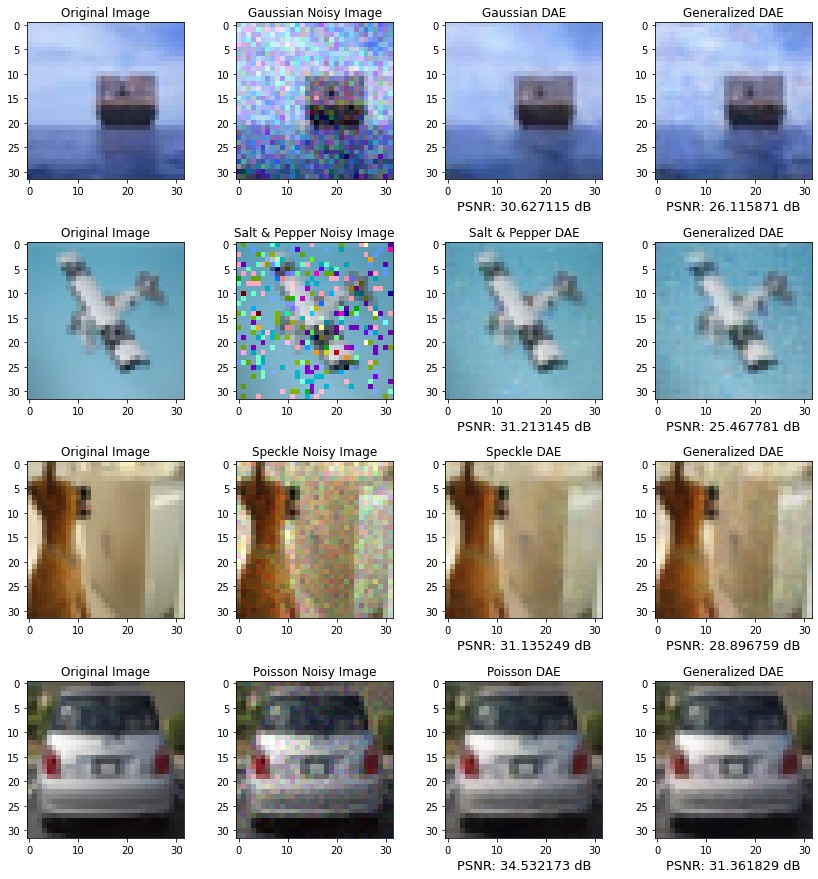

In [231]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0, hspace=0.4)
#idx = 1555 # Best

idx = 6999
plt.subplot(4,4,1)
plt.imshow(test_data_clean_gaussian_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,2)
plt.imshow(test_data_noisy_gaussian_cifar10[idx])
plt.title('Gaussian Noisy Image')
plt.subplot(4,4,3)
plt.imshow(test_data_denoised_gaussian_cifar10[idx])
plt.title('Gaussian DAE')
plt.xlabel('PSNR: 30.627115 dB',fontsize=13)
plt.subplot(4,4,4)
plt.imshow(test_data_denoised_gau[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 26.115871 dB',fontsize=13)

idx = 1555
plt.subplot(4,4,5)
plt.imshow(test_data_clean_salt_pepper_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,6)
plt.imshow(test_data_noisy_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper Noisy Image')
plt.subplot(4,4,7)
plt.imshow(test_data_denoised_salt_pepper_cifar10[idx])
plt.title('Salt & Pepper DAE')
plt.xlabel('PSNR: 31.213145 dB',fontsize=13)
plt.subplot(4,4,8)
plt.imshow(test_data_denoised_sp[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 25.467781 dB',fontsize=13)

idx = 2001
plt.subplot(4,4,9)
plt.imshow(test_data_clean_speckle_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,10)
plt.imshow(test_data_noisy_speckle_cifar10[idx])
plt.title('Speckle Noisy Image')
plt.subplot(4,4,11)
plt.imshow(test_data_denoised_speckle_cifar10[idx])
plt.title('Speckle DAE')
plt.xlabel('PSNR: 31.135249 dB',fontsize=13)
plt.subplot(4,4,12)
plt.imshow(test_data_denoised_spk[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 28.896759 dB',fontsize=13)

idx = 9001
plt.subplot(4,4,13)
plt.imshow(test_data_clean_poisson_cifar10[idx])
plt.title('Original Image')
plt.subplot(4,4,14)
plt.imshow(test_data_noisy_poisson_cifar10[idx])
plt.title('Poisson Noisy Image')
plt.subplot(4,4,15)
plt.imshow(test_data_denoised_poisson_cifar10[idx])
plt.title('Poisson DAE')
plt.xlabel('PSNR: 34.532173 dB',fontsize=13)
plt.subplot(4,4,16)
plt.imshow(test_data_denoised_po[idx])
plt.title('Generalized DAE')
plt.xlabel('PSNR: 31.361829 dB',fontsize=13)
plt.savefig('figures/Specified vs Generlaized DAE Results.png', dpi=400) # always save image before showing it.
plt.show()